#1. Using All Features

##Data Loading

In [1]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
135  136    0   37           0.0      0       0                1   
136  137    0   52           0.0      0       0                0   
137  138    0   48           0.0      1       1                1   
138  139    0   25           1.0      1       0                1   
139  140    1   40           0.0      0       0                1   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
135                   0                           0        1.0       20.0   
136                   1                           0        1.0       12.0   
137                   0                           0        2.0       12.0   
138                   1                           0        1.0       20.0   
139                   0                           0        2.0       20.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              0.0               6.0                                 2.0   
..             ...               ...                                 ...   
135            1.0               8.0                                 2.0   
136            1.0               8.0                                 2.0   
137            1.0               6.0                                 2.0   
138            1.0               8.0                                 2.0   
139            0.0               4.0                                 2.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
135       1       1                     0           NaN         NaN   0  
136       1       1                     0           NaN         NaN   0  
137       1       0                     1           NaN         NaN   0  
138       1       1                     0           NaN         NaN   0  
139       0       0                     0           NaN         NaN   0  

[140 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
Initial EDSS                          float64
Final EDSS                            float64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix
print("Correlation Matrix")
imputed_df.corr()

Correlation Matrix


Sex       Age  OCB + in CSF  \
Sex                                 1.000000 -0.074293      0.176182   
Age                                -0.074293  1.000000      0.066331   
OCB + in CSF                        0.176182  0.066331      1.000000   
VEP +                               0.156484  0.010119      0.141808   
BAEP +                              0.153455  0.208582      0.164978   
Periventricular                     0.198072  0.032043      0.275639   
MRI spinal lesions                 -0.003224  0.125208      0.144302   
MRI infratentorial lesions          0.167687 -0.042536      0.138258   
Varicella                           0.138524  0.178870      0.008728   
Schooling                           0.013178 -0.157770      0.088440   
Breastfeeding                      -0.209647  0.130657      0.033890   
Initial Symptoms                    0.148319  0.111633      0.240582   
Monosymptomatic or Polysymptomatic -0.009859  0.007770      0.161780   
LLSSEP                              0.156063  0.054780      0.012293   
ULSSEP                              0.156472  0.088285      0.065600   
MRI cortical lesions                0.128735  0.082606      0.183323   
Initial EDSS                        0.177914  0.137810      0.148568   
Final EDSS                          0.126508  0.242564      0.164736   
MS                                  0.244609  0.065317      0.386725   

                                       VEP +    BAEP +  Periventricular  \
Sex                                 0.156484  0.153455         0.198072   
Age                                 0.010119  0.208582         0.032043   
OCB + in CSF                        0.141808  0.164978         0.275639   
VEP +                               1.000000  0.110155         0.186072   
BAEP +                              0.110155  1.000000         0.027622   
Periventricular                     0.186072  0.027622         1.000000   
MRI spinal lesions                  0.161574  0.073435        -0.020814   
MRI infratentorial lesions          0.162317  0.055369         0.334149   
Varicella                           0.121246 -0.009428         0.106229   
Schooling                           0.007354  0.062735         0.022606   
Breastfeeding                      -0.117769 -0.031886        -0.076447   
Initial Symptoms                    0.191214  0.146689         0.329796   
Monosymptomatic or Polysymptomatic  0.254501  0.062943         0.205775   
LLSSEP                              0.389002  0.099386         0.186942   
ULSSEP                              0.342720  0.132116         0.215023   
MRI cortical lesions                0.201650  0.214592         0.216116   
Initial EDSS                        0.171842 -0.052999         0.349513   
Final EDSS                          0.208378  0.112237         0.388237   
MS                                  0.218986  0.053275         0.539532   

                                    MRI spinal lesions  \
Sex                                          -0.003224   
Age                                           0.125208   
OCB + in CSF                                  0.144302   
VEP +                                         0.161574   
BAEP +                                        0.073435   
Periventricular                              -0.020814   
MRI spinal lesions                            1.000000   
MRI infratentorial lesions                    0.064307   
Varicella                                     0.010228   
Schooling                                     0.052562   
Breastfeeding                                 0.044002   
Initial Symptoms                              0.242962   
Monosymptomatic or Polysymptomatic            0.163458   
LLSSEP                                        0.340903   
ULSSEP                                        0.262916   
MRI cortical lesions                          0.011027   
Initial EDSS                                  0.169138   
Final EDSS                                    0.204518 

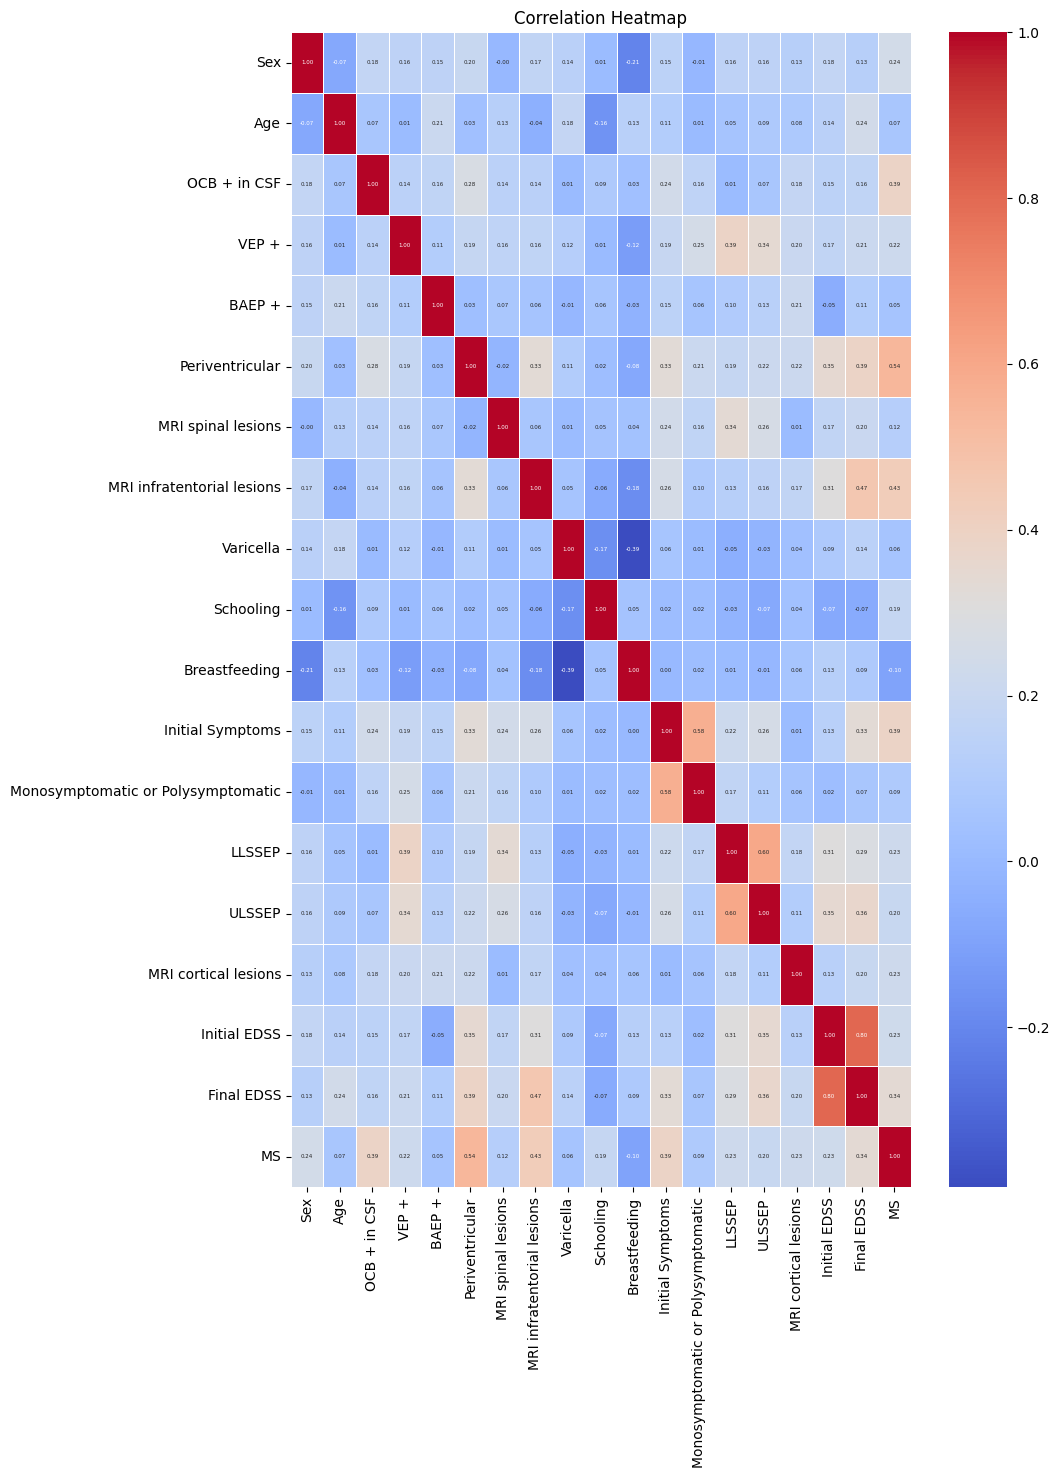

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = imputed_df.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 4})
plt.title("Correlation Heatmap")
plt.show()

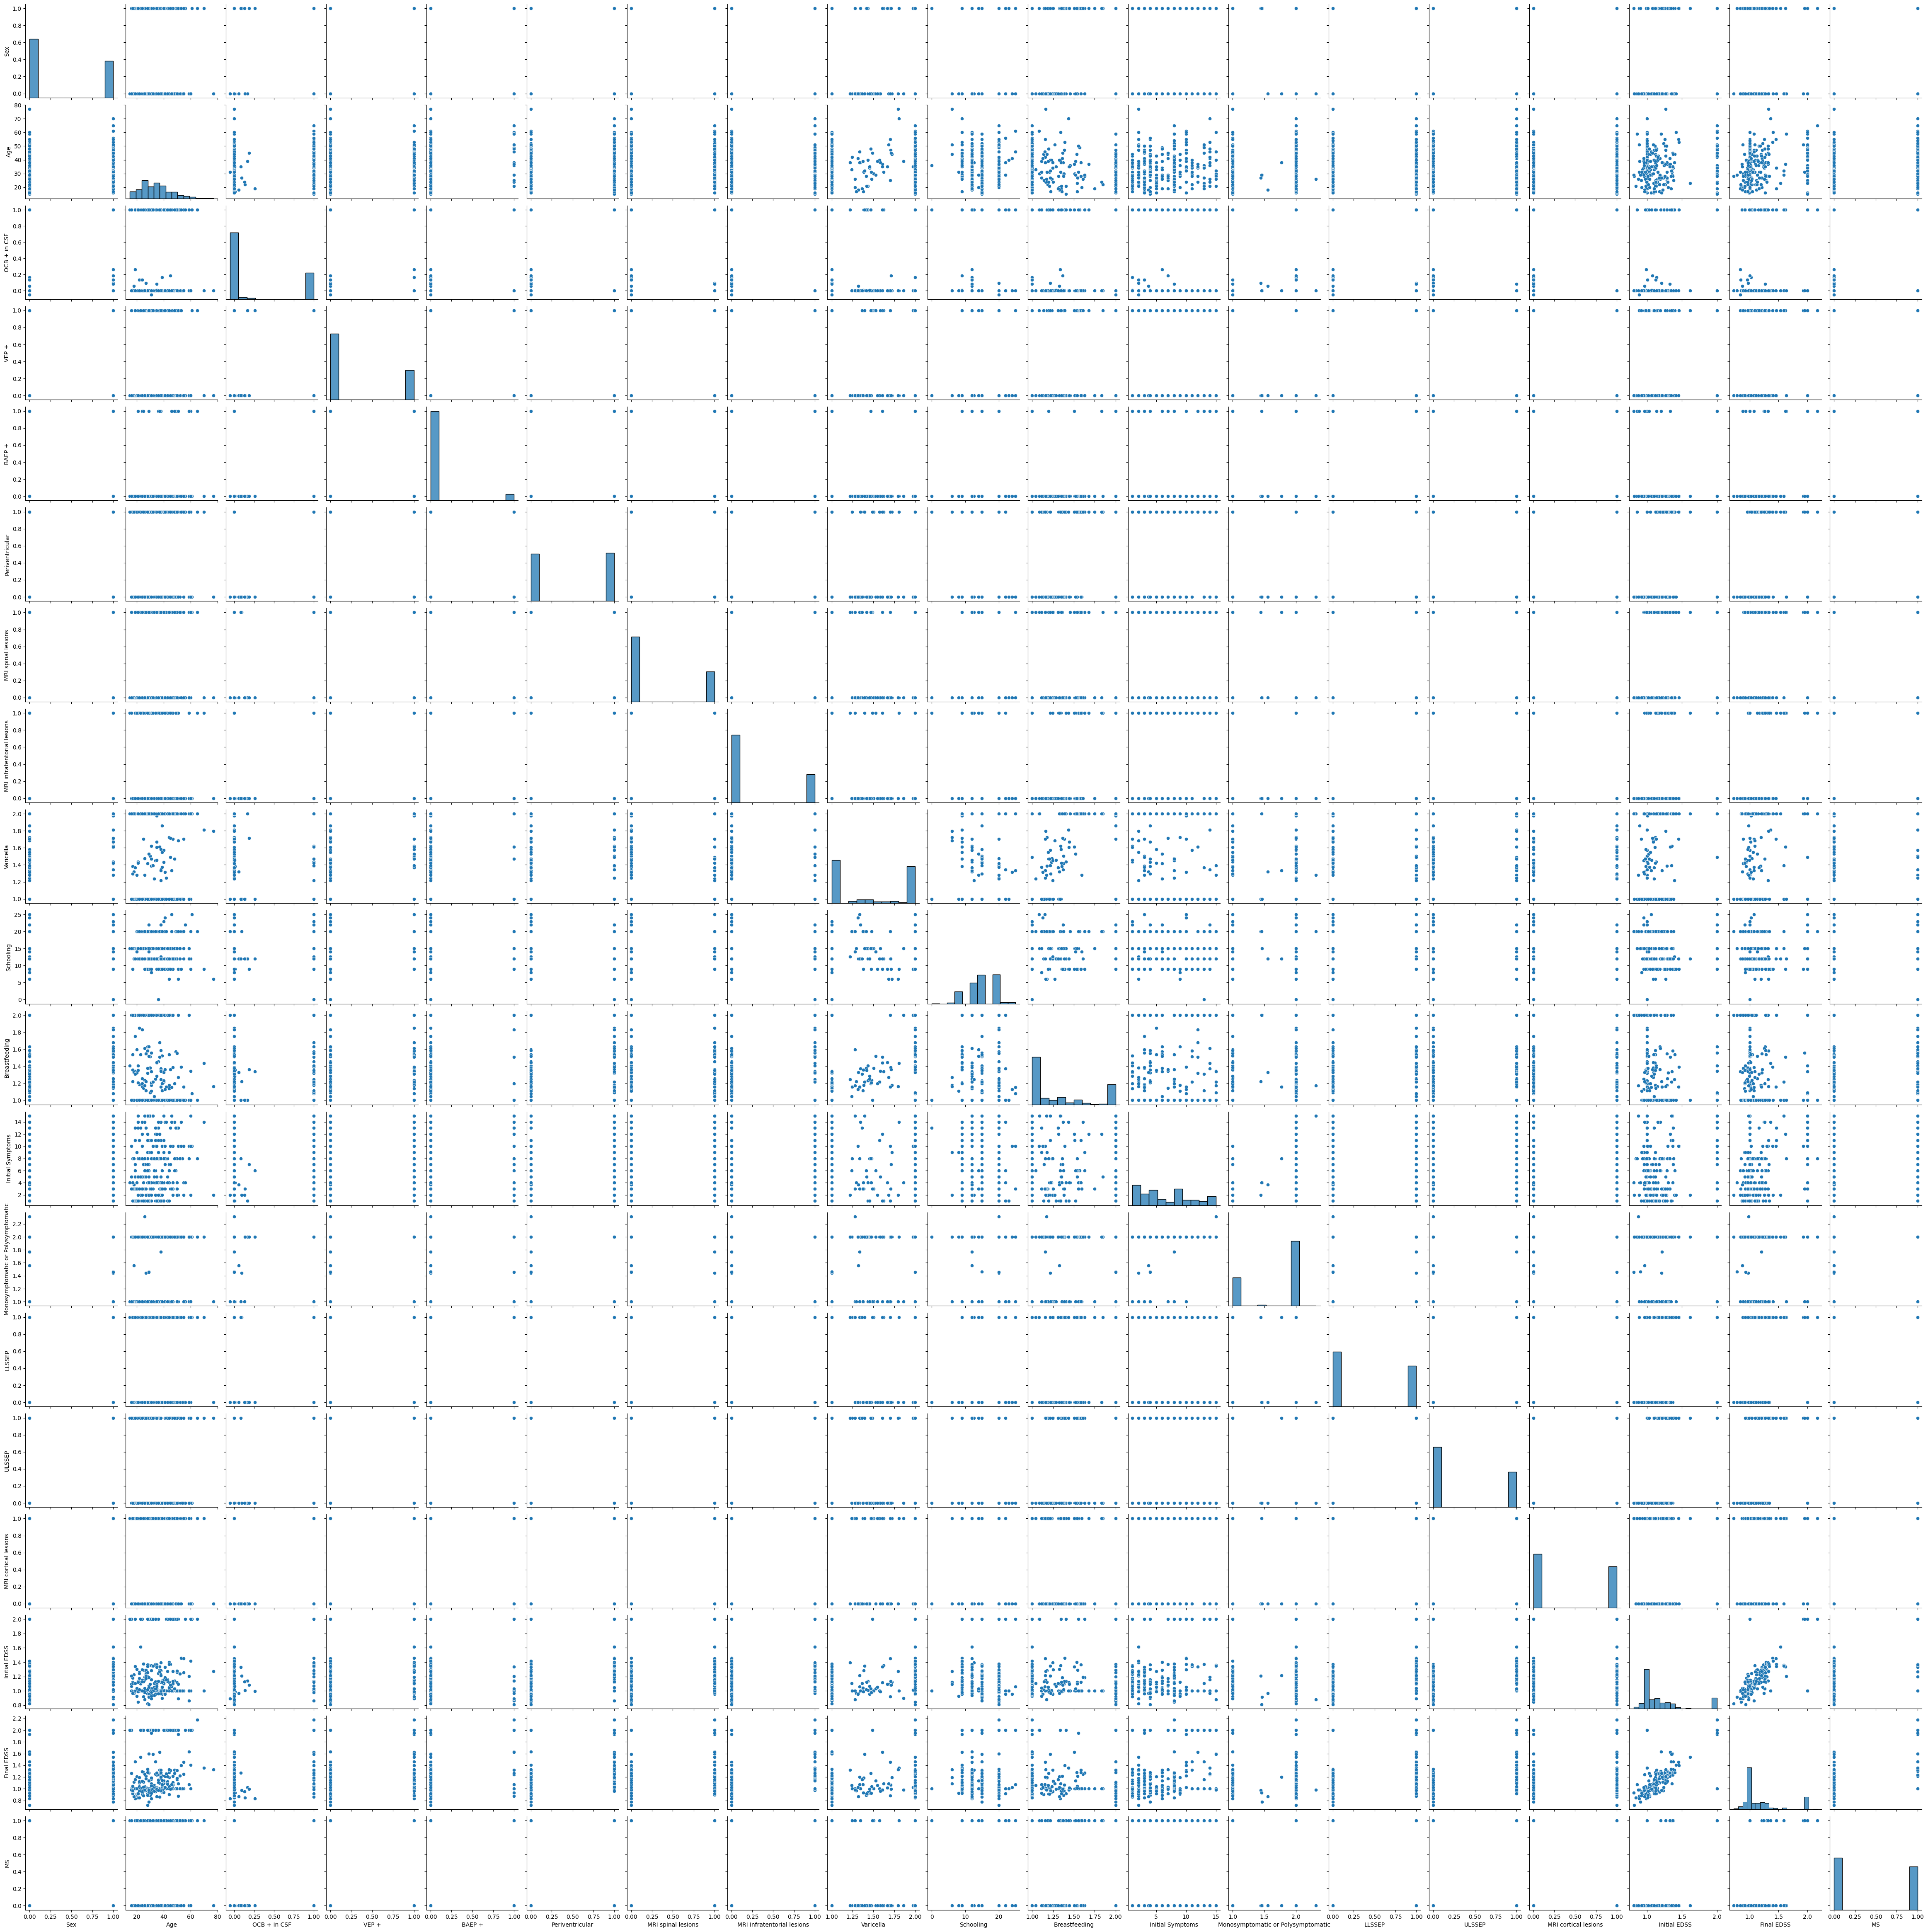

In [ ]:
#Visualise pairwise correlation as Seaborn plots
import seaborn as sns
sns.pairplot(imputed_df)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

Features with multicollinearity (absolute correlation coefficient > 0.7):
Initial EDSS - Final EDSS


Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df.drop('MS', axis=1)
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 18)
(272,)


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


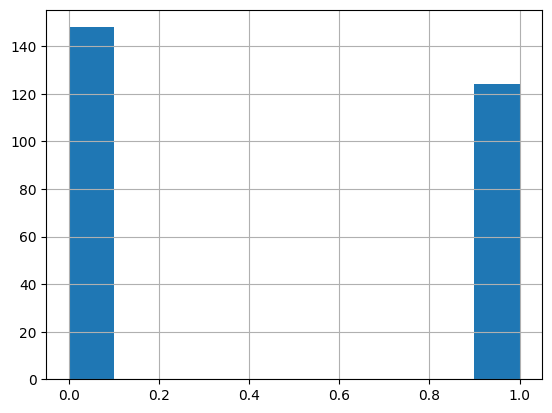

The baseline accuracy is: 0.5441176470588235


In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 18)
x_test: (55, 18)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in rf_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Random Forest model
    rf = RandomForestClassifier(random_state=1)

    # Create an instance of GridSearchCV for Random Forest Classifier
    rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)

    # Fit GridSearchCV on the training fold
    rf_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_rf_model = rf_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", rf_cv.best_params_)
    print("F1 Score:", rf_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_rf_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_rf_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.9594957983193277
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.9655462184873951
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.9709243697478993
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.9598319327731092
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.9657142857142856


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.983677547500353
Standard Deviation of Train F1 Score: 0.010086817004039834
Average Validation F1 Score: 0.9488556096900128
Standard Deviation of Validation F1 Score: 0.01804405278552428


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = rf_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       118
         1.0       0.96      0.97      0.96        99

    accuracy                           0.97       217
   macro avg       0.97      0.97      0.97       217
weighted avg       0.97      0.97      0.97       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

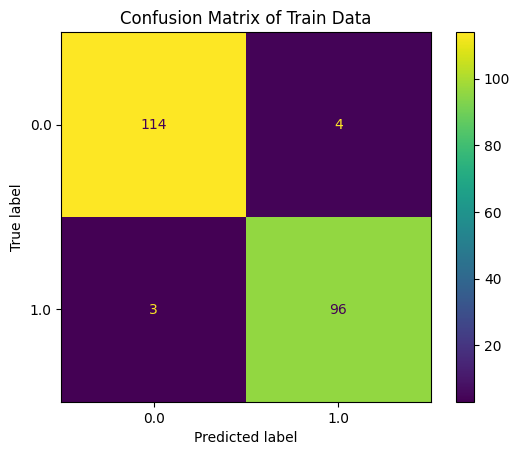

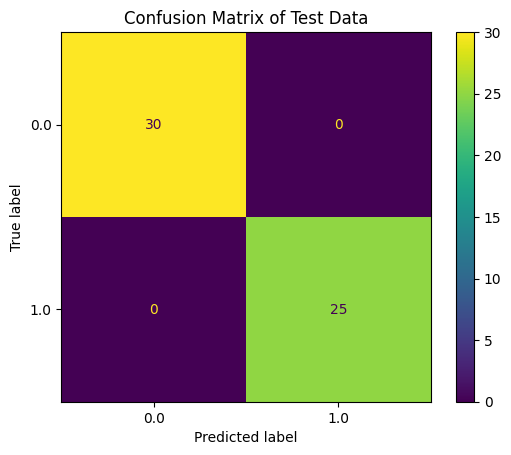

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

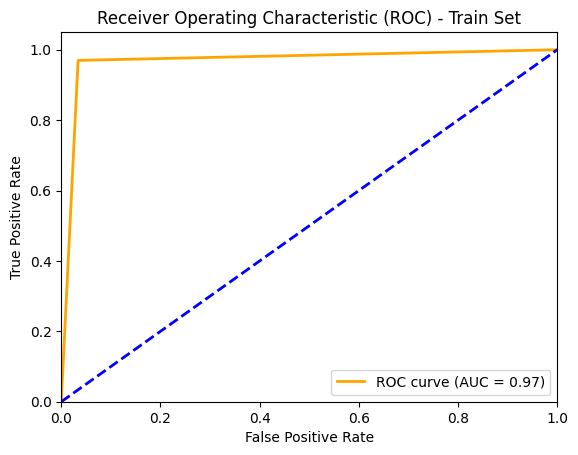

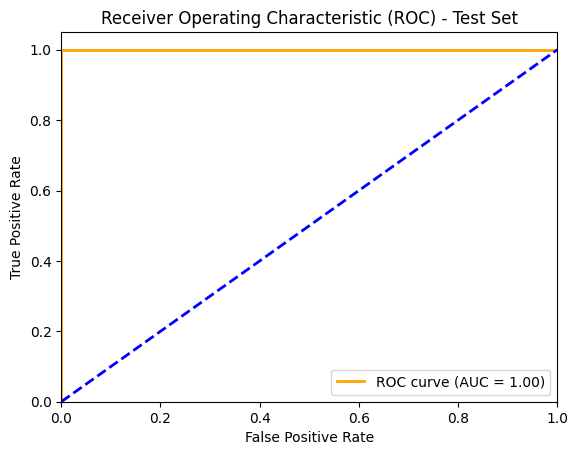

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Sex: 0.01806
Age: 0.02511
OCB + in CSF: 0.05949
VEP +: 0.01683
BAEP +: 0.00111
Periventricular: 0.13786
MRI spinal lesions: 0.00846
MRI infratentorial lesions: 0.05816
Varicella: 0.01458
Schooling: 0.02791
Breastfeeding: 0.02027
Initial Symptoms: 0.06240
Monosymptomatic or Polysymptomatic: 0.00496
LLSSEP: 0.03046
ULSSEP: 0.00799
MRI cortical lesions: 0.00935
Initial EDSS: 0.27733
Final EDSS: 0.21967


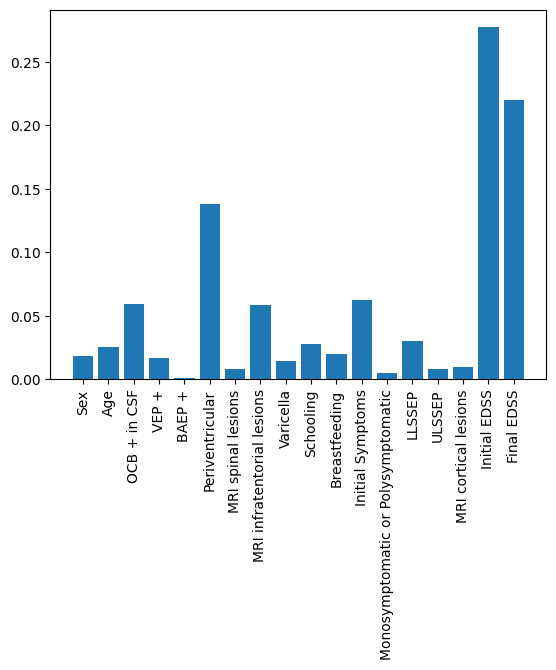

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()



#2. Using All Except Multicollinear Features

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
135  136    0   37           0.0      0       0                1   
136  137    0   52           0.0      0       0                0   
137  138    0   48           0.0      1       1                1   
138  139    0   25           1.0      1       0                1   
139  140    1   40           0.0      0       0                1   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
135                   0                           0        1.0       20.0   
136                   1                           0        1.0       12.0   
137                   0                           0        2.0       12.0   
138                   1                           0        1.0       20.0   
139                   0                           0        2.0       20.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              0.0               6.0                                 2.0   
..             ...               ...                                 ...   
135            1.0               8.0                                 2.0   
136            1.0               8.0                                 2.0   
137            1.0               6.0                                 2.0   
138            1.0               8.0                                 2.0   
139            0.0               4.0                                 2.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
135       1       1                     0           NaN         NaN   0  
136       1       1                     0           NaN         NaN   0  
137       1       0                     1           NaN         NaN   0  
138       1       1                     0           NaN         NaN   0  
139       0       0                     0           NaN         NaN   0  

[140 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Drop features with multicollinearity that also have a low correlation with target variable

In [ ]:
columns_to_drop = ["Initial EDSS","Final EDSS"]
df.drop(columns=columns_to_drop, inplace=True)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix
print("Correlation Matrix")
imputed_df.corr()

Correlation Matrix


Sex       Age  OCB + in CSF  \
Sex                                 1.000000 -0.074293      0.176117   
Age                                -0.074293  1.000000      0.066730   
OCB + in CSF                        0.176117  0.066730      1.000000   
VEP +                               0.156484  0.010119      0.141769   
BAEP +                              0.153455  0.208582      0.165112   
Periventricular                     0.198072  0.032043      0.276226   
MRI spinal lesions                 -0.003224  0.125208      0.144556   
MRI infratentorial lesions          0.167687 -0.042536      0.138642   
Varicella                           0.139484  0.180163      0.007728   
Schooling                           0.013184 -0.157772      0.088991   
Breastfeeding                      -0.202673  0.147342      0.025765   
Initial Symptoms                    0.148280  0.111557      0.241027   
Monosymptomatic or Polysymptomatic -0.009746  0.007645      0.161764   
LLSSEP                              0.156063  0.054780      0.012703   
ULSSEP                              0.156472  0.088285      0.066059   
MRI cortical lesions                0.128735  0.082606      0.183846   
MS                                  0.244609  0.065317      0.387229   

                                       VEP +    BAEP +  Periventricular  \
Sex                                 0.156484  0.153455         0.198072   
Age                                 0.010119  0.208582         0.032043   
OCB + in CSF                        0.141769  0.165112         0.276226   
VEP +                               1.000000  0.110155         0.186072   
BAEP +                              0.110155  1.000000         0.027622   
Periventricular                     0.186072  0.027622         1.000000   
MRI spinal lesions                  0.161574  0.073435        -0.020814   
MRI infratentorial lesions          0.162317  0.055369         0.334149   
Varicella                           0.119516 -0.009845         0.106892   
Schooling                           0.007360  0.062737         0.022614   
Breastfeeding                      -0.110753 -0.030561        -0.057710   
Initial Symptoms                    0.191184  0.146679         0.329752   
Monosymptomatic or Polysymptomatic  0.254407  0.063104         0.205623   
LLSSEP                              0.389002  0.099386         0.186942   
ULSSEP                              0.342720  0.132116         0.215023   
MRI cortical lesions                0.201650  0.214592         0.216116   
MS                                  0.218986  0.053275         0.539532   

                                    MRI spinal lesions  \
Sex                                          -0.003224   
Age                                           0.125208   
OCB + in CSF                                  0.144556   
VEP +                                         0.161574   
BAEP +                                        0.073435   
Periventricular                              -0.020814   
MRI spinal lesions                            1.000000   
MRI infratentorial lesions                    0.064307   
Varicella                                     0.008979   
Schooling                                     0.052551   
Breastfeeding                                 0.036710   
Initial Symptoms                              0.242933   
Monosymptomatic or Polysymptomatic            0.163364   
LLSSEP                                        0.340903   
ULSSEP                                        0.262916   
MRI cortical lesions                          0.011027   
MS                                            0.123734   

                                    MRI infratentorial lesions  Varicella  \
Sex                                                   0.167687   0.139484   
Age                                                  -0.042536   0.180163   
OCB + in CSF                                          0.138642   0.007728   
VEP +                                   

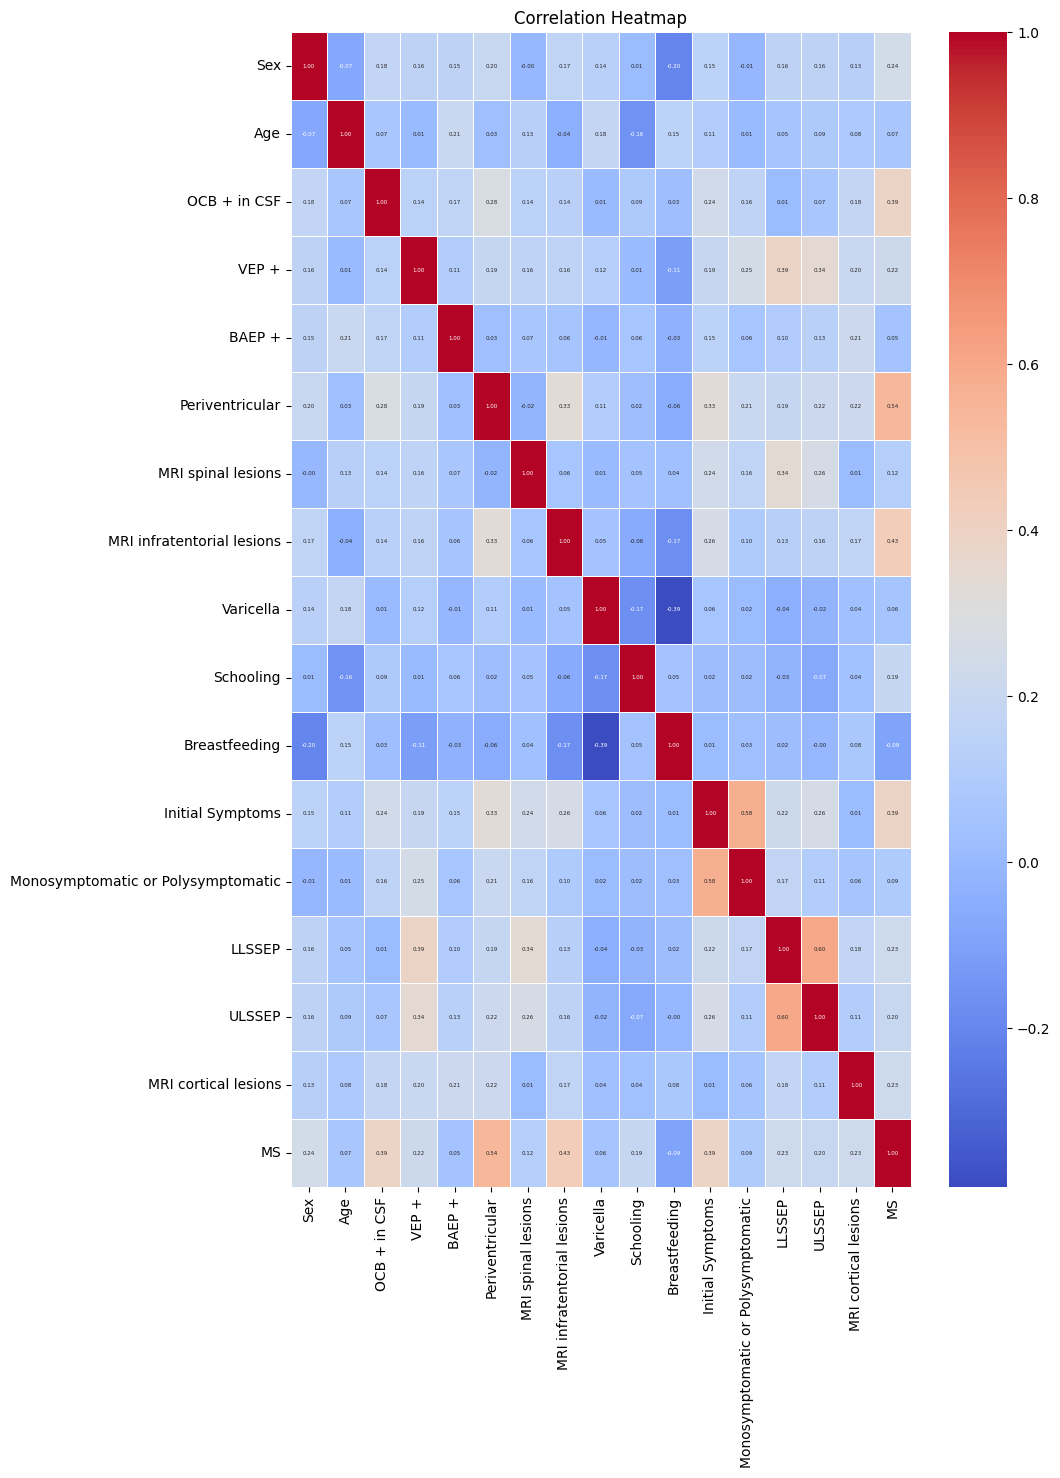

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = imputed_df.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 4})
plt.title("Correlation Heatmap")
plt.show()

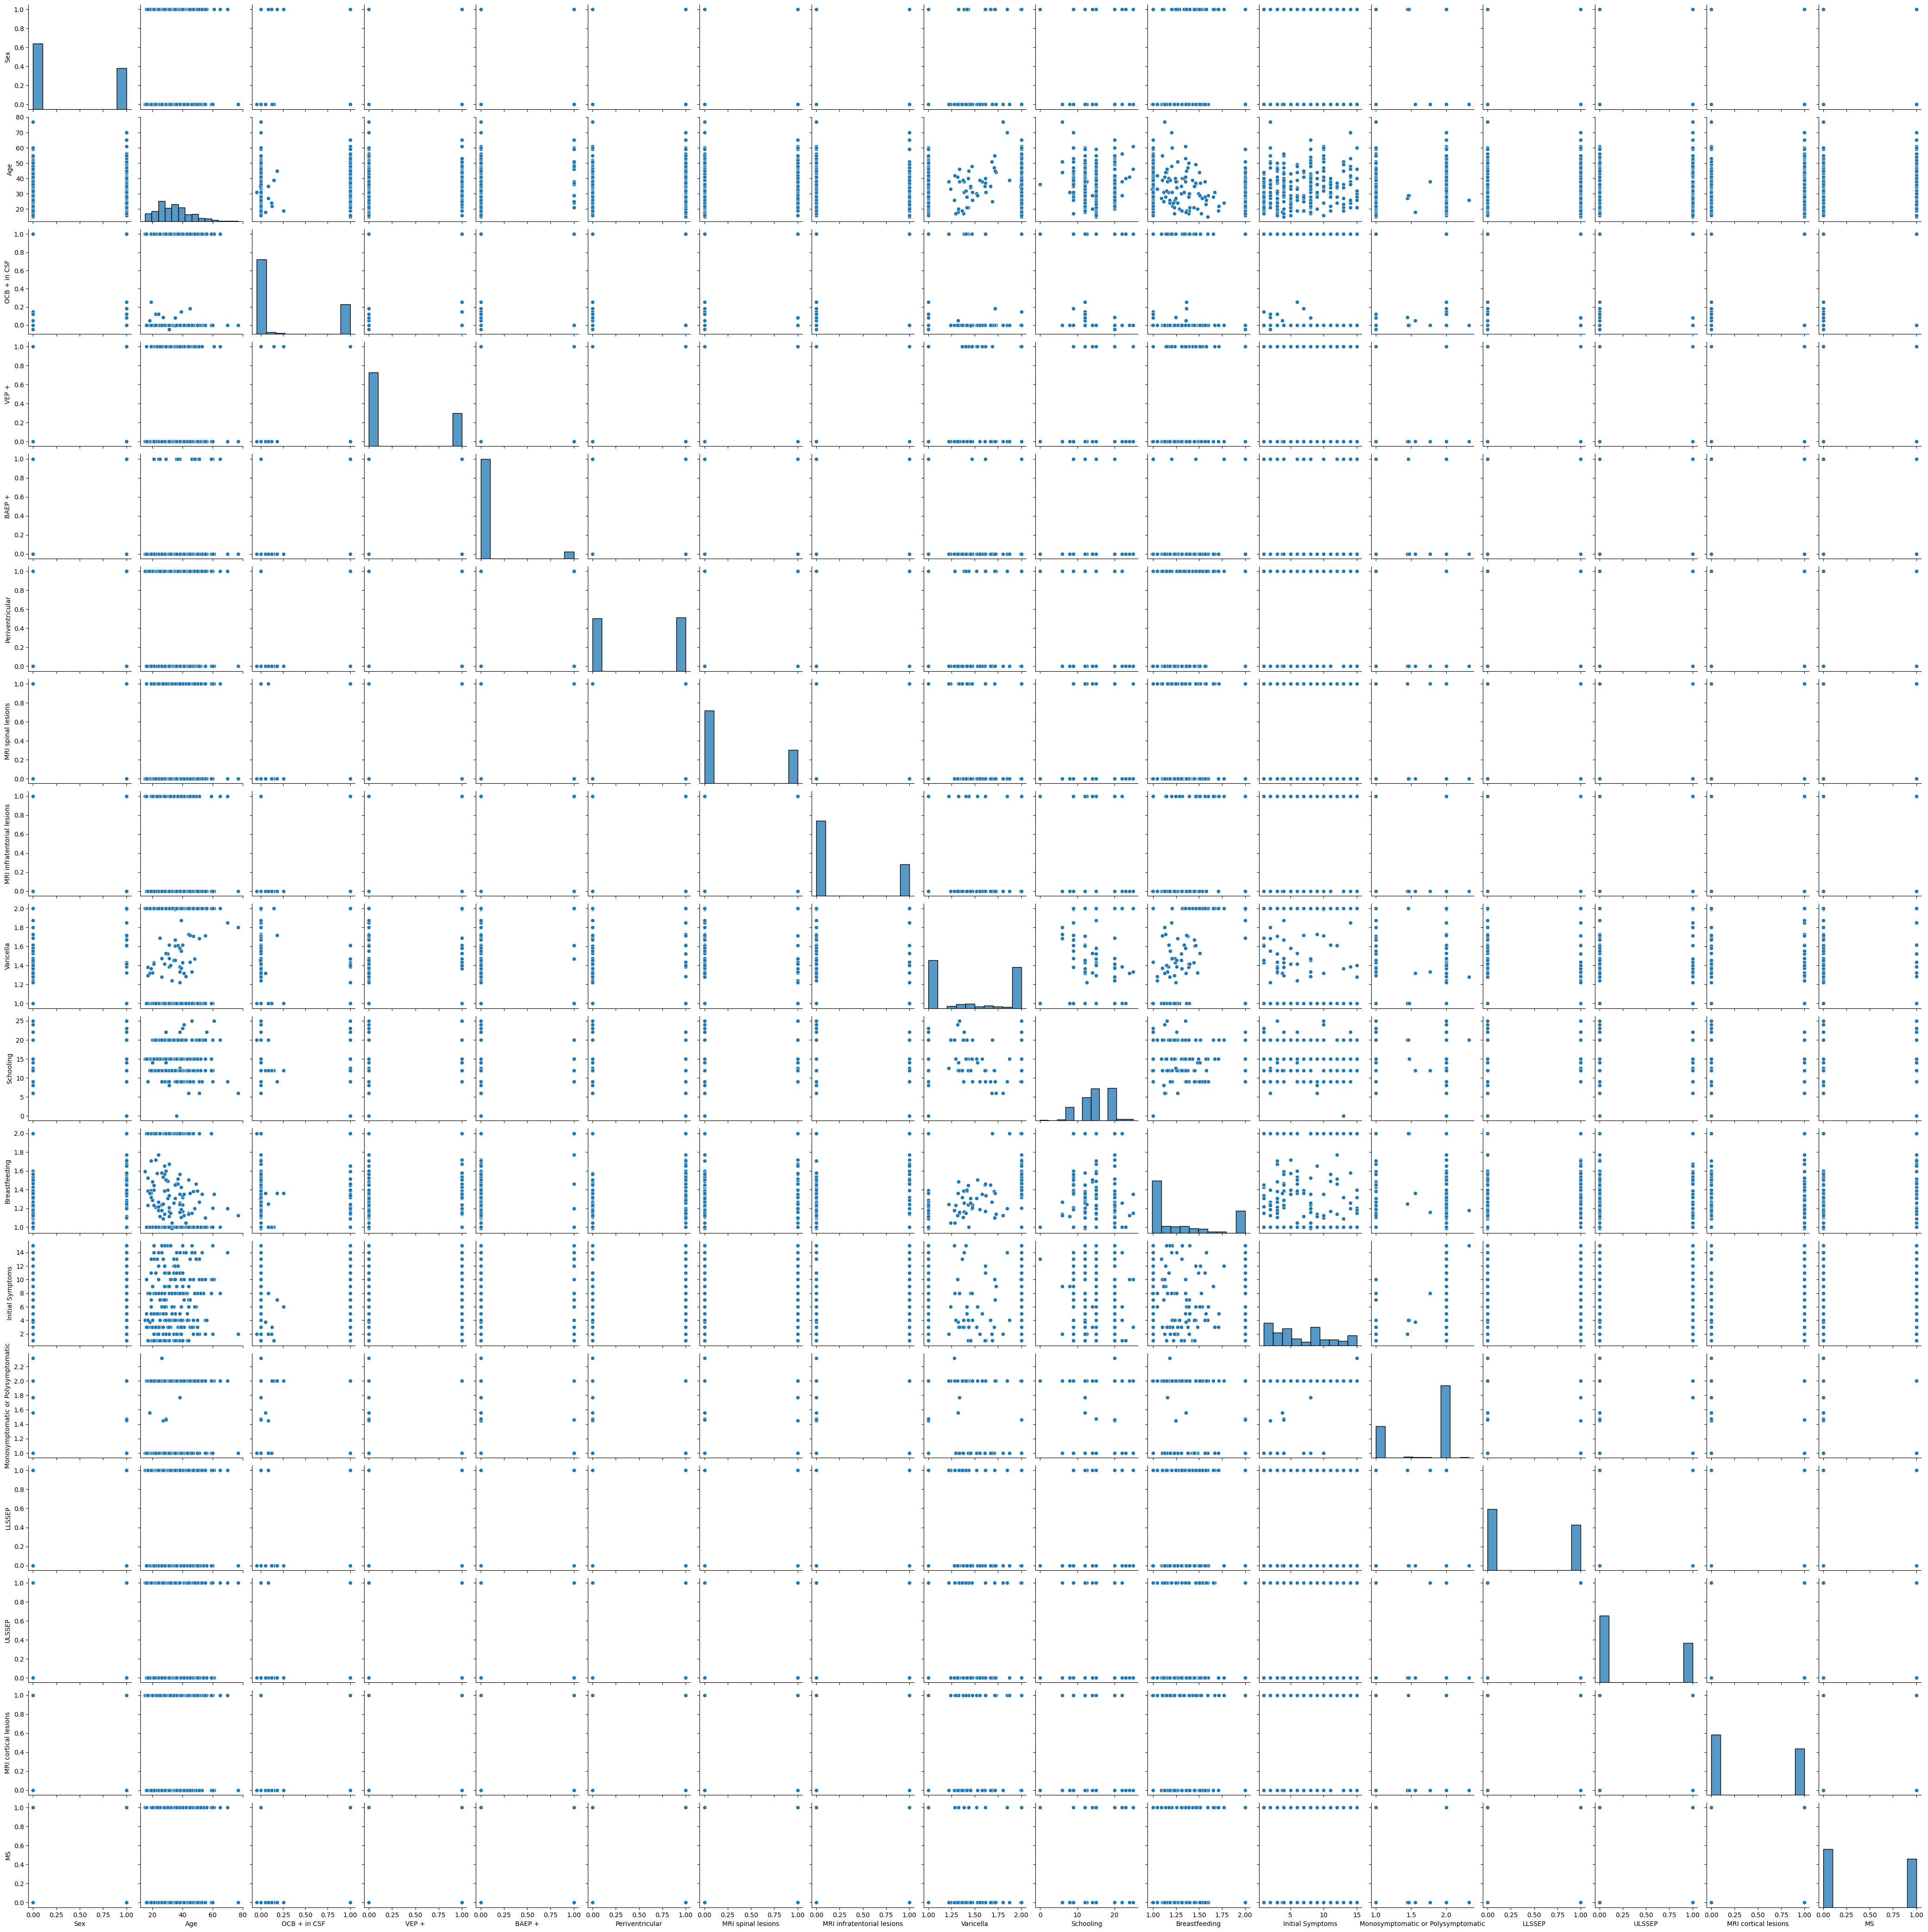

In [ ]:
#Visualise pairwise correlation as Seaborn plots
import seaborn as sns
sns.pairplot(imputed_df)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df.drop('MS', axis=1)
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 16)
(272,)


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


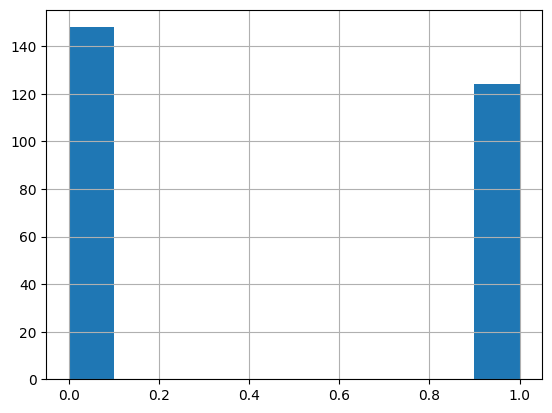

The baseline accuracy is: 0.5441176470588235


In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 16)
x_test: (55, 16)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in rf_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Random Forest model
    rf = RandomForestClassifier(random_state=1)

    # Create an instance of GridSearchCV for Random Forest Classifier
    rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)

    # Fit GridSearchCV on the training fold
    rf_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_rf_model = rf_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", rf_cv.best_params_)
    print("F1 Score:", rf_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_rf_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_rf_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.8500840336134454
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.8038655462184874
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.8218487394957984
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.8564705882352941
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.81025

##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.9403129087835096
Standard Deviation of Train F1 Score: 0.024144933092379497
Average Validation F1 Score: 0.8039354733625863
Standard Deviation of Validation F1 Score: 0.0610474692729223


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = rf_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       118
         1.0       0.90      0.94      0.92        99

    accuracy                           0.93       217
   macro avg       0.93      0.93      0.93       217
weighted avg       0.93      0.93      0.93       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88        30
         1.0       0.85      0.88      0.86        25

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

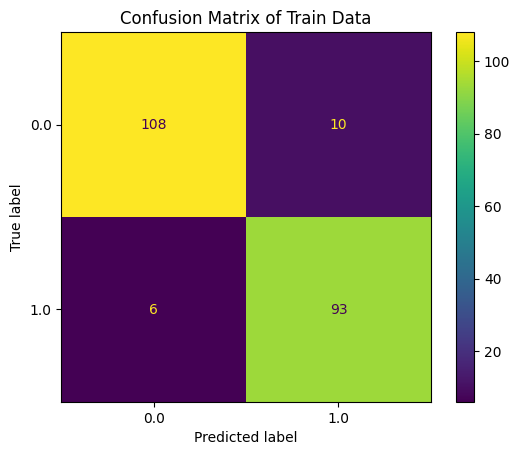

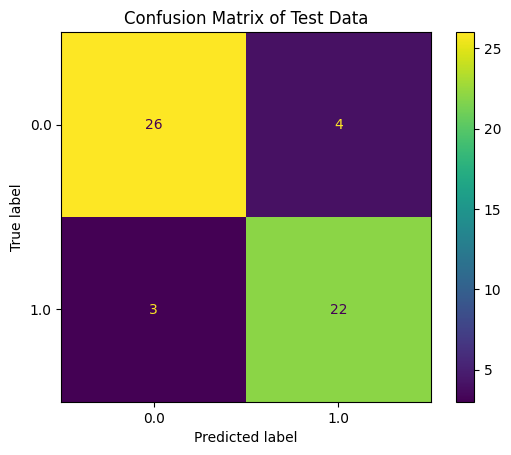

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

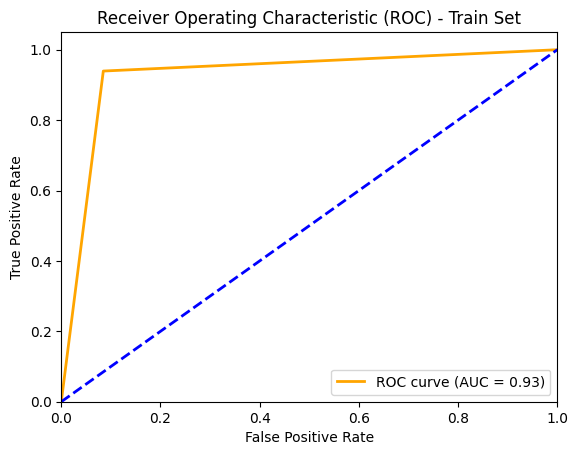

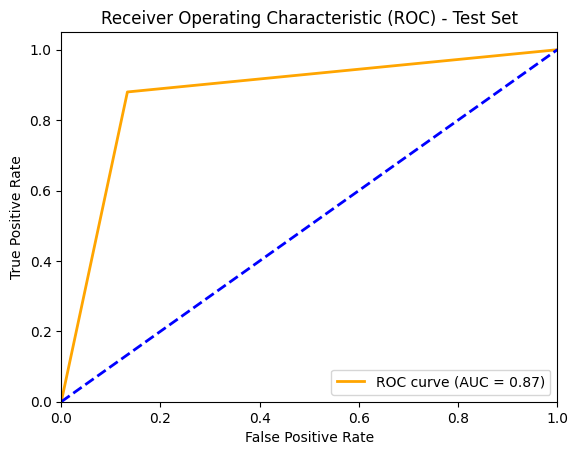

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

Sex: 0.03615
Age: 0.10438
OCB + in CSF: 0.08995
VEP +: 0.03073
BAEP +: 0.00524
Periventricular: 0.14840
MRI spinal lesions: 0.02240
MRI infratentorial lesions: 0.09447
Varicella: 0.04059
Schooling: 0.08684
Breastfeeding: 0.07317
Initial Symptoms: 0.14419
Monosymptomatic or Polysymptomatic: 0.02573
LLSSEP: 0.04411
ULSSEP: 0.02056
MRI cortical lesions: 0.03309


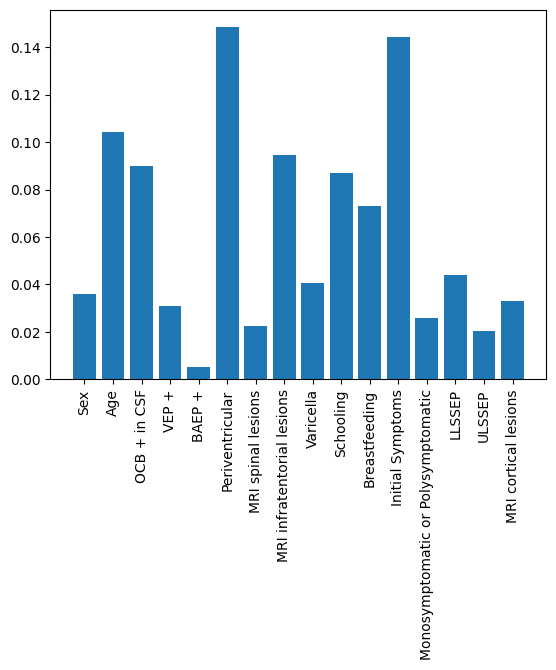

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()



#3. Repeating the above using only important features

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
135  136    0   37           0.0      0       0                1   
136  137    0   52           0.0      0       0                0   
137  138    0   48           0.0      1       1                1   
138  139    0   25           1.0      1       0                1   
139  140    1   40           0.0      0       0                1   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
135                   0                           0        1.0       20.0   
136                   1                           0        1.0       12.0   
137                   0                           0        2.0       12.0   
138                   1                           0        1.0       20.0   
139                   0                           0        2.0       20.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              0.0               6.0                                 2.0   
..             ...               ...                                 ...   
135            1.0               8.0                                 2.0   
136            1.0               8.0                                 2.0   
137            1.0               6.0                                 2.0   
138            1.0               8.0                                 2.0   
139            0.0               4.0                                 2.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
135       1       1                     0           NaN         NaN   0  
136       1       1                     0           NaN         NaN   0  
137       1       0                     1           NaN         NaN   0  
138       1       1                     0           NaN         NaN   0  
139       0       0                     0           NaN         NaN   0  

[140 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(138, 44)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
Initial EDSS                          float64
Final EDSS                            float64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[['Initial EDSS', 'Final EDSS', 'Initial Symptoms', 'MRI infratentorial lesions', 'Periventricular', 'OCB + in CSF']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 6)
(272,)


Visualising Relationship between Target Variable and Each Feature in X

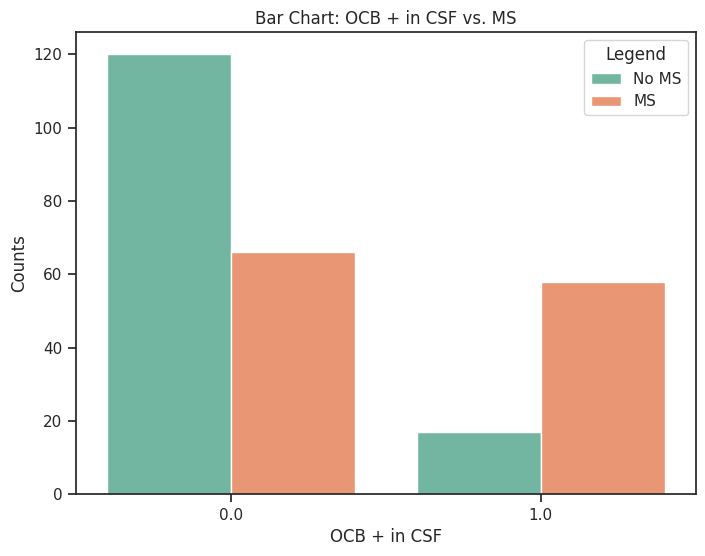

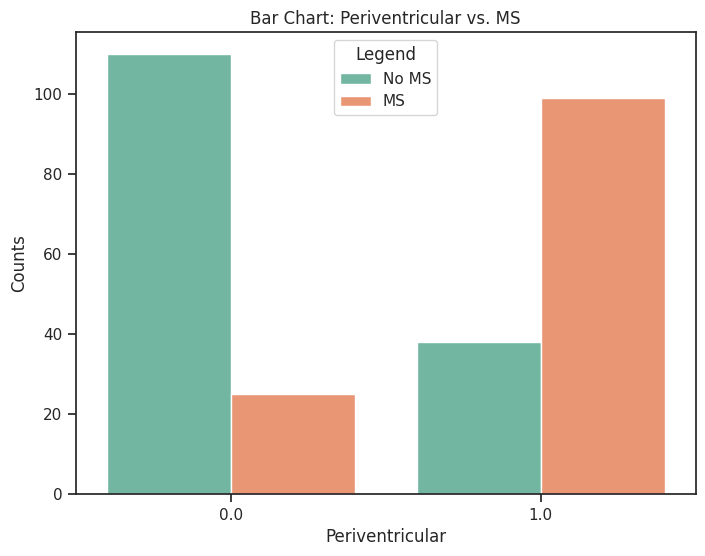

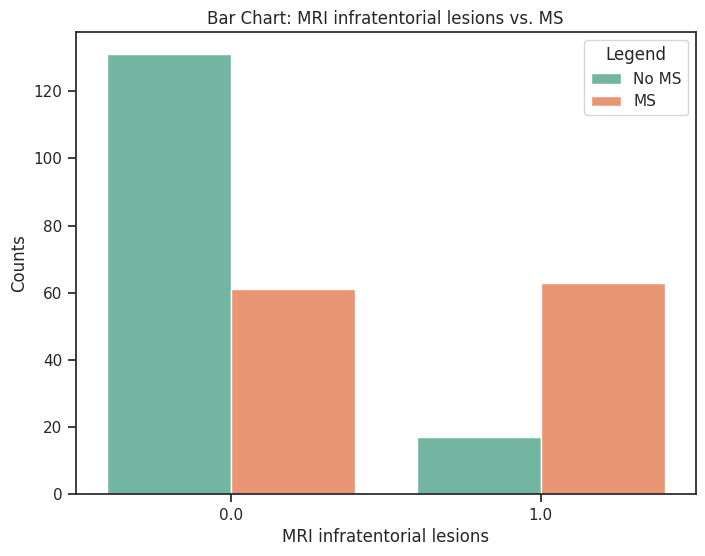

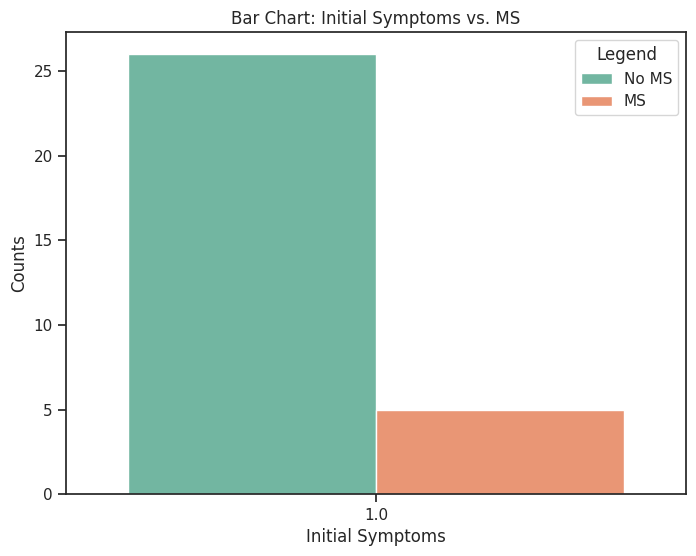

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette("Set2")

# Define features to plot
features = ['OCB + in CSF', 'Periventricular',
            'MRI infratentorial lesions', 'Initial Symptoms']

# Define a function to filter values to 0.0 or 1.0
def filter_values(value):
    if value == 0.0 or value == 1.0:
        return value
    else:
        return None

# Filter the data for the specified features
filtered_df = imputed_df.copy()
filtered_df[features] = filtered_df[features].applymap(filter_values)


# Plot Bar chart for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=feature, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(feature)



    plt.title(f"Bar Chart: {feature} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()


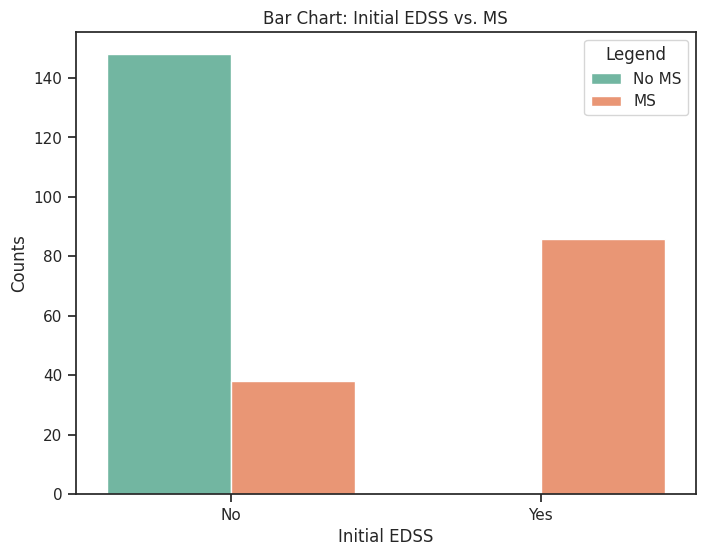

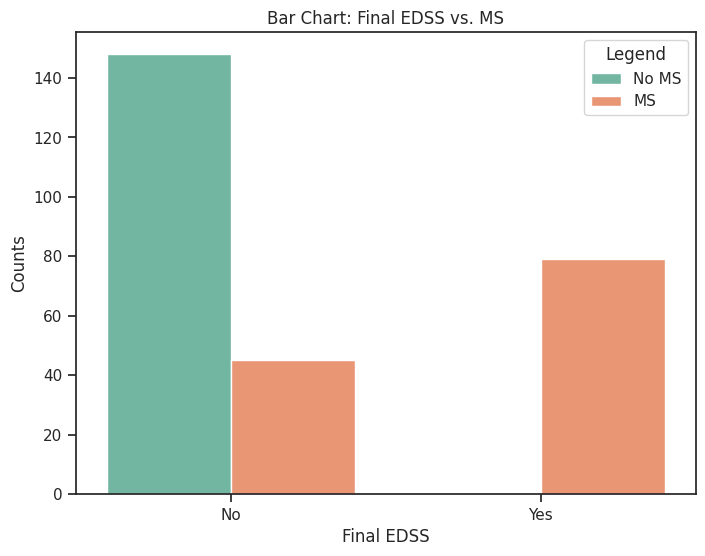

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette("Set2")

# Define features to plot
features = ['Initial EDSS', 'Final EDSS']

# Define a function to filter values to 0.0 or 1.0 and map them to "No" and "Yes"
def filter_values(value):
    if value == 0.0:
        return "No"
    elif value == 1.0:
        return "Yes"
    else:
        return "No"  # Map other values to "No"

# Filter the data for the specified features and map values to "No" and "Yes"
filtered_df = imputed_df.copy()
filtered_df[features] = filtered_df[features].applymap(filter_values)

# Plot Bar chart for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=feature, hue='MS', data=filtered_df, order=["No", "Yes"])
    ax.set_ylabel("Counts")
    ax.set_xlabel(feature)
    plt.title(f"Bar Chart: {feature} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()


Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


Correlation Matrix


Initial EDSS  Final EDSS  Initial Symptoms  \
Initial EDSS                    1.000000    0.804393          0.131364   
Final EDSS                      0.804393    1.000000          0.331186   
Initial Symptoms                0.131364    0.331186          1.000000   
MRI infratentorial lesions      0.308824    0.465695          0.258332   
Periventricular                 0.349513    0.388237          0.329796   
OCB + in CSF                    0.148568    0.164736          0.240582   
MS                              0.231396    0.337315          0.387636   

                            MRI infratentorial lesions  Periventricular  \
Initial EDSS                                  0.308824         0.349513   
Final EDSS                                    0.465695         0.388237   
Initial Symptoms                              0.258332         0.329796   
MRI infratentorial lesions                    1.000000         0.334149   
Periventricular                               0.334149         1.000000   
OCB + in CSF                                  0.138258         0.275639   
MS                                            0.429793         0.539532   

                            OCB + in CSF        MS  
Initial EDSS                    0.148568  0.231396  
Final EDSS                      0.164736  0.337315  
Initial Symptoms                0.240582  0.387636  
MRI infratentorial lesions      0.138258  0.429793  
Periventricular                 0.275639  0.539532  
OCB + in CSF                    1.000000  0.386725  
MS                              0.386725  1.000000

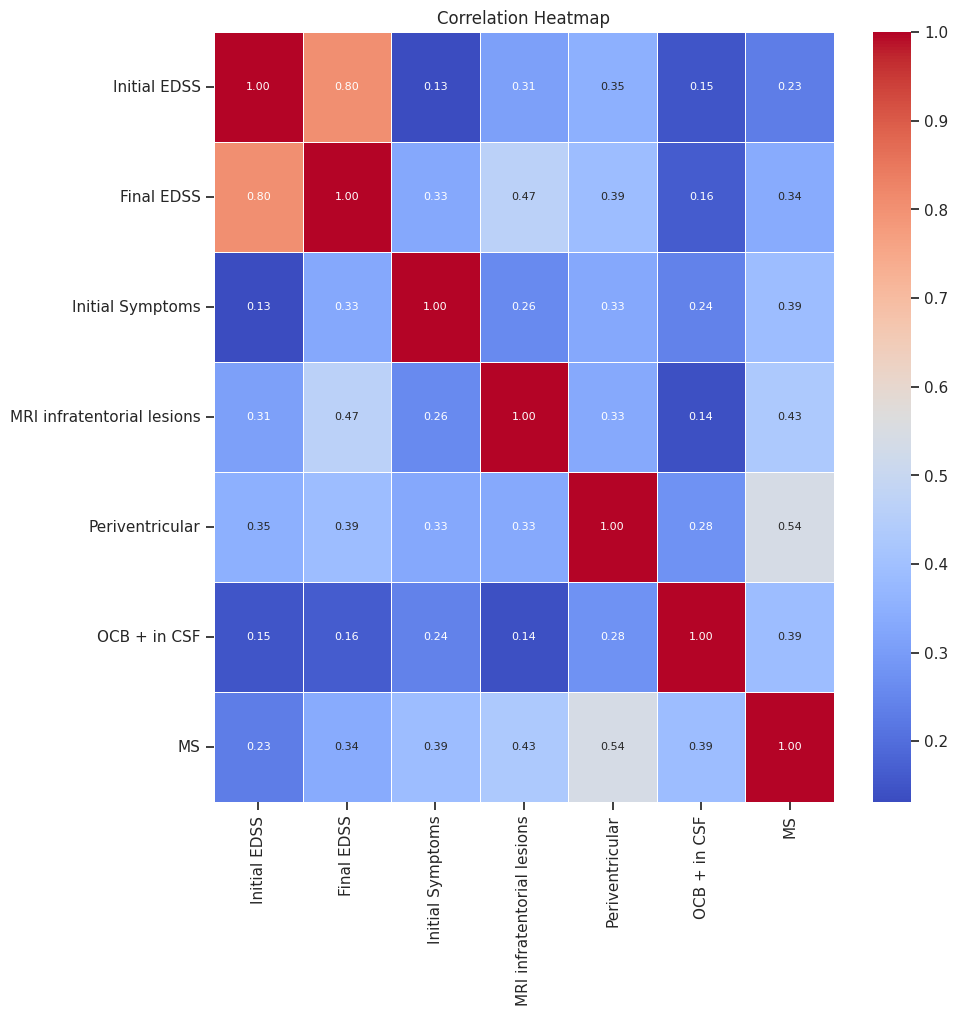

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

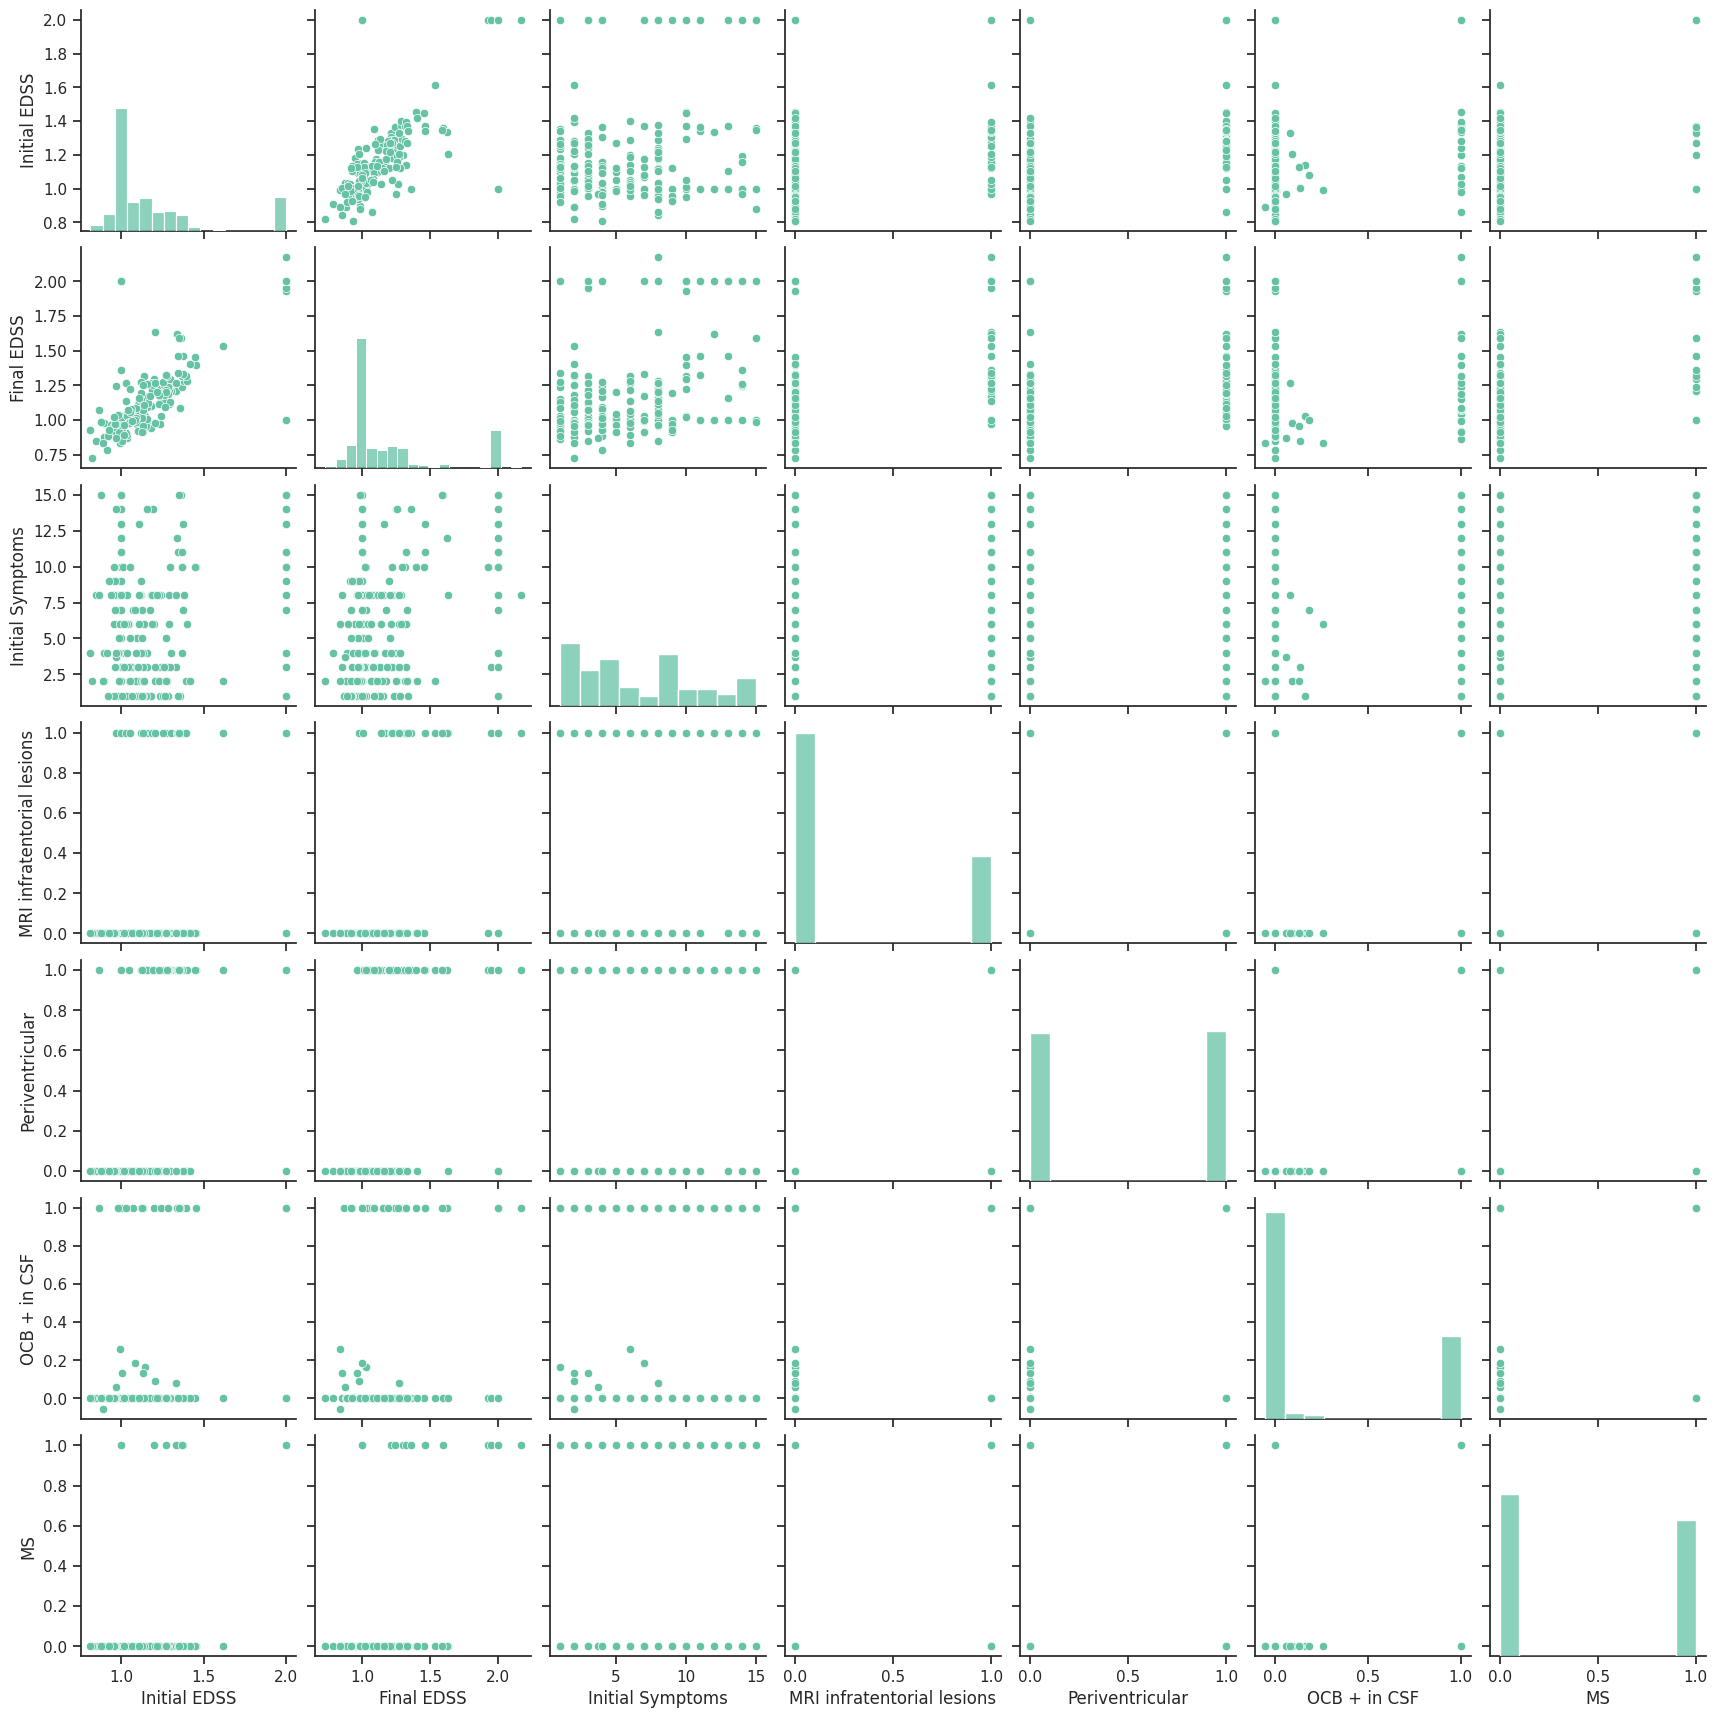

In [ ]:
#Visualise pairwise correlation as Seaborn plots
#Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Visualise plots
sns.pairplot(data)

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

Features with multicollinearity (absolute correlation coefficient > 0.7):
Initial EDSS - Final EDSS


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


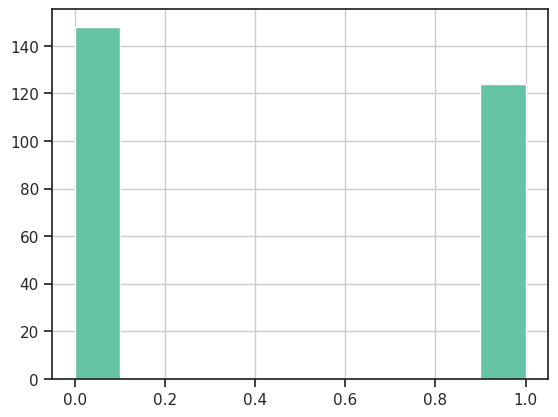

The baseline accuracy is: 0.5441176470588235


In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 6)
x_test: (55, 6)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in rf_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Random Forest model
    rf = RandomForestClassifier(random_state=1)

    # Create an instance of GridSearchCV for Random Forest Classifier
    rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)

    # Fit GridSearchCV on the training fold
    rf_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_rf_model = rf_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", rf_cv.best_params_)
    print("F1 Score:", rf_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_rf_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_rf_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 42}
F1 Score: 0.9652100840336134
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.9655462184873951
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.9594957983193277
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.9657142857142856
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.9714285714285715


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.9781297259004266
Standard Deviation of Train F1 Score: 0.01270014863782154
Average Validation F1 Score: 0.9478114700065919
Standard Deviation of Validation F1 Score: 0.02537651709526097


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = rf_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.99      0.95      0.97        99

    accuracy                           0.97       217
   macro avg       0.97      0.97      0.97       217
weighted avg       0.97      0.97      0.97       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      0.96      0.98        25

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

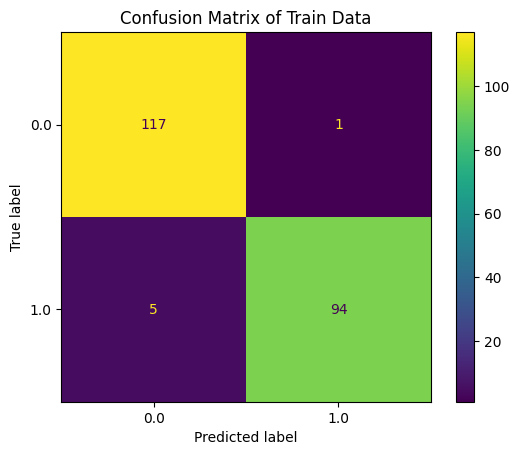

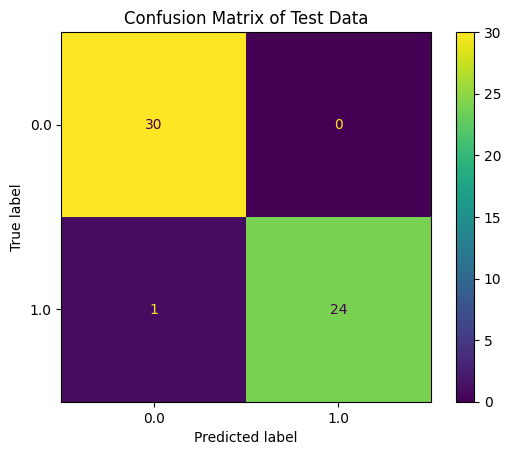

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

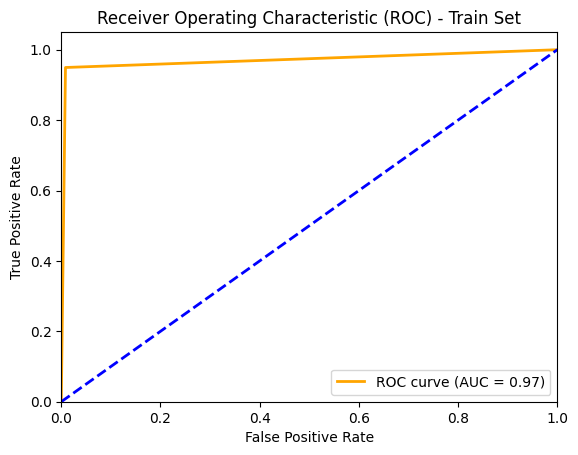

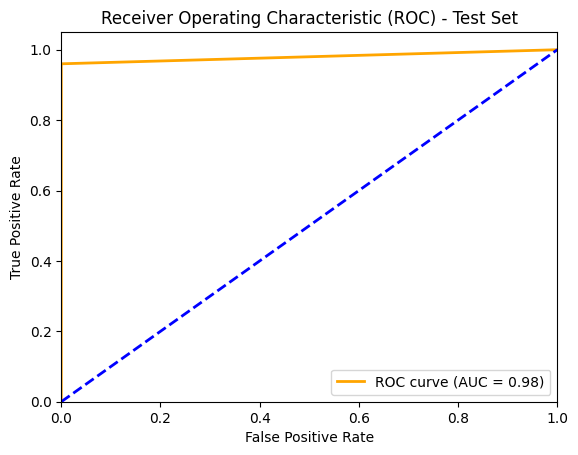

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculating Feature Importances

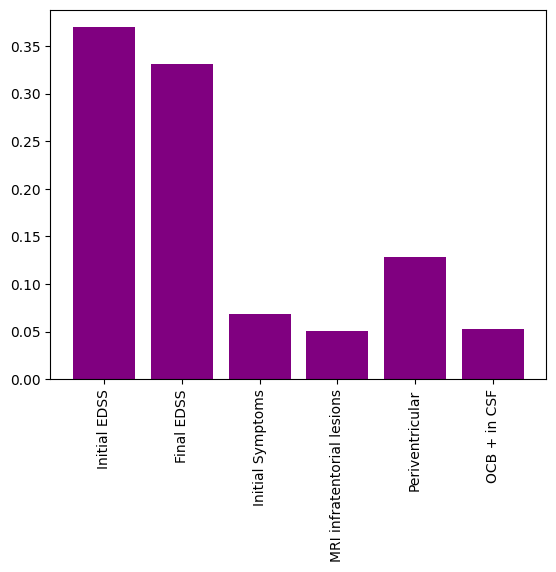

In [ ]:
import matplotlib.pyplot as plt

importance = best_model.feature_importances_

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance, color=['purple'])
plt.xticks(rotation=90)
plt.show()


#4. Repeating the above with Predictors Identified in the Original Study

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
135  136    0   37           0.0      0       0                1   
136  137    0   52           0.0      0       0                0   
137  138    0   48           0.0      1       1                1   
138  139    0   25           1.0      1       0                1   
139  140    1   40           0.0      0       0                1   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
135                   0                           0        1.0       20.0   
136                   1                           0        1.0       12.0   
137                   0                           0        2.0       12.0   
138                   1                           0        1.0       20.0   
139                   0                           0        2.0       20.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              0.0               6.0                                 2.0   
..             ...               ...                                 ...   
135            1.0               8.0                                 2.0   
136            1.0               8.0                                 2.0   
137            1.0               6.0                                 2.0   
138            1.0               8.0                                 2.0   
139            0.0               4.0                                 2.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
135       1       1                     0           NaN         NaN   0  
136       1       1                     0           NaN         NaN   0  
137       1       0                     1           NaN         NaN   0  
138       1       1                     0           NaN         NaN   0  
139       0       0                     0           NaN         NaN   0  

[140 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
Initial EDSS                          float64
Final EDSS                            float64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[[ 'MRI spinal lesions', 'OCB + in CSF', 'BAEP +']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 3)
(272,)


Visualising Relationship between Target Variable and Each Feature in X

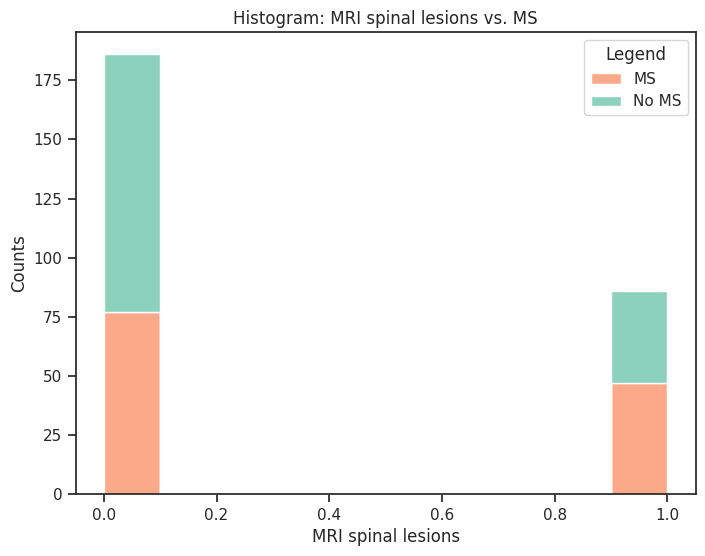

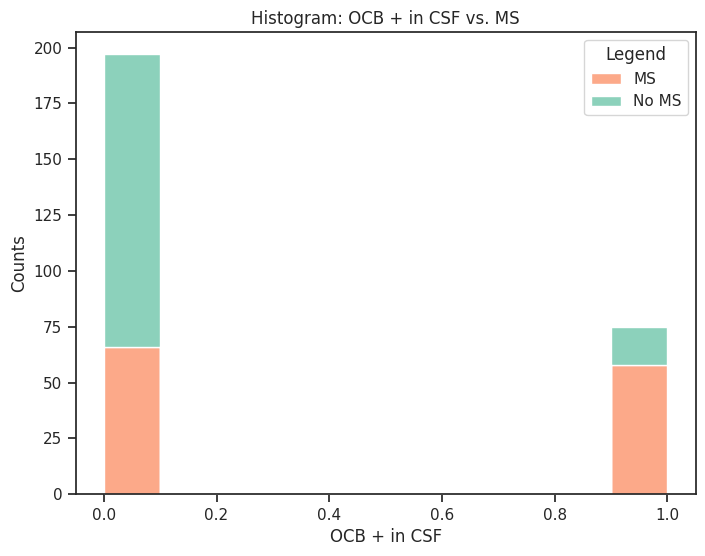

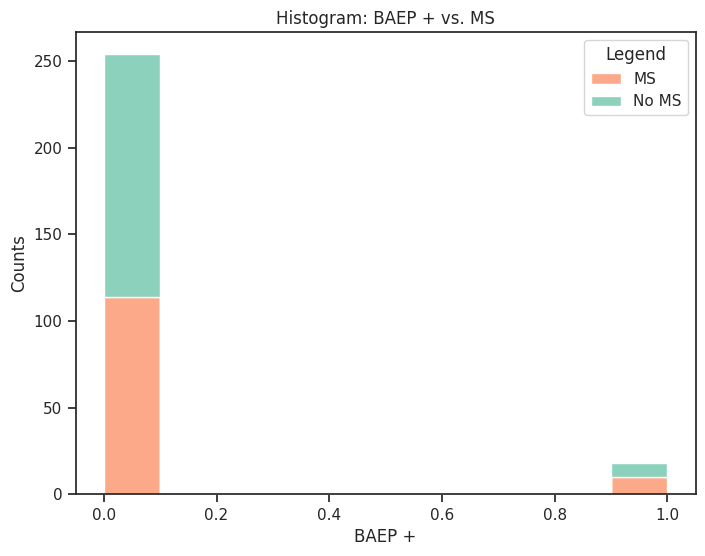

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette("Set2")

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return 0.0  # Convert any unexpected value to 0.0

# Filter the data and convert the variables to binary values
filtered_df = imputed_df.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Plot Histogram for each variable
variables = ['MRI spinal lesions', 'OCB + in CSF', 'BAEP +']

for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=filtered_df, x=variable, hue='MS', element="step", multiple="stack")
    plt.xlabel(variable)
    plt.ylabel("Counts")
    plt.title(f"Histogram: {variable} vs. MS")
    plt.legend(title="Legend", labels=["MS", "No MS"])
    plt.show()

Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


Correlation Matrix


MRI spinal lesions  OCB + in CSF    BAEP +        MS
MRI spinal lesions            1.000000      0.144302  0.073435  0.123734
OCB + in CSF                  0.144302      1.000000  0.164978  0.386725
BAEP +                        0.073435      0.164978  1.000000  0.053275
MS                            0.123734      0.386725  0.053275  1.000000

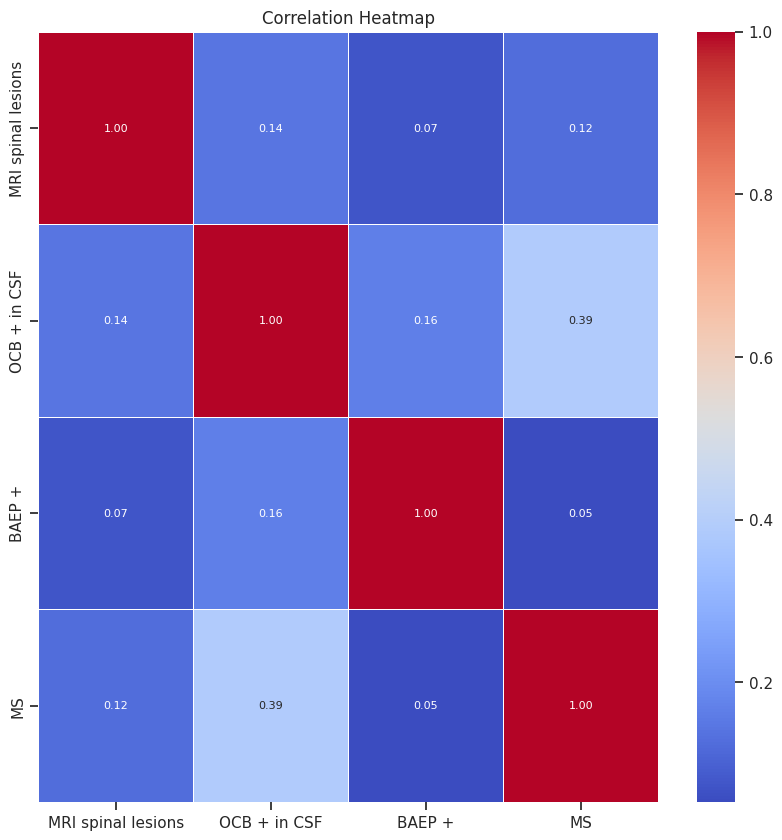

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

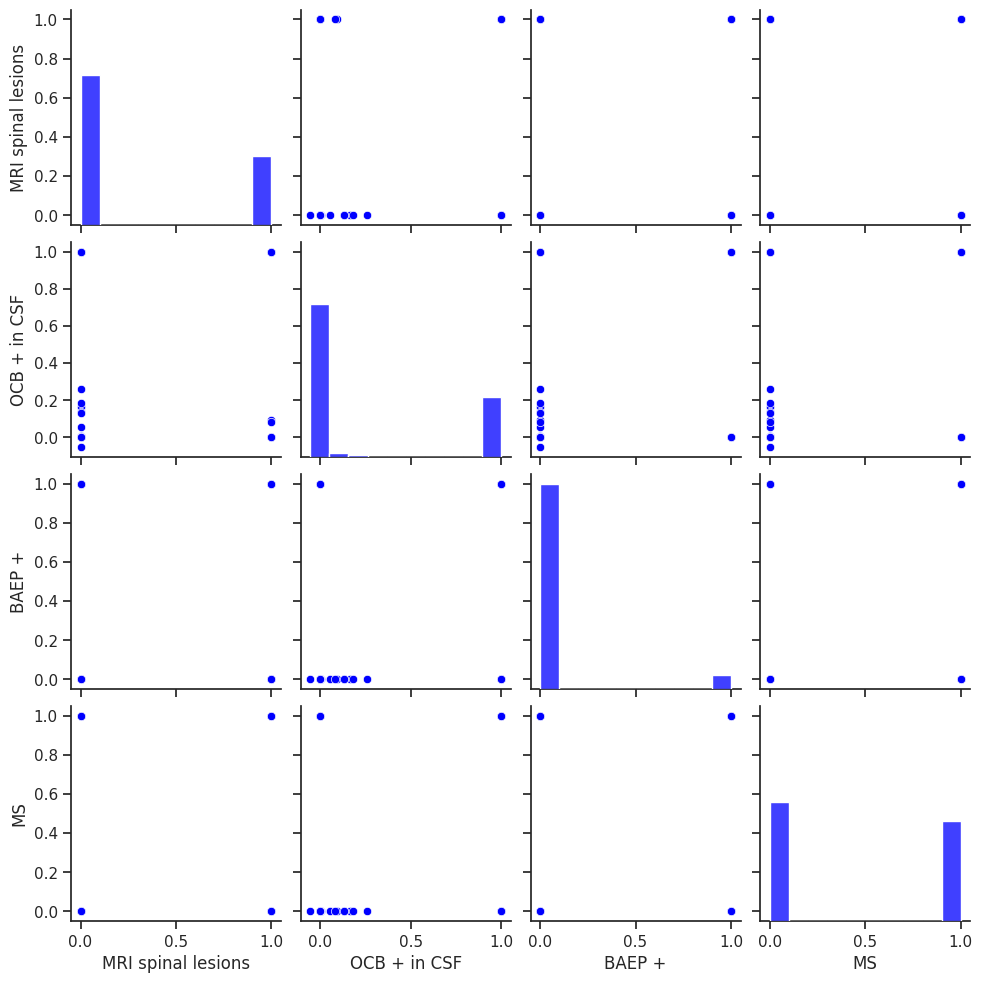

In [ ]:
# Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(data, diag_kws={'color': color}, plot_kws={'color': color})


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


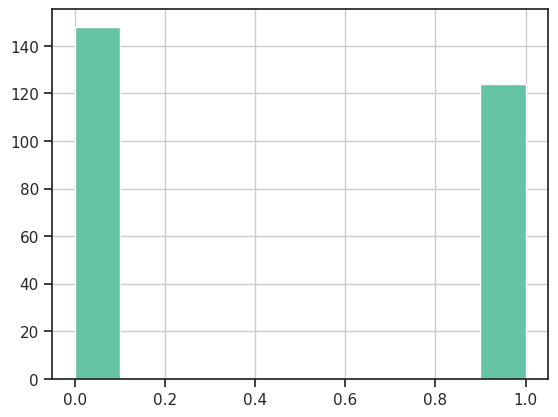

The baseline accuracy is: 0.5441176470588235


In [ ]:
#Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

#Visualise dataset imbalance
import matplotlib.pyplot as plt
y.hist()
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(x, y)
baseline_accuracy=clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (217, 3)
x_test: (55, 3)
y_train: (217,)
y_test: (55,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in rf_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Random Forest model
    rf = RandomForestClassifier(random_state=1)

    # Create an instance of GridSearchCV for Random Forest Classifier
    rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)

    # Fit GridSearchCV on the training fold
    rf_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_rf_model = rf_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", rf_cv.best_params_)
    print("F1 Score:", rf_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_rf_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_rf_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.7169747899159664
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.6936134453781513
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.7062184873949581
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.7361344537815127
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.6890756302521

##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.6032521865169089
Standard Deviation of Train F1 Score: 0.02332692740377318
Average Validation F1 Score: 0.5769544181308887
Standard Deviation of Validation F1 Score: 0.11435744467022173


##Model Predictions on Train and Test Sets:

In [ ]:
# Make predictions on the train set using best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = rf_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       118
         1.0       0.80      0.47      0.59        99

    accuracy                           0.71       217
   macro avg       0.73      0.69      0.68       217
weighted avg       0.73      0.71      0.69       217


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.64      0.83      0.72        30
         1.0       0.69      0.44      0.54        25

    accuracy                           0.65        55
   macro avg       0.66      0.64      0.63        55
weighted avg       0.66      0.65      0.64        55



Text(0.5, 1.0, 'Confusion Matrix of Test Data')

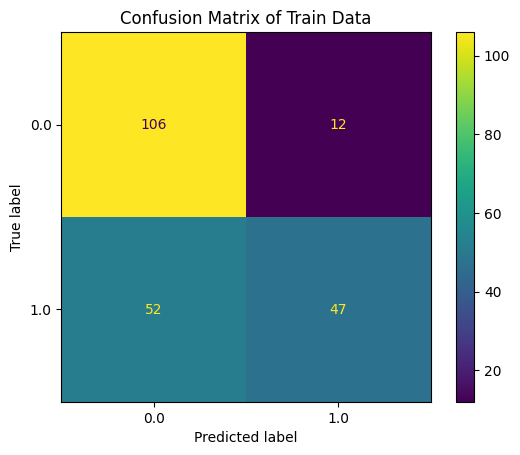

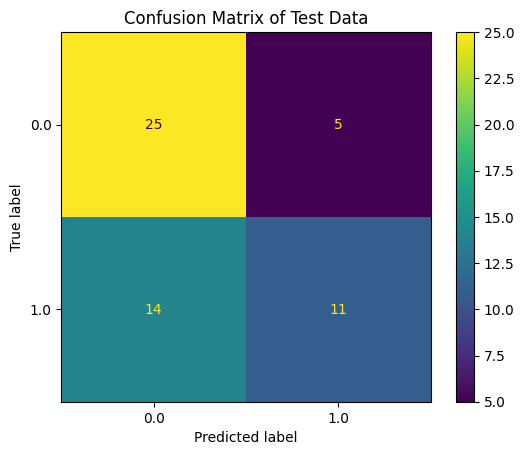

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

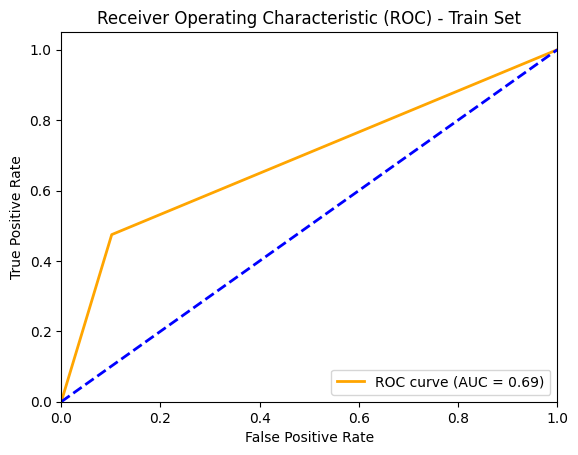

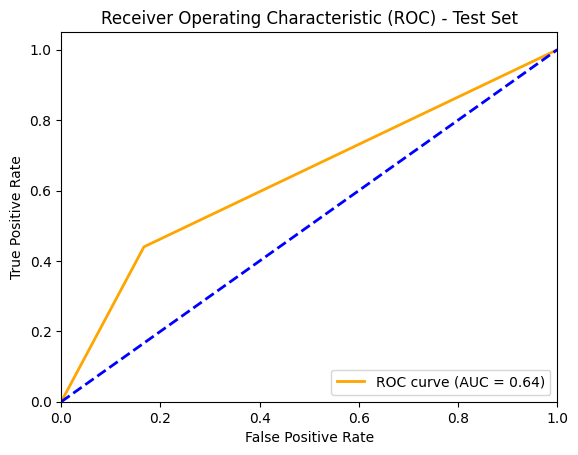

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

##Calculate Feature Importance Scores

MRI spinal lesions: 0.08984
OCB + in CSF: 0.86688
BAEP +: 0.04328


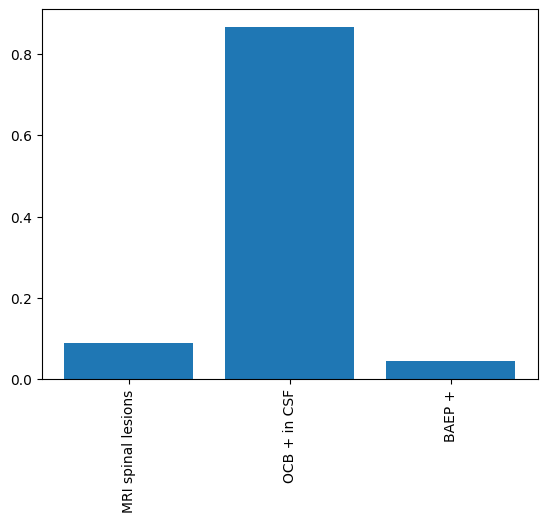

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()


#5. Using SMOTE Upsampling

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Mexican Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
135  136    0   37           0.0      0       0                1   
136  137    0   52           0.0      0       0                0   
137  138    0   48           0.0      1       1                1   
138  139    0   25           1.0      1       0                1   
139  140    1   40           0.0      0       0                1   

     MRI spinal lesions  MRI infratentorial lesions  Varicella  Schooling  \
0                     1                           0        1.0       20.0   
1                     1                           0        2.0       25.0   
2                     0                           0        1.0       20.0   
3                     0                           0        1.0       15.0   
4                     0                           0        1.0       20.0   
..                  ...                         ...        ...        ...   
135                   0                           0        1.0       20.0   
136                   1                           0        1.0       12.0   
137                   0                           0        2.0       12.0   
138                   1                           0        1.0       20.0   
139                   0                           0        2.0       20.0   

     Breastfeeding  Initial Symptoms  Monosymptomatic or Polysymptomatic  \
0              1.0               2.0                                 1.0   
1              NaN              10.0                                 2.0   
2              NaN               3.0                                 1.0   
3              1.0               7.0                                 2.0   
4              0.0               6.0                                 2.0   
..             ...               ...                                 ...   
135            1.0               8.0                                 2.0   
136            1.0               8.0                                 2.0   
137            1.0               6.0                                 2.0   
138            1.0               8.0                                 2.0   
139            0.0               4.0                                 2.0   

     LLSSEP  ULSSEP  MRI cortical lesions  Initial EDSS  Final EDSS  MS  
0         1       1                     1           1.0         1.0   1  
1         1       0                     0           2.0         2.0   1  
2         0       0                     1           1.0         1.0   1  
3         0       1                     1           1.0         1.0   1  
4         1       0                     0           1.0         1.0   1  
..      ...     ...                   ...           ...         ...  ..  
135       1       1                     0           NaN         NaN   0  
136       1       1                     0           NaN         NaN   0  
137       1       0                     1           NaN         NaN   0  
138       1       1                     0           NaN         NaN   0  
139       0       0                     0           NaN         NaN   0  

[140 rows x 20 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(272, 20)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                                     int64
Age                                     int64
OCB + in CSF                          float64
VEP +                                   int64
BAEP +                                  int64
Periventricular                         int64
MRI spinal lesions                      int64
MRI infratentorial lesions              int64
Varicella                             float64
Schooling                             float64
Breastfeeding                         float64
Initial Symptoms                      float64
Monosymptomatic or Polysymptomatic    float64
LLSSEP                                  int64
ULSSEP                                  int64
MRI cortical lesions                    int64
Initial EDSS                          float64
Final EDSS                            float64
MS                                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df.drop('MS', axis=1)
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(272, 18)
(272,)


Upsampling using SMOTE

In [ ]:
#Import libraries
from imblearn.over_sampling import SMOTE

# Upsample the minority class using SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

# Print dimensions
print(x_resampled.shape)
print(y_resampled.shape)

(296, 18)
(296,)


Creating a new dataset with resampled x and y

In [ ]:
# Create a new DataFrame by concatenating x_resampled and y_resampled
new_df = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.DataFrame(y_resampled, columns=['MS'])], axis=1)

# Print dimensions
print(new_df.shape)

(296, 19)


Visualising Relationship between Target Variable and Each Feature in x_resampled

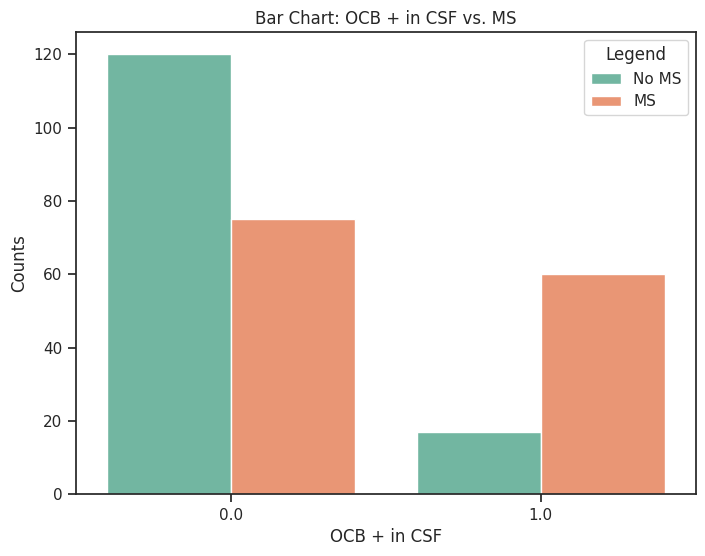

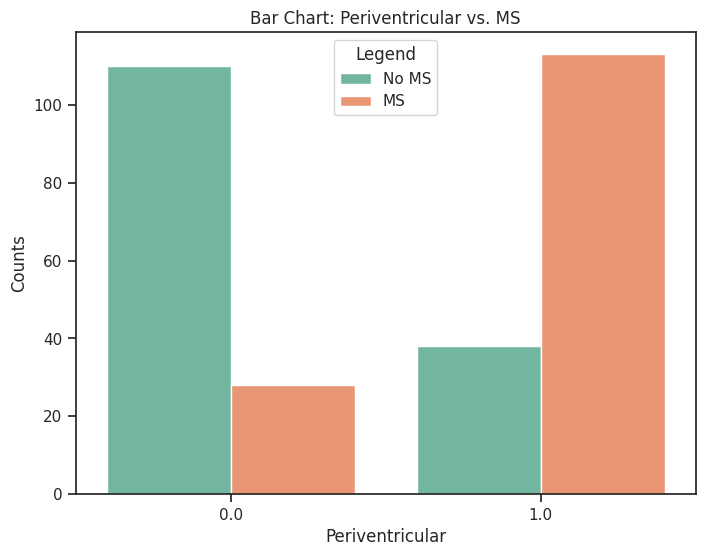

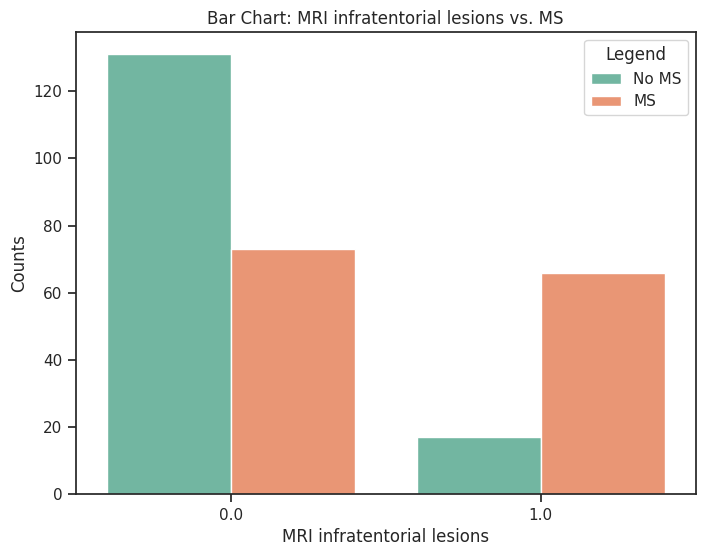

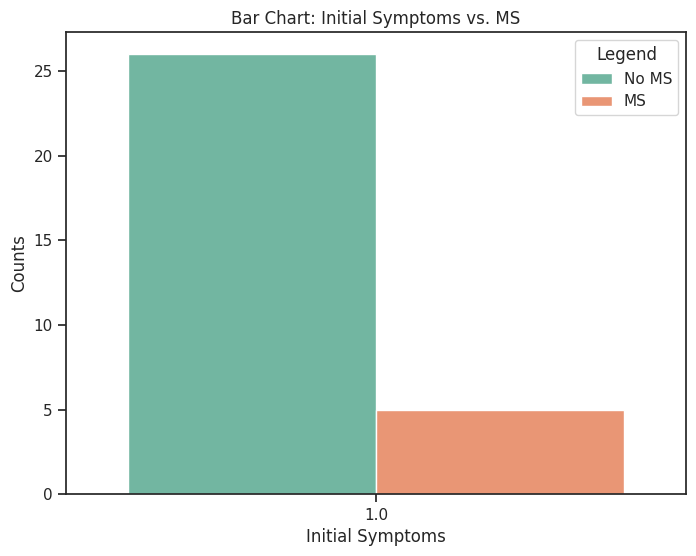

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette("Set2")

# Define features to plot
features = ['OCB + in CSF', 'Periventricular',
            'MRI infratentorial lesions', 'Initial Symptoms']

# Define a function to filter values to 0.0 or 1.0
def filter_values(value):
    if value == 0.0 or value == 1.0:
        return value
    else:
        return None

# Filter the data for the specified features
filtered_df = new_df.copy()
filtered_df[features] = filtered_df[features].applymap(filter_values)


# Plot Bar chart for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=feature, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(feature)



    plt.title(f"Bar Chart: {feature} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()

Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate and print the correlation matrix
print("Correlation Matrix")
new_df.corr()

Correlation Matrix


Sex       Age  OCB + in CSF  \
Sex                                 1.000000 -0.109912      0.158181   
Age                                -0.109912  1.000000      0.077998   
OCB + in CSF                        0.158181  0.077998      1.000000   
VEP +                               0.156504 -0.002687      0.134164   
BAEP +                              0.154668  0.207761      0.156447   
Periventricular                     0.161862  0.052801      0.252400   
MRI spinal lesions                 -0.019043  0.137174      0.149944   
MRI infratentorial lesions          0.157041 -0.045362      0.116454   
Varicella                           0.143595  0.165647     -0.012135   
Schooling                           0.020070 -0.159772      0.094929   
Breastfeeding                      -0.232025  0.153754      0.053081   
Initial Symptoms                    0.149773  0.105123      0.253959   
Monosymptomatic or Polysymptomatic -0.012427  0.004799      0.173265   
LLSSEP                              0.158178  0.034683      0.000164   
ULSSEP                              0.153703  0.110278      0.059993   
MRI cortical lesions                0.125002  0.074931      0.177579   
Initial EDSS                        0.145924  0.177193      0.125065   
Final EDSS                          0.097694  0.273383      0.157551   
MS                                  0.212663  0.072801      0.372445   

                                       VEP +    BAEP +  Periventricular  \
Sex                                 0.156504  0.154668         0.161862   
Age                                -0.002687  0.207761         0.052801   
OCB + in CSF                        0.134164  0.156447         0.252400   
VEP +                               1.000000  0.094419         0.163000   
BAEP +                              0.094419  1.000000         0.032532   
Periventricular                     0.163000  0.032532         1.000000   
MRI spinal lesions                  0.162255  0.058556        -0.019669   
MRI infratentorial lesions          0.173339  0.035087         0.319803   
Varicella                           0.113030 -0.014333         0.103368   
Schooling                           0.001229  0.076784         0.016136   
Breastfeeding                      -0.105731 -0.023731        -0.064048   
Initial Symptoms                    0.182552  0.152271         0.313591   
Monosymptomatic or Polysymptomatic  0.227034  0.068769         0.187290   
LLSSEP                              0.389961  0.094381         0.189070   
ULSSEP                              0.340529  0.144908         0.210664   
MRI cortical lesions                0.205481  0.224461         0.199557   
Initial EDSS                        0.184083 -0.032253         0.352486   
Final EDSS                          0.214523  0.116268         0.392958   
MS                                  0.212924  0.050124         0.533189   

                                    MRI spinal lesions  \
Sex                                          -0.019043   
Age                                           0.137174   
OCB + in CSF                                  0.149944   
VEP +                                         0.162255   
BAEP +                                        0.058556   
Periventricular                              -0.019669   
MRI spinal lesions                            1.000000   
MRI infratentorial lesions                    0.067428   
Varicella                                     0.006219   
Schooling                                     0.057767   
Breastfeeding                                 0.059704   
Initial Symptoms                              0.236083   
Monosymptomatic or Polysymptomatic            0.156185   
LLSSEP                                        0.338798   
ULSSEP                                        0.270092   
MRI cortical lesions                          0.021499   
Initial EDSS                                  0.168185   
Final EDSS                                    0.204590 

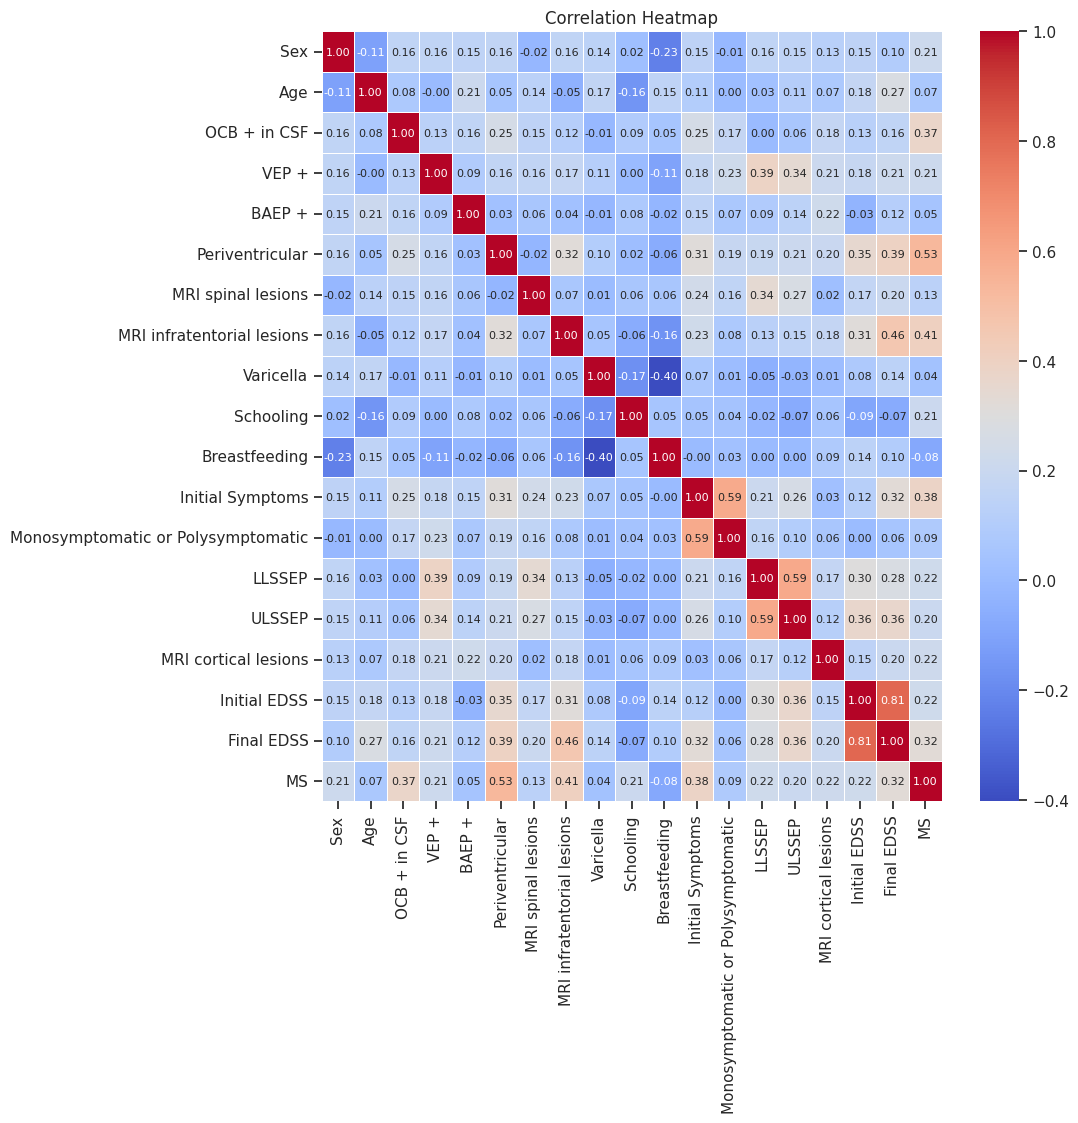

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = new_df.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

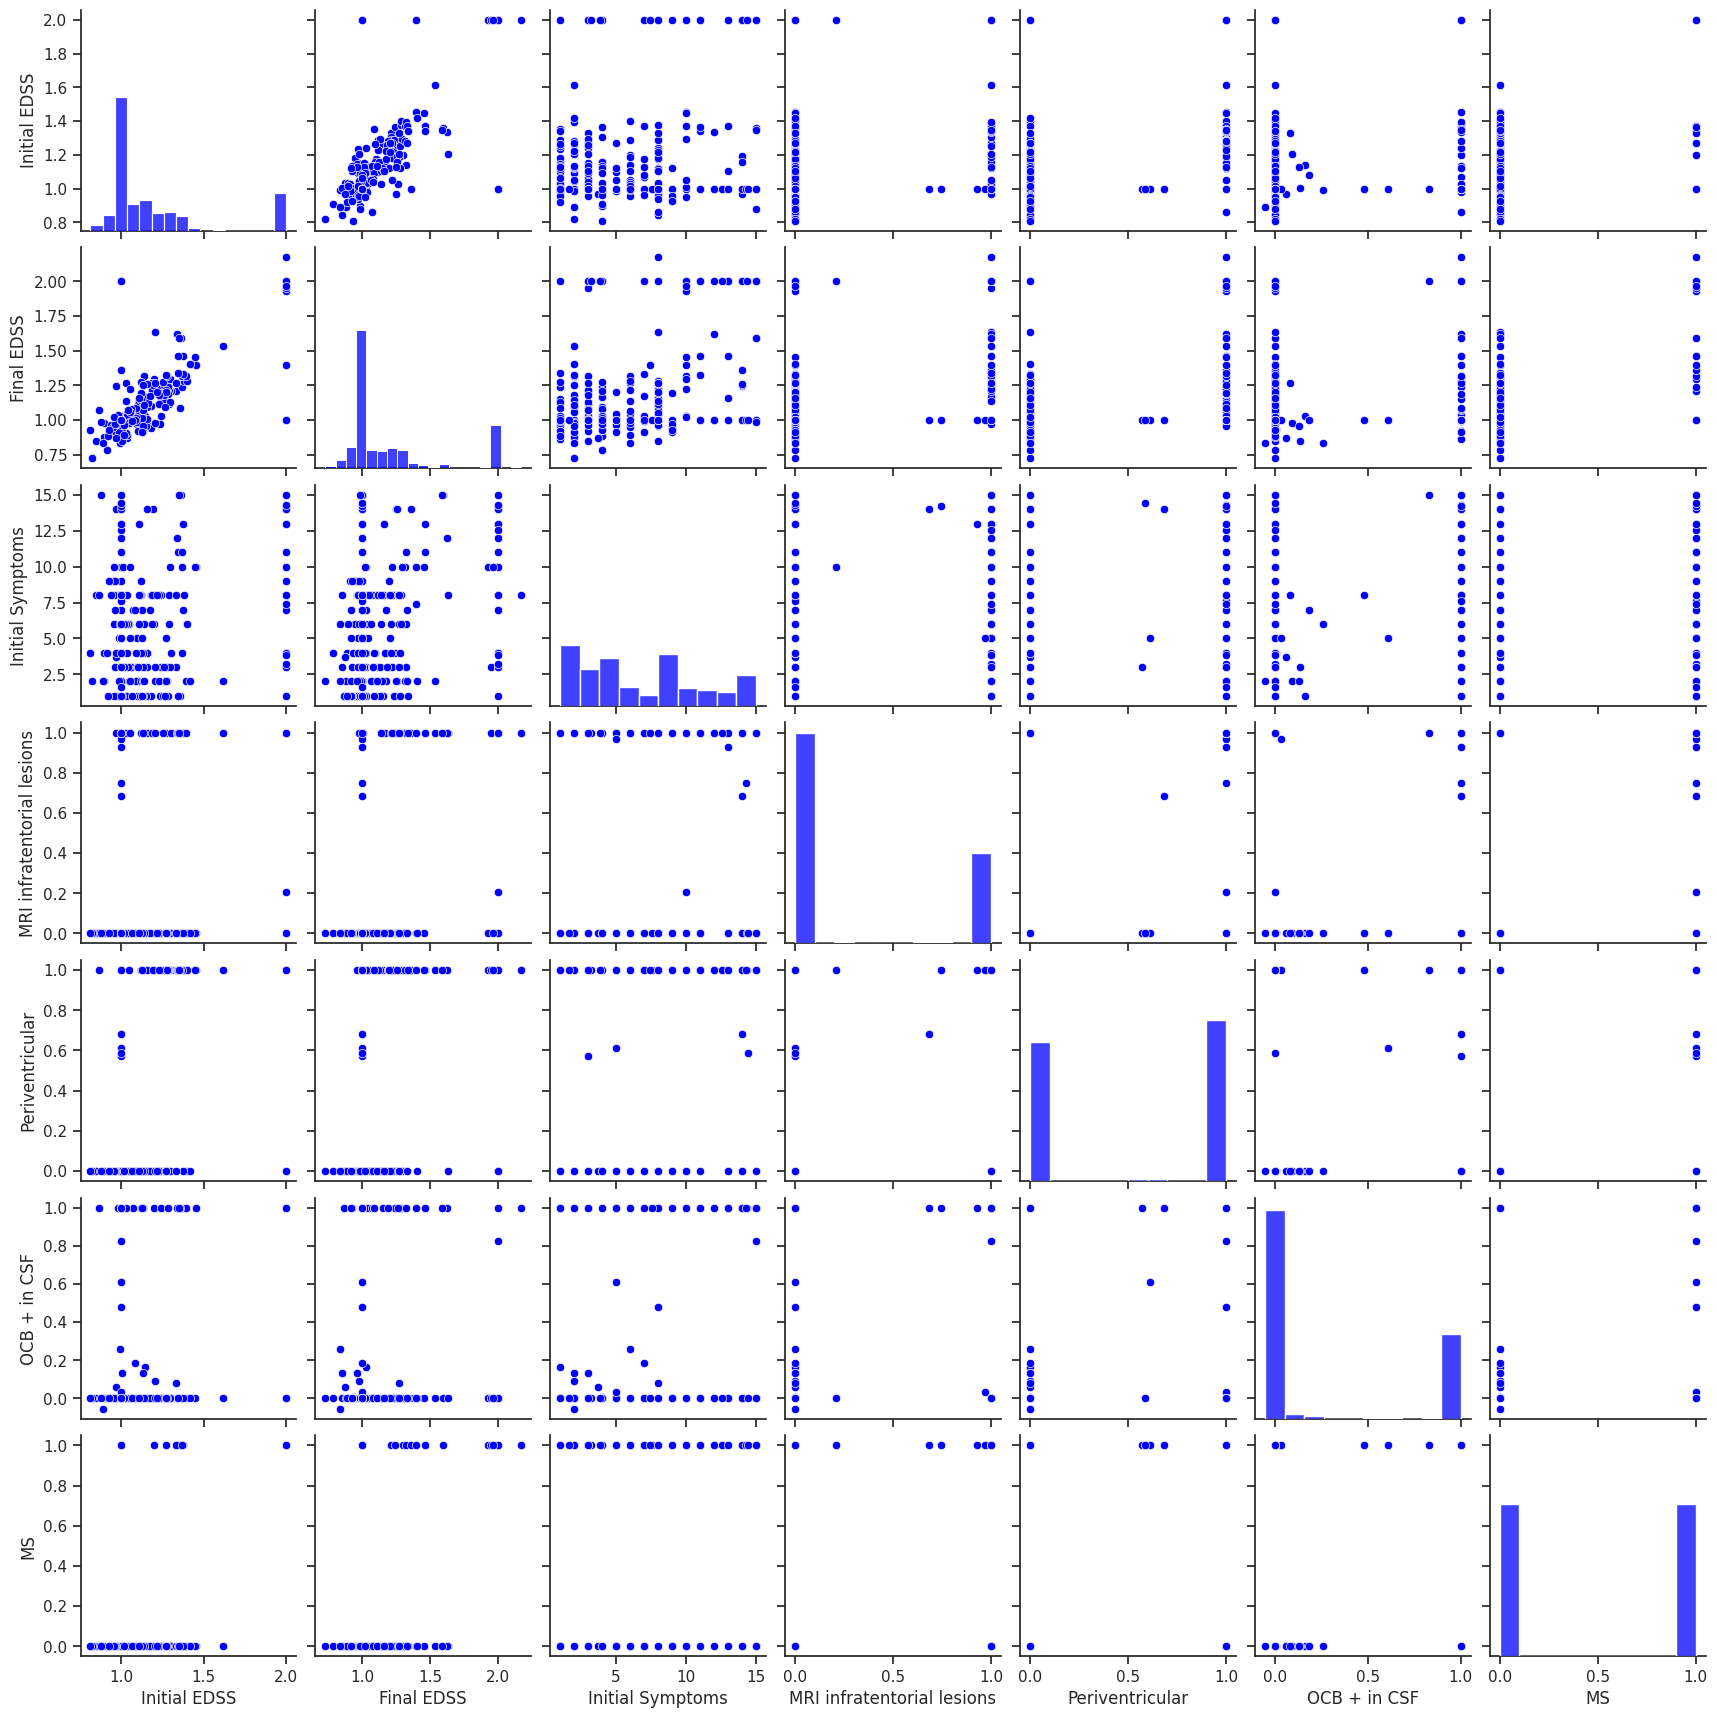

In [ ]:
# Import library
import seaborn as sns

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(new_df, diag_kws={'color': color}, plot_kws={'color': color})

In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

Features with multicollinearity (absolute correlation coefficient > 0.7):
Initial EDSS - Final EDSS


Checking for imbalanced classes in the dataset

1.0    50.0
0.0    50.0
Name: MS, dtype: float64


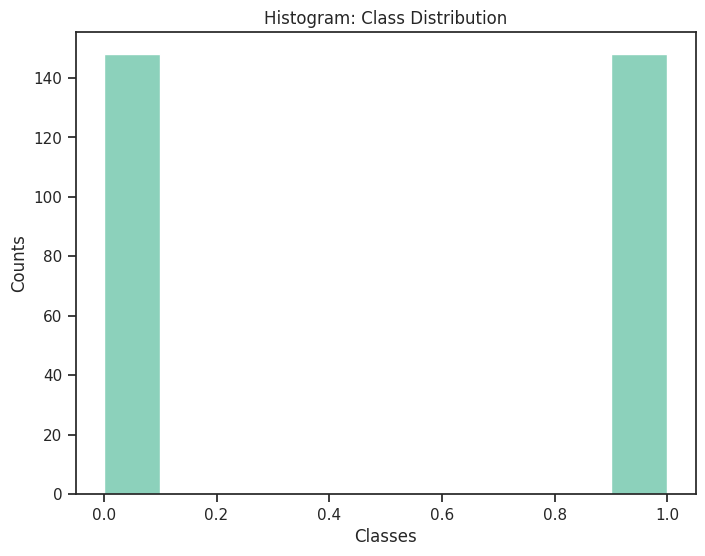

The baseline accuracy is: 0.5


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Check if dataset is imbalanced
print(y_resampled.value_counts() * 100.0 / len(y_resampled))

#Visualise dataset imbalance
plt.figure(figsize=(8, 6))
sns.histplot(y_resampled)
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title("Histogram: Class Distribution")
plt.grid(False)
plt.show()

#Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(x_resampled, y_resampled)
baseline_accuracy = clf.score(x_resampled, y_resampled)
print("The baseline accuracy is:", baseline_accuracy)

##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=1,shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (236, 18)
x_test: (60, 18)
y_train: (236,)
y_test: (60,)


##Importing Libraries for Following Steps

In [ ]:
# Import libraries
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}


##Stratified K-Fold Cross Validation:

In [ ]:
# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##Training and Model Validation:



In [ ]:
# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating over each fold
for train_index, val_index in rf_skfold.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create an instance of Random Forest model
    rf = RandomForestClassifier(random_state=1)

    # Create an instance of GridSearchCV for Random Forest Classifier
    rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)

    # Fit GridSearchCV on the training fold
    rf_cv.fit(x_train_fold, y_train_fold)

    # Get the best estimator from GridSearchCV
    best_rf_model = rf_cv.best_estimator_

    # Print best parameters and F1 score
    print("Best Parameters:", rf_cv.best_params_)
    print("F1 Score:", rf_cv.best_score_)

    # Fitting the best estimator on the training fold and making predictions
    y_train_pred = best_rf_model.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for the validation fold
    y_val_pred = best_rf_model.predict(x_val_fold)

    # Calculating F1 score for the validation set
    val_f1 = f1_score(y_val_fold, y_val_pred)

    # Appending validation F1 score to the list
    val_f1_scores.append(val_f1)


Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.9735419630156471
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.9524893314366999
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': None}
F1 Score: 0.9524893314366999
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': None}
F1 Score: 0.968421052631579
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
F1 Score: 0.9733997155049787


##Average F1 Scores and Standard Deviation:

In [ ]:
# Calculating the average and standard deviation of F1 scores for train and validation sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_val_f1 = np.mean(val_f1_scores)
std_val_f1 = np.std(val_f1_scores)

# Print the average and standard deviation for train and validation F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Validation F1 Score:", avg_val_f1)
print("Standard Deviation of Validation F1 Score:", std_val_f1)


Average Train F1 Score: 0.9895506108202443
Standard Deviation of Train F1 Score: 0.008734834100699864
Average Validation F1 Score: 0.9536681455190772
Standard Deviation of Validation F1 Score: 0.028520274521025613


##Model Training and Prediction:

Using Upsampled Trained Data

In [ ]:
# Make predictions on the train set using best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(x_train)

# Make predictions on the test set using best model
best_model = rf_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

Using Unseen Data with x_resampled

In [ ]:
# Make predictions on the train set using best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(x_resampled)

# Make predictions on the test set using best model
best_model = rf_cv.best_estimator_
y_test_pred = best_model.predict(x_test)

##Visualise Various Classification Metrics

Using Upsampled Trained Data

In [ ]:
# Make predictions on the train set using best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(x_train)  # Use X_train instead of x_resampled

# Make predictions on the test set using best model
y_test_pred = best_model.predict(x_test)  # Use X_test instead of x_test

# Print Classification Report
print("Classification Report of Train Data:")
print(classification_report(y_train, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       117
         1.0       0.99      0.98      0.99       119

    accuracy                           0.99       236
   macro avg       0.99      0.99      0.99       236
weighted avg       0.99      0.99      0.99       236


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        31
         1.0       1.00      0.90      0.95        29

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



Using Unseen Data with x_resampled

In [ ]:
#Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report of Train Data:")
print(classification_report(y_resampled, y_train_pred))

print()

print("Classification Report of Test Data: ")
print(classification_report(y_test, y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       148
         1.0       0.97      0.98      0.98       148

    accuracy                           0.98       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.98      0.98      0.98       296


Classification Report of Test Data: 
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        31
         1.0       0.94      1.00      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Using Upsampled Trained Data

Text(0.5, 1.0, 'Confusion Matrix of Test Data')

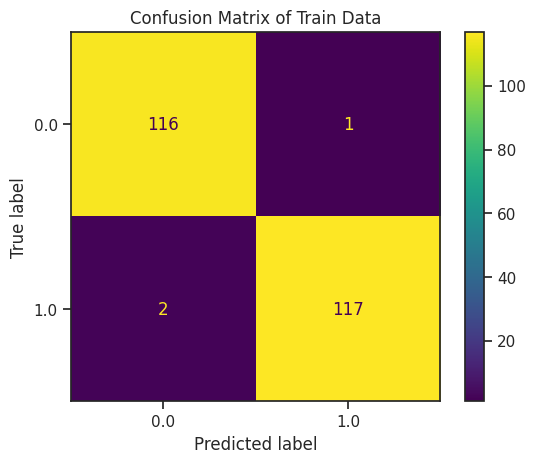

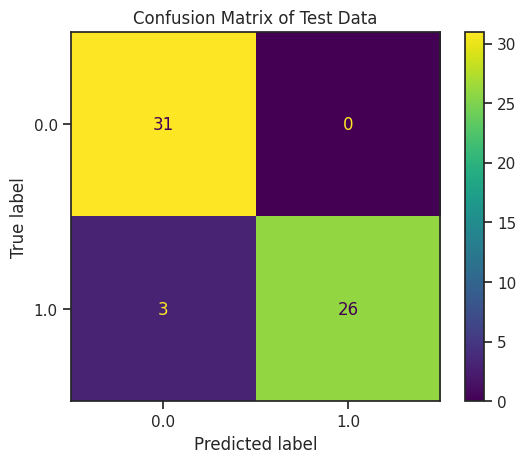

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

Using Unseen Data with x_resampled

Text(0.5, 1.0, 'Confusion Matrix of Test Data')

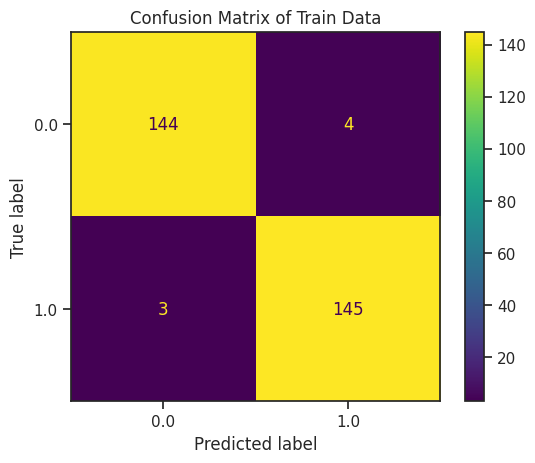

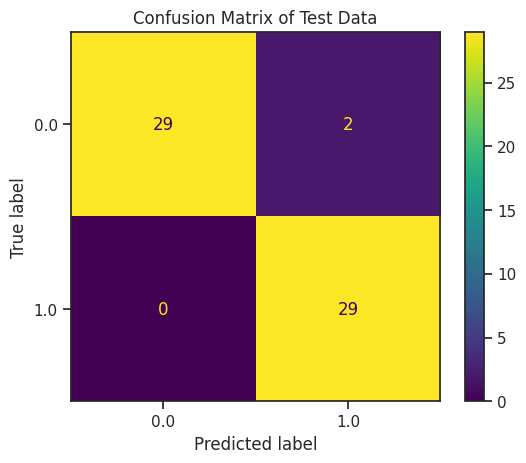

In [ ]:
#Plot Confusion Matrix for Train and Test Data
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Confusion Matrix of Train Data
ConfusionMatrixDisplay.from_predictions(y_resampled, y_train_pred)
plt.title('Confusion Matrix of Train Data')

#Confusion Matrix of Test Data
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix of Test Data')

Using Upsampled Trained Data

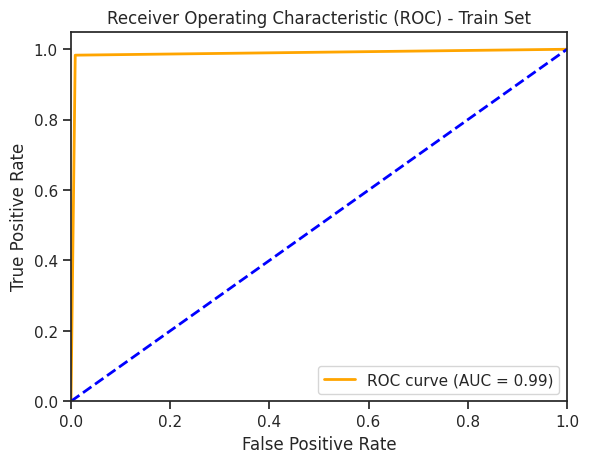

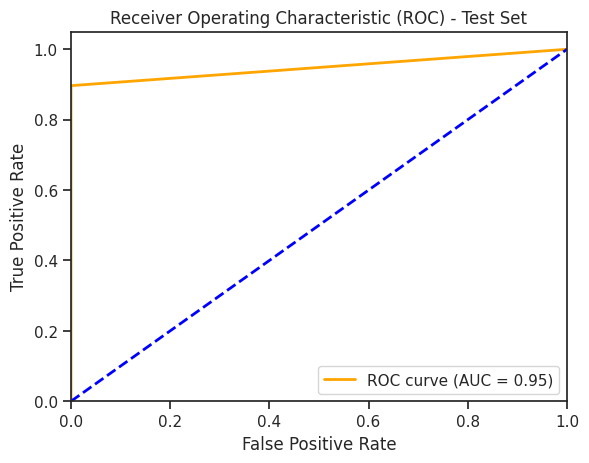

In [ ]:
#Plot ROC Curve for Train and Test Data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_train]
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()

Using Unseen Data with x_resampled

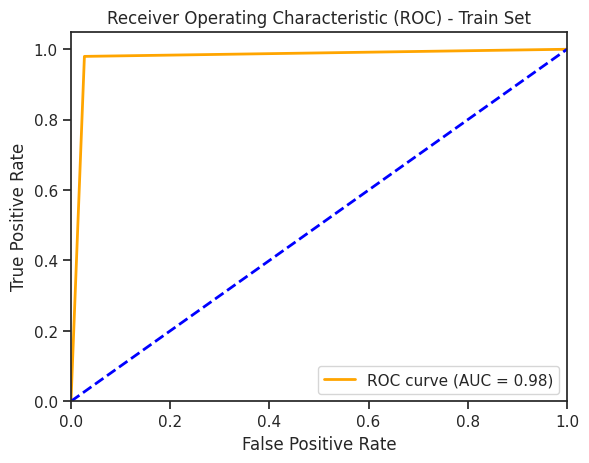

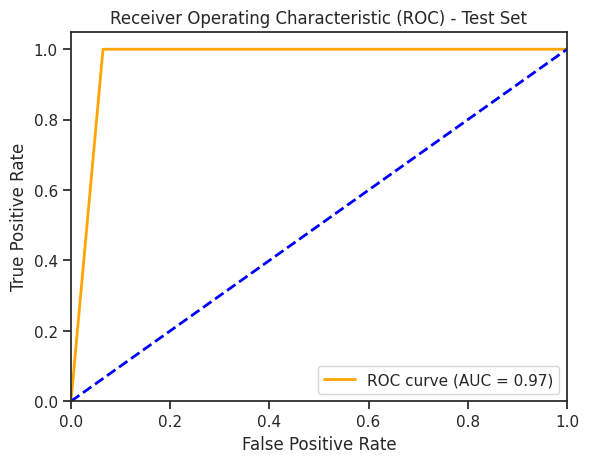

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in y_resampled]  # Use y_resampled instead of y_train
y_test_mapped = [mapping[val] for val in y_test]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculate Feature Importance Scores

Using Upsampled Trained Data

Initial EDSS: 0.39875
Final EDSS: 0.30240
Initial Symptoms: 0.07541
MRI infratentorial lesions: 0.04463
Periventricular: 0.14019
OCB + in CSF: 0.03863


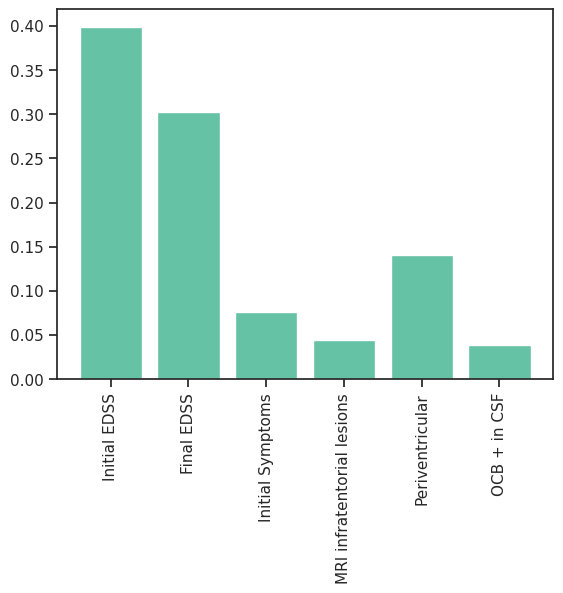

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()


Using Unseen Data with x_resampled

Sex: 0.00842
Age: 0.02320
OCB + in CSF: 0.06448
VEP +: 0.01003
BAEP +: 0.00123
Periventricular: 0.16159
MRI spinal lesions: 0.00689
MRI infratentorial lesions: 0.07761
Varicella: 0.01116
Schooling: 0.02392
Breastfeeding: 0.02350
Initial Symptoms: 0.07139
Monosymptomatic or Polysymptomatic: 0.00405
LLSSEP: 0.01291
ULSSEP: 0.01364
MRI cortical lesions: 0.00598
Initial EDSS: 0.24068
Final EDSS: 0.23931


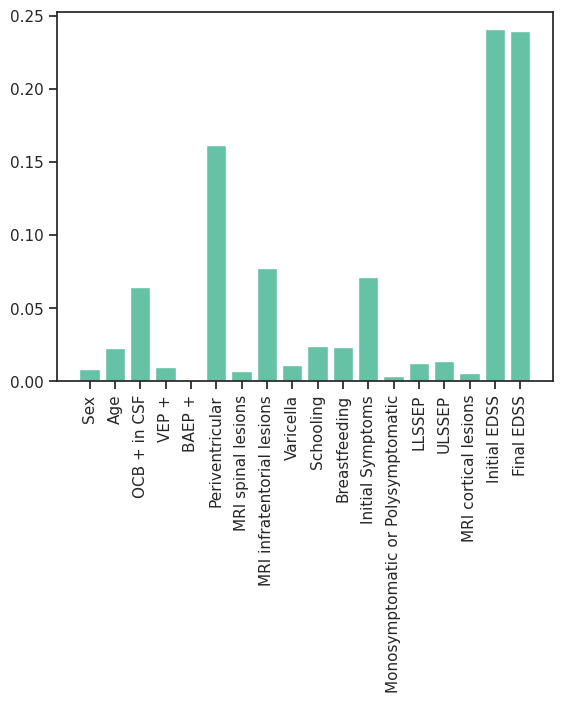

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()


#6. Testing on Mexican Dataset

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Specify file paths and load them into DataFrames
import pandas as pd
train_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df_train=pd.DataFrame(train_data)
test_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Updated Mexican Research Dataset.xlsx')
df_test=pd.DataFrame(test_data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the datasets and their dimensions

In [ ]:
# Visualise the train dataset
df_train.head(400)

Nr  Sex  Age  Fatigue  General weakness  Pain  Focal symptoms  \
0      2    0   56        0                 0     0               1   
1      3    0   47        0                 0     1               1   
2      4    0   43        0                 0     1               1   
3      5    0   39        0                 0     1               0   
4      6    0   61        0                 0     1               1   
..   ...  ...  ...      ...               ...   ...             ...   
133  165    0   65        0                 0     0               1   
134  166    1   61        0                 0     0               0   
135  167    0   28        0                 1     1               0   
136  169    0   22        0                 0     0               1   
137  170    0   32        0                 0     0               0   

     Cranial Nerve Symptoms  CN3  CN4  ...  Pathological CSF  \
0                         1    0    0  ...                 1   
1                         0    0    0  ...                 0   
2                         1    0    0  ...                 0   
3                         0    0    0  ...                 0   
4                         0    0    0  ...                 1   
..                      ...  ...  ...  ...               ...   
133                       0    0    0  ...                     
134                       1    1    0  ...                 1   
135                       0    0    0  ...                 0   
136                       0    0    0  ...                 0   
137                       1    0    0  ...                 1   

     Increased protein  Increased protein (g/l)  Pleocytosis  \
0                    0                     0.37            0   
1                    0                     0.28            0   
2                    0                     0.38            0   
3                                                          0   
4                    1                     0.57            0   
..                 ...                      ...          ...   
133                                         NaN                
134                  1                     0.96            1   
135                  0                     0.23            0   
136                  0                     0.16            0   
137                  0                     0.23            1   

     Pleocytosis (cells/ml)  OCB + in CSF  IgG levels in CSF  VEP +  BAEP + MS  
0                         4             0                         0       0  0  
1                         0             0               22.9      0       1  0  
2                         2                             25.3      1       0  0  
3                         1             0                                    0  
4                         0             1                         1       0  0  
..                      ...           ...                ...    ...     ... ..  
133                     NaN                                       1       0  0  
134                       6             0                117                 0  
135                       4                                       0          1  
136                       4             1               14.9      0       0  1  
137                       6             0               19.4      0          0  

[138 rows x 44 columns]

In [ ]:
# Visualise the test dataset
df_test.head(400)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
267  268    0   31           0.0      0       0                0   
268  269    1   21           1.0      0       0                0   
269  270    0   19           0.0      1       0                0   
270  271    0   32           1.0      1       0                1   
271  272    0   77           0.0      0       0                0   

     MRI spinal lesions  MRI infratentorial lesions  MS  
0                     1                           0   1  
1                     1                           0   1  
2                     0                           0   1  
3                     0                           0   1  
4                     0                           0   1  
..                  ...                         ...  ..  
267                   0                           0   0  
268                   1                           0   0  
269                   1                           0   0  
270                   0                           1   0  
271                   0                           0   0  

[272 rows x 10 columns]

In [ ]:
# Number of observations and features in both datasets
print("The train dataset dimensions are: ")
print(df_train.shape)
print("The test dataset dimensions are: ")
print(df_test.shape)

The train dataset dimensions are: 
(138, 44)
The test dataset dimensions are: 
(272, 10)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns from train dataset
df_train = df_train.drop(['Nr', 'Fatigue',	'General weakness',	'Pain',	'Focal symptoms',	'Cranial Nerve Symptoms','CN3',	'CN4'	,'CN5',	'CN6',	'CN8',	'Pathological reflexes',	"Babinski's",	'Rossolimo',	'Muscle strength',	'Reflex asymmetry',	'Muscle tone abnormalities',	'Proprioception',	'Superficial sensation',	'Coordination',	'Balance',	'Urinary incontinence',	'Urine retention',	'Vertigo',	'Sum of symptoms',	'MRI lesions specific to MS',	'MRI lesions indicative of other diseases',	'Unspecified MRI lesions',	'MRI infratentorial lesions',	'Periventricular',	'Juxtacortical',		'Pathological CSF','Increased protein', 'Increased protein (g/l)',	'Pleocytosis',	'Pleocytosis (cells/ml)',		'IgG levels in CSF',	'VEP +'		], axis=1)


In [ ]:
# Remove unnecessary columns from test dataset
df_test = df_test.drop(['Nr','VEP +', 'Periventricular', 'MRI infratentorial lesions'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print("Data types of Train Dataset Columns: ")
print(df_train.dtypes)
print()
print("Data types of Test Dataset Columns: ")
print(df_train.dtypes)

Data types of Train Dataset Columns: 
Sex                     int64
Age                     int64
MRI spinal lesions    float64
OCB + in CSF          float64
BAEP +                float64
MS                      int64
dtype: object

Data types of Test Dataset Columns: 
Sex                     int64
Age                     int64
MRI spinal lesions    float64
OCB + in CSF          float64
BAEP +                float64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_train = mice(df_train.values)
imputed_test = mice(df_test.values)

# convert imputed data back to a pandas DataFrame
imputed_df_train = pd.DataFrame(imputed_train, columns=df_train.columns)
imputed_df_test = pd.DataFrame(imputed_test, columns=df_test.columns)

Specify features and target variable

In [ ]:
#Specify x as train dataset (Lithuanian) and y as test dataset (Mexican)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(138, 6)
(272, 6)


Visualising Relationship between Target Variable and Each Feature in x

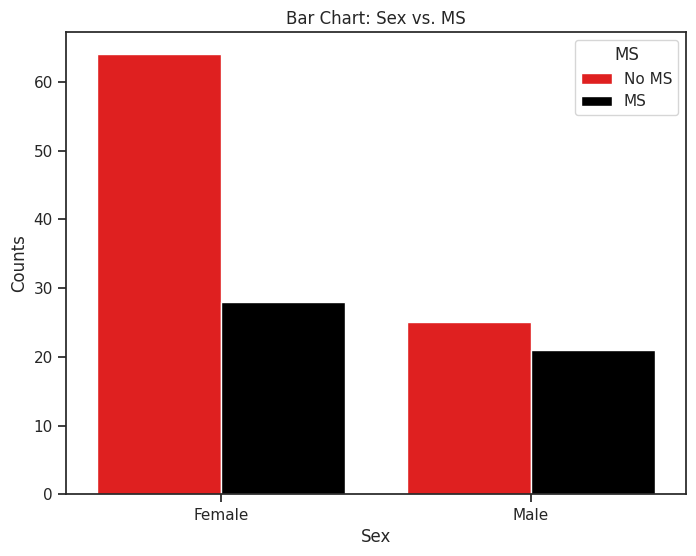

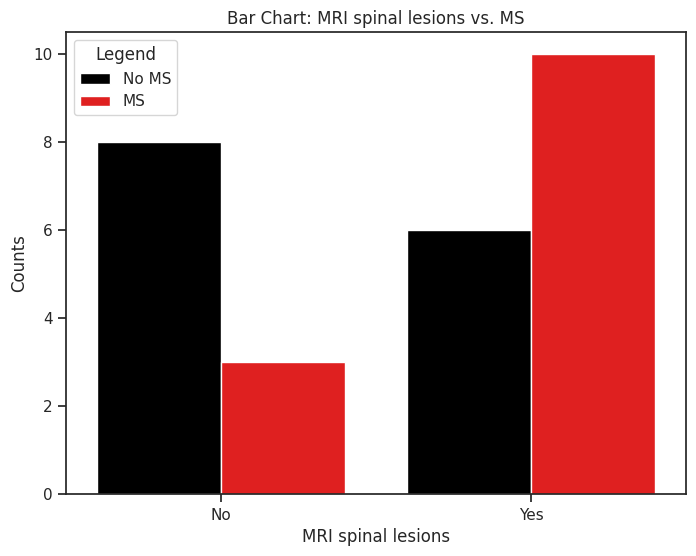

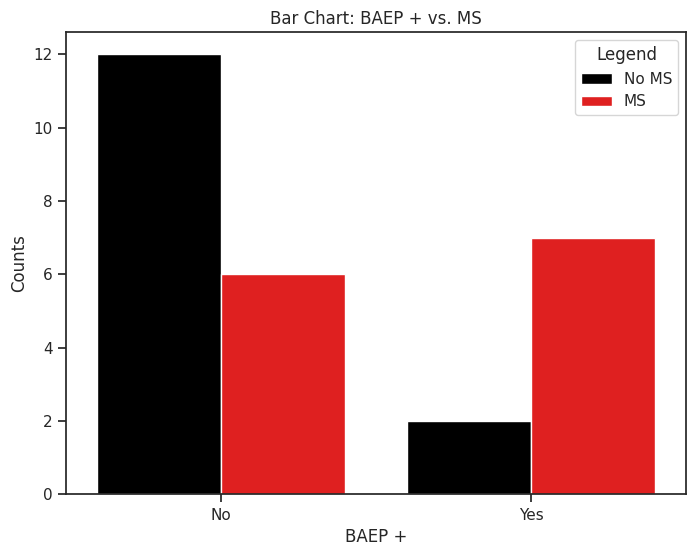

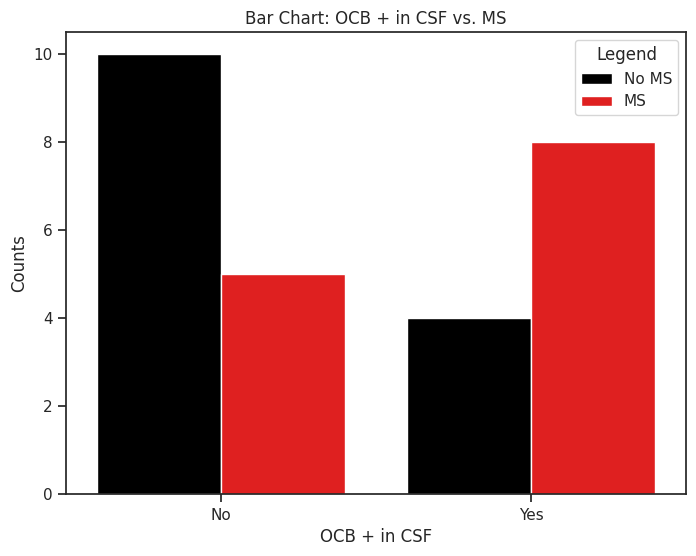

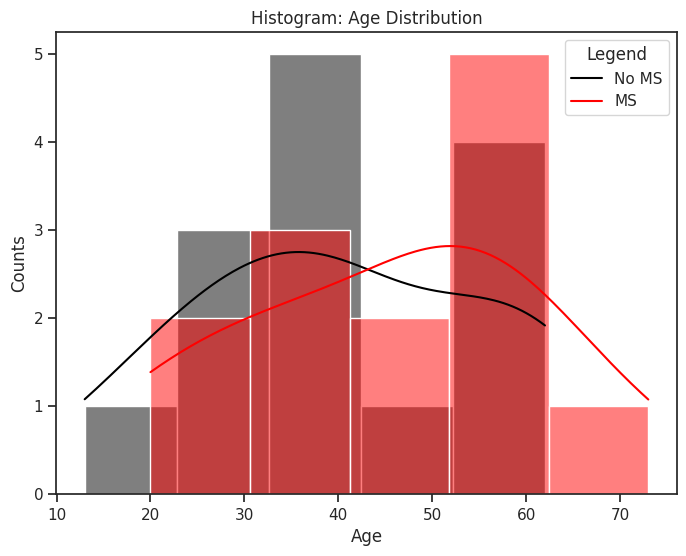

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette={"black", "red"})

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["black", "red"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()

# Create separate histograms for 'No MS' and 'MS' labels
plt.figure(figsize=(8, 6))
sns.histplot(filtered_df[filtered_df['MS'] == 0]['Age'], color='black', label='No MS', kde=True)
sns.histplot(filtered_df[filtered_df['MS'] == 1]['Age'], color='red', label='MS', kde=True)

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Histogram: Age Distribution")
plt.legend(title="Legend", labels=["No MS", "MS"])
plt.show()


Visualising correlation and multicollinearity in the train dataset (x) as a correlation matrix, heatmap and Seaborn plots

In [ ]:
# Import libraries
import pandas as pd

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Display the correlation table
corr_table = corr_matrix.style.set_properties(**{'background-color': 'transparent'})

# Display the correlation table
print("Correlation Matrix: ")
corr_table

Correlation Matrix: 


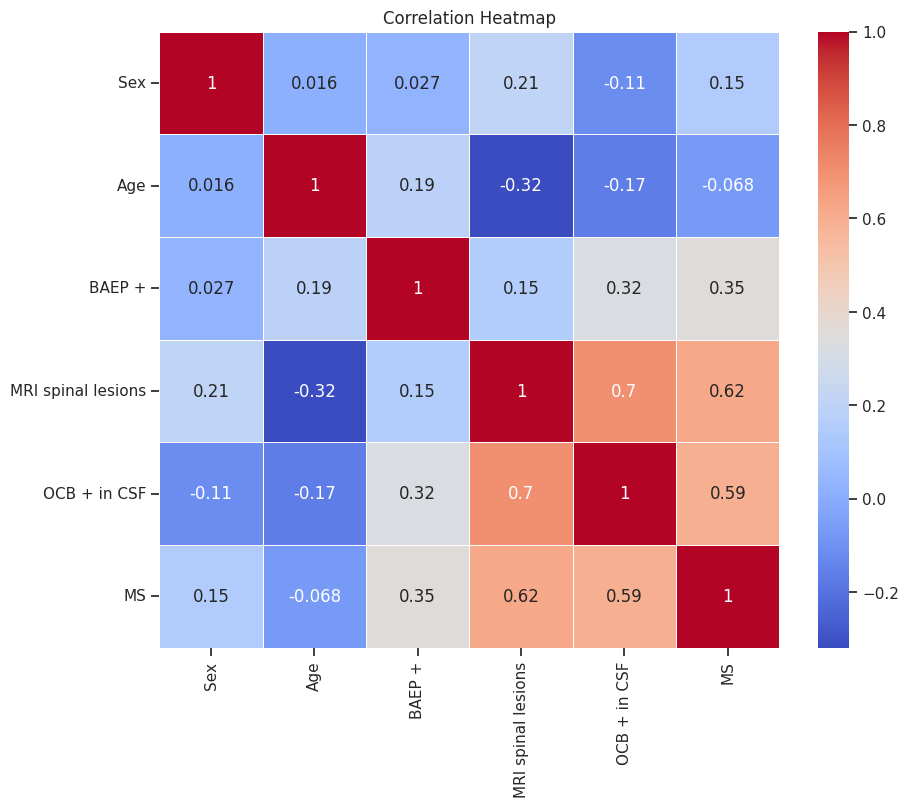

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


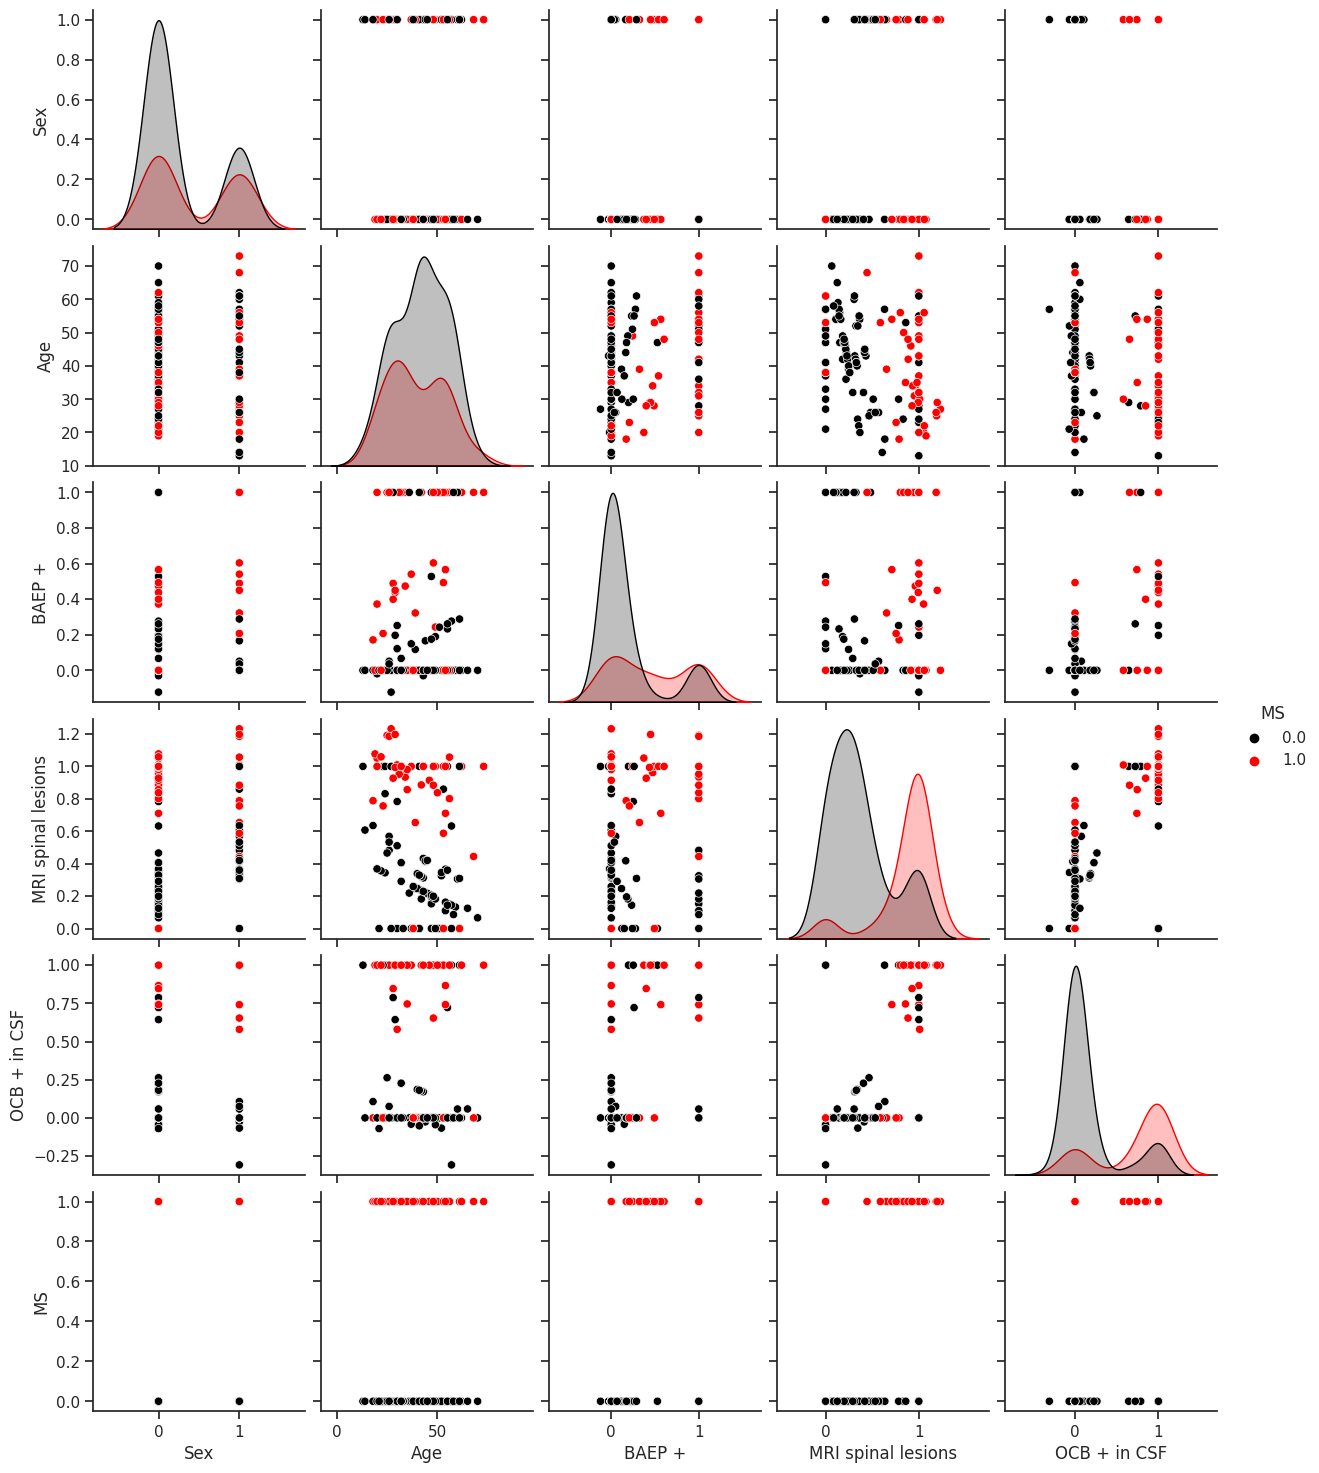

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features and target variable
selected_features = ['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF']
target_variable = 'MS'

# Concatenate the selected features and the target variable
data = imputed_df_train[selected_features + [target_variable]]

# Plot pairwise relationships
sns.pairplot(data, x_vars=selected_features, y_vars=selected_features + [target_variable], hue=target_variable)
plt.show()


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = imputed_df_train[selected_features].corr().abs()

for i in range(len(abs_corr_matrix.columns)):
    for j in range(i + 1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")


Features with multicollinearity (absolute correlation coefficient > 0.7):
MRI spinal lesions - OCB + in CSF


Checking for imbalanced classes in the dataset

0.0    64.492754
1.0    35.507246
Name: MS, dtype: float64


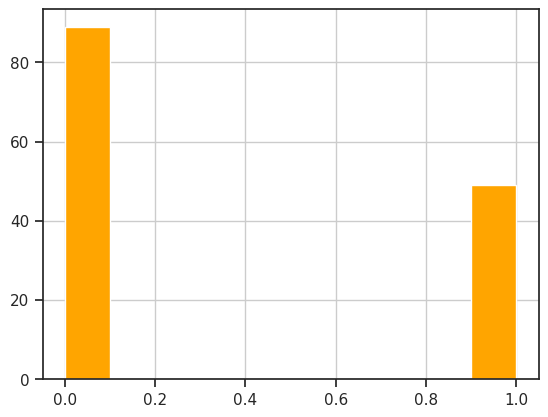

The baseline accuracy is: 0.644927536231884


In [ ]:
# Check if dataset is imbalanced
print(imputed_df_train['MS'].value_counts() * 100.0 / len(imputed_df_train['MS']))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
imputed_df_train['MS'].hist(color='orange')
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

features = imputed_df_train[selected_features]
outcome = imputed_df_train['MS']

clf = DummyClassifier(strategy='most_frequent')
clf.fit(features, outcome)
baseline_accuracy = clf.score(features, outcome)
print("The baseline accuracy is:", baseline_accuracy)


#Data splitting not done as y is a new dataset

##Cross-validation

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Create an instance of Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Perform stratified k-fold cross-validation for Random Forest Classifier
rf_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


Specify features and target variable

In [ ]:
#Specify x as train dataset (Lithuanian) and y as test dataset (Mexican)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(138, 6)
(272, 6)


Calculating average and standard deviation of classification metrics for each fold in K-Fold CV

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
test_f1_scores = []

# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Iterating over each fold
for train_index, test_index in rf_skfold.split(imputed_df_train, imputed_df_train['MS']):
    x_train_fold, x_test_fold = imputed_df_train.iloc[train_index], imputed_df_train.iloc[test_index]
    y_train_fold, y_test_fold = imputed_df_train['MS'].iloc[train_index], imputed_df_train['MS'].iloc[test_index]

    # Fitting the model and making predictions for train set
    rf.fit(x_train_fold, y_train_fold)
    y_train_pred = rf.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for test set
    y_test_pred = rf.predict(x_test_fold)

    # Calculating F1 score for the test set
    test_f1 = f1_score(y_test_fold, y_test_pred)

    # Appending test F1 score to the list
    test_f1_scores.append(test_f1)

# Calculating the average and standard deviation of F1 scores for train and test sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
std_test_f1 = np.std(test_f1_scores)

# Print the average and standard deviation for train and test F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Test F1 Score:", avg_test_f1)
print("Standard Deviation of Test F1 Score:", std_test_f1)


Average Train F1 Score: 1.0
Standard Deviation of Train F1 Score: 0.0
Average Test F1 Score: 1.0
Standard Deviation of Test F1 Score: 0.0


##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}

# Create an instance of Random Forest model
rf = RandomForestClassifier(random_state=1)

# Create an instance of GridSearchCV for Random Forest Classifier
rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)


##Model Validation

In [ ]:
# Train the model using GridSearchCV on the selected features
rf_cv.fit(imputed_df_train[selected_features], imputed_df_train['MS'])

# Print best parameters and accuracy score
print("Best Parameters:", rf_cv.best_params_)
print("Accuracy:", rf_cv.best_score_)

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Accuracy: 0.8615384615384615


##Model Training and Prediction:

In [ ]:
# Make predictions on imputed_df_train using the best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(imputed_df_train[selected_features])

# Make predictions on imputed_df_test using the best model
y_test_pred = best_model.predict(imputed_df_test[selected_features])

##Visualise Various Classification Metrics

In [ ]:
#Import libraries
from sklearn.metrics import classification_report

# Print Classification Report for train dataset (imputed_df_train)
print("Classification Report of Train Data:")
print(classification_report(imputed_df_train['MS'], y_train_pred))

print()

# Print Classification Report for test dataset (imputed_df_test)
print("Classification Report of Test Data:")
print(classification_report(imputed_df_test['MS'], y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        89
         1.0       0.98      0.90      0.94        49

    accuracy                           0.96       138
   macro avg       0.96      0.94      0.95       138
weighted avg       0.96      0.96      0.96       138


Classification Report of Test Data:
              precision    recall  f1-score   support

         0.0       0.58      0.95      0.72       148
         1.0       0.76      0.18      0.29       124

    accuracy                           0.60       272
   macro avg       0.67      0.57      0.50       272
weighted avg       0.66      0.60      0.52       272



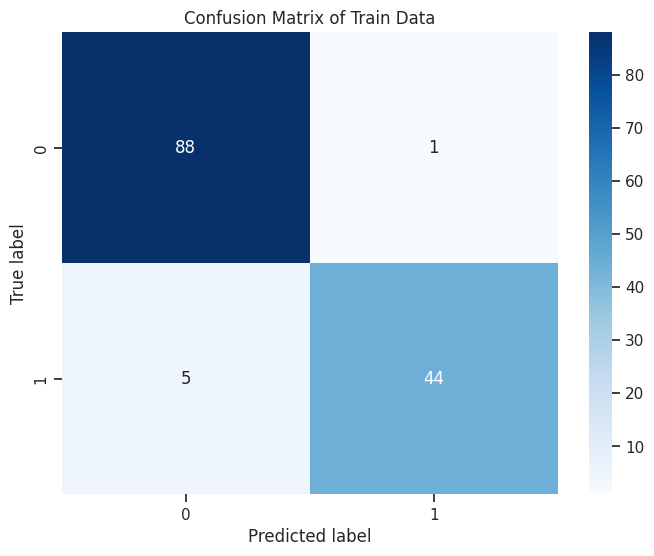

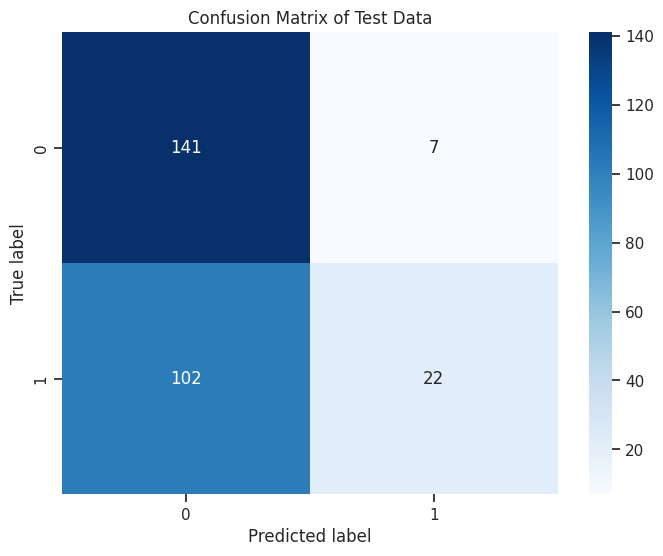

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(imputed_df_train['MS'], y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(imputed_df_test['MS'], y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



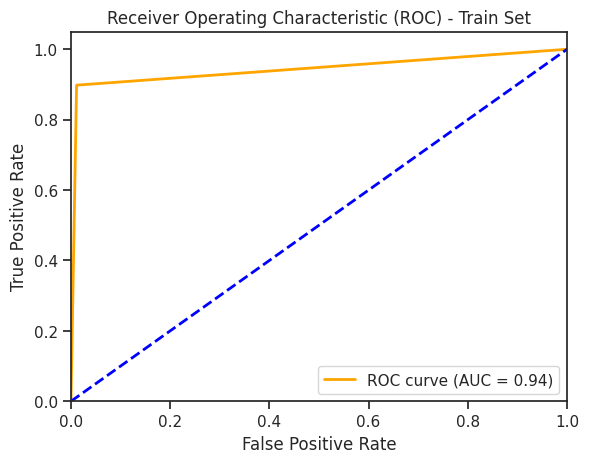

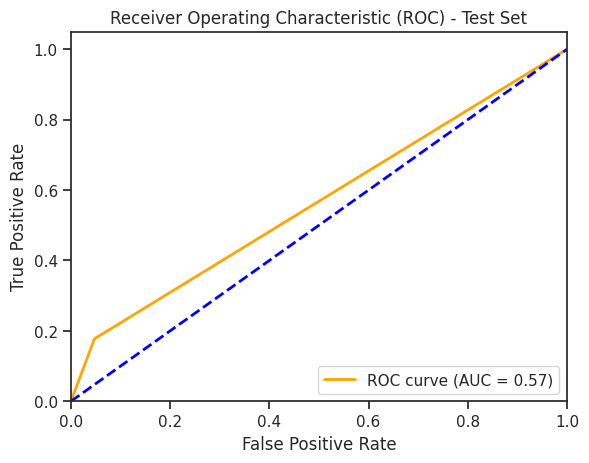

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in imputed_df_train['MS']]
y_test_mapped = [mapping[val] for val in imputed_df_test['MS']]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculating Feature Importances

Sex: 0.02800
Age: 0.14976
BAEP +: 0.14608
MRI spinal lesions: 0.43757
OCB + in CSF: 0.23859


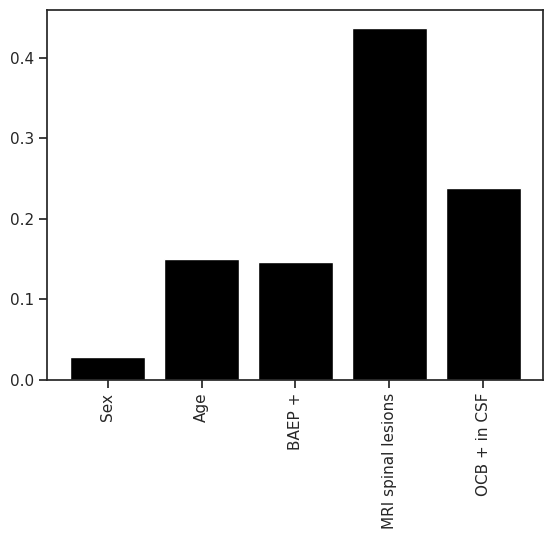

In [ ]:
importance = best_model.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (selected_features[i], v))

# Plot feature importances
plt.bar(selected_features, importance)
plt.xticks(rotation=90)
plt.show()




#7. Testing on Lithuanian Dataset

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file paths and load them into DataFrames
import pandas as pd
train_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Updated Mexican Research Dataset.xlsx')
df_train=pd.DataFrame(train_data)
test_data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df_test=pd.DataFrame(test_data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the datasets and their dimensions

In [ ]:
# Visualise the train dataset
df_train.head(400)

Nr  Sex  Age  OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34           0.0      0       0                0   
1      2    1   61           1.0      1       0                0   
2      3    1   22           1.0      0       0                0   
3      4    0   41           1.0      1       0                1   
4      5    0   34           0.0      0       0                1   
..   ...  ...  ...           ...    ...     ...              ...   
267  268    0   31           0.0      0       0                0   
268  269    1   21           1.0      0       0                0   
269  270    0   19           0.0      1       0                0   
270  271    0   32           1.0      1       0                1   
271  272    0   77           0.0      0       0                0   

     MRI spinal lesions  MRI infratentorial lesions  MS  
0                     1                           0   1  
1                     1                           0   1  
2                     0                           0   1  
3                     0                           0   1  
4                     0                           0   1  
..                  ...                         ...  ..  
267                   0                           0   0  
268                   1                           0   0  
269                   1                           0   0  
270                   0                           1   0  
271                   0                           0   0  

[272 rows x 10 columns]

In [ ]:
# Visualise the test dataset
df_test.head(400)

Nr  Sex  Age  Fatigue  General weakness  Pain  Focal symptoms  \
0      2    0   56        0                 0     0               1   
1      3    0   47        0                 0     1               1   
2      4    0   43        0                 0     1               1   
3      5    0   39        0                 0     1               0   
4      6    0   61        0                 0     1               1   
..   ...  ...  ...      ...               ...   ...             ...   
133  165    0   65        0                 0     0               1   
134  166    1   61        0                 0     0               0   
135  167    0   28        0                 1     1               0   
136  169    0   22        0                 0     0               1   
137  170    0   32        0                 0     0               0   

     Cranial Nerve Symptoms  CN3  CN4  ...  Pathological CSF  \
0                         1    0    0  ...                 1   
1                         0    0    0  ...                 0   
2                         1    0    0  ...                 0   
3                         0    0    0  ...                 0   
4                         0    0    0  ...                 1   
..                      ...  ...  ...  ...               ...   
133                       0    0    0  ...                     
134                       1    1    0  ...                 1   
135                       0    0    0  ...                 0   
136                       0    0    0  ...                 0   
137                       1    0    0  ...                 1   

     Increased protein  Increased protein (g/l)  Pleocytosis  \
0                    0                     0.37            0   
1                    0                     0.28            0   
2                    0                     0.38            0   
3                                                          0   
4                    1                     0.57            0   
..                 ...                      ...          ...   
133                                         NaN                
134                  1                     0.96            1   
135                  0                     0.23            0   
136                  0                     0.16            0   
137                  0                     0.23            1   

     Pleocytosis (cells/ml)  OCB + in CSF  IgG levels in CSF  VEP +  BAEP + MS  
0                         4             0                         0       0  0  
1                         0             0               22.9      0       1  0  
2                         2                             25.3      1       0  0  
3                         1             0                                    0  
4                         0             1                         1       0  0  
..                      ...           ...                ...    ...     ... ..  
133                     NaN                                       1       0  0  
134                       6             0                117                 0  
135                       4                                       0          1  
136                       4             1               14.9      0       0  1  
137                       6             0               19.4      0          0  

[138 rows x 44 columns]

In [ ]:
# Number of observations and features in both datasets
print("The train dataset dimensions are: ")
print(df_train.shape)
print("The test dataset dimensions are: ")
print(df_test.shape)

The train dataset dimensions are: 
(272, 10)
The test dataset dimensions are: 
(138, 44)


In [ ]:
# Remove unnecessary columns from train dataset
df_train = df_train.drop(['Nr','VEP +', 'Periventricular', 'MRI infratentorial lesions'], axis=1)

In [ ]:
# Remove unnecessary columns from test dataset
df_test = df_test.drop(['Nr', 'Fatigue',	'General weakness',	'Pain',	'Focal symptoms',	'Cranial Nerve Symptoms','CN3',	'CN4'	,'CN5',	'CN6',	'CN8',	'Pathological reflexes',	"Babinski's",	'Rossolimo',	'Muscle strength',	'Reflex asymmetry',	'Muscle tone abnormalities',	'Proprioception',	'Superficial sensation',	'Coordination',	'Balance',	'Urinary incontinence',	'Urine retention',	'Vertigo',	'Sum of symptoms',	'MRI lesions specific to MS',	'MRI lesions indicative of other diseases',	'Unspecified MRI lesions',	'MRI infratentorial lesions',	'Periventricular',	'Juxtacortical',		'Pathological CSF','Increased protein', 'Increased protein (g/l)',	'Pleocytosis',	'Pleocytosis (cells/ml)',		'IgG levels in CSF',	'VEP +'		], axis=1)


Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print("Data types of Train Dataset Columns: ")
print(df_train.dtypes)
print()
print("Data types of Test Dataset Columns: ")
print(df_train.dtypes)

Data types of Train Dataset Columns: 
Sex                     int64
Age                     int64
OCB + in CSF          float64
BAEP +                  int64
MRI spinal lesions      int64
MS                      int64
dtype: object

Data types of Test Dataset Columns: 
Sex                     int64
Age                     int64
OCB + in CSF          float64
BAEP +                  int64
MRI spinal lesions      int64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_train = mice(df_train.values)
imputed_test = mice(df_test.values)

# convert imputed data back to a pandas DataFrame
imputed_df_train = pd.DataFrame(imputed_train, columns=df_train.columns)
imputed_df_test = pd.DataFrame(imputed_test, columns=df_test.columns)

Specify features and target variable

In [ ]:
#Specify x as train dataset (Mexican) and y as test dataset (Lithuanian)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(272, 6)
(138, 6)


Visualising Relationship between Target Variable and Each Feature in x

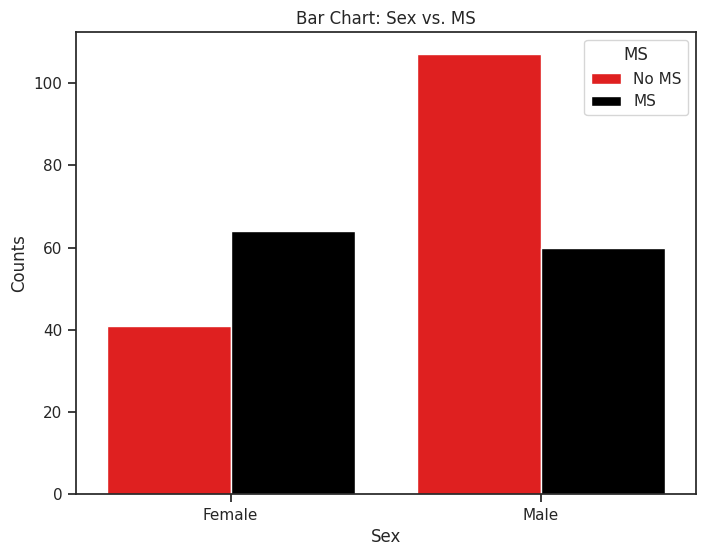

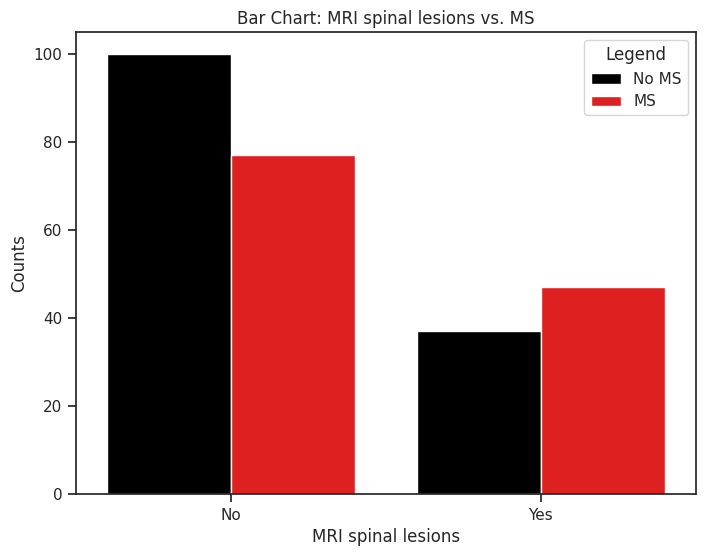

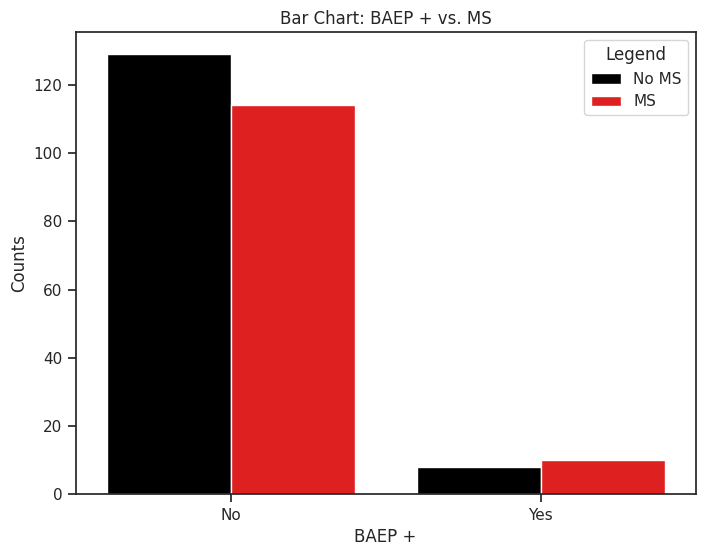

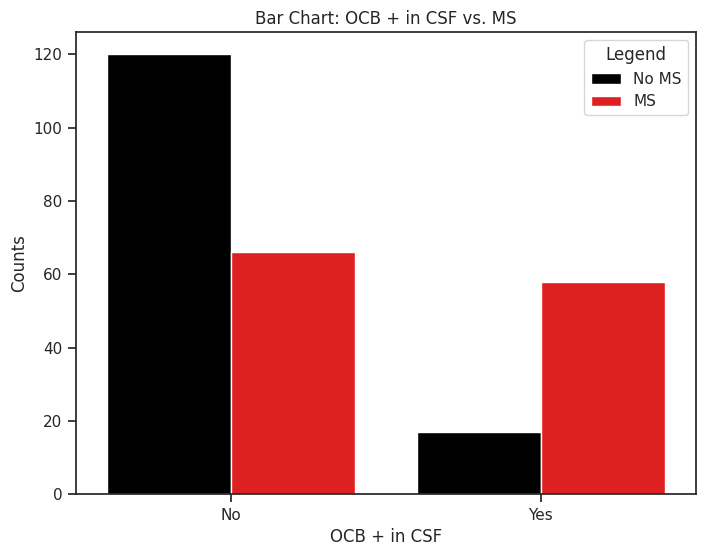

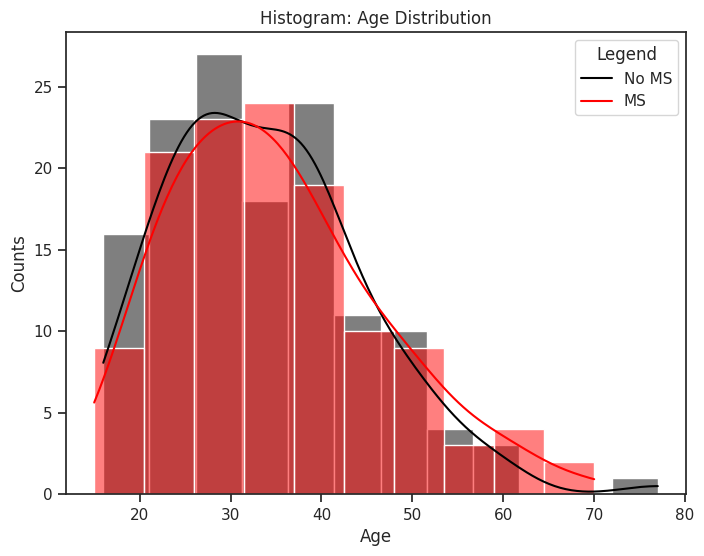

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette={"black", "red"})

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["black", "red"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()

# Create separate histograms for 'No MS' and 'MS' labels
plt.figure(figsize=(8, 6))
sns.histplot(filtered_df[filtered_df['MS'] == 0]['Age'], color='black', label='No MS', kde=True)
sns.histplot(filtered_df[filtered_df['MS'] == 1]['Age'], color='red', label='MS', kde=True)

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Histogram: Age Distribution")
plt.legend(title="Legend", labels=["No MS", "MS"])
plt.show()


Visualising correlation and multicollinearity in the train dataset (x) as a correlation matrix, heatmap and Seaborn plots

In [ ]:
# Import libraries
import pandas as pd

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Display the correlation table
corr_table = corr_matrix.style.set_properties(**{'background-color': 'transparent'})

# Display the correlation table
print("Correlation Matrix: ")
corr_table

Correlation Matrix: 


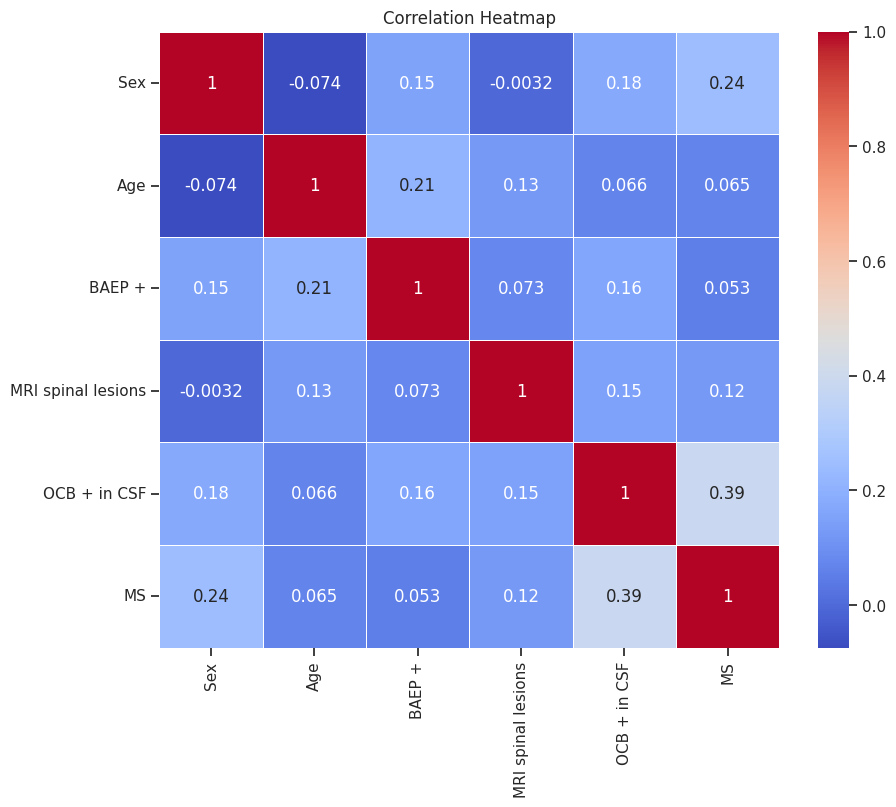

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = imputed_df_train[['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF', 'MS']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


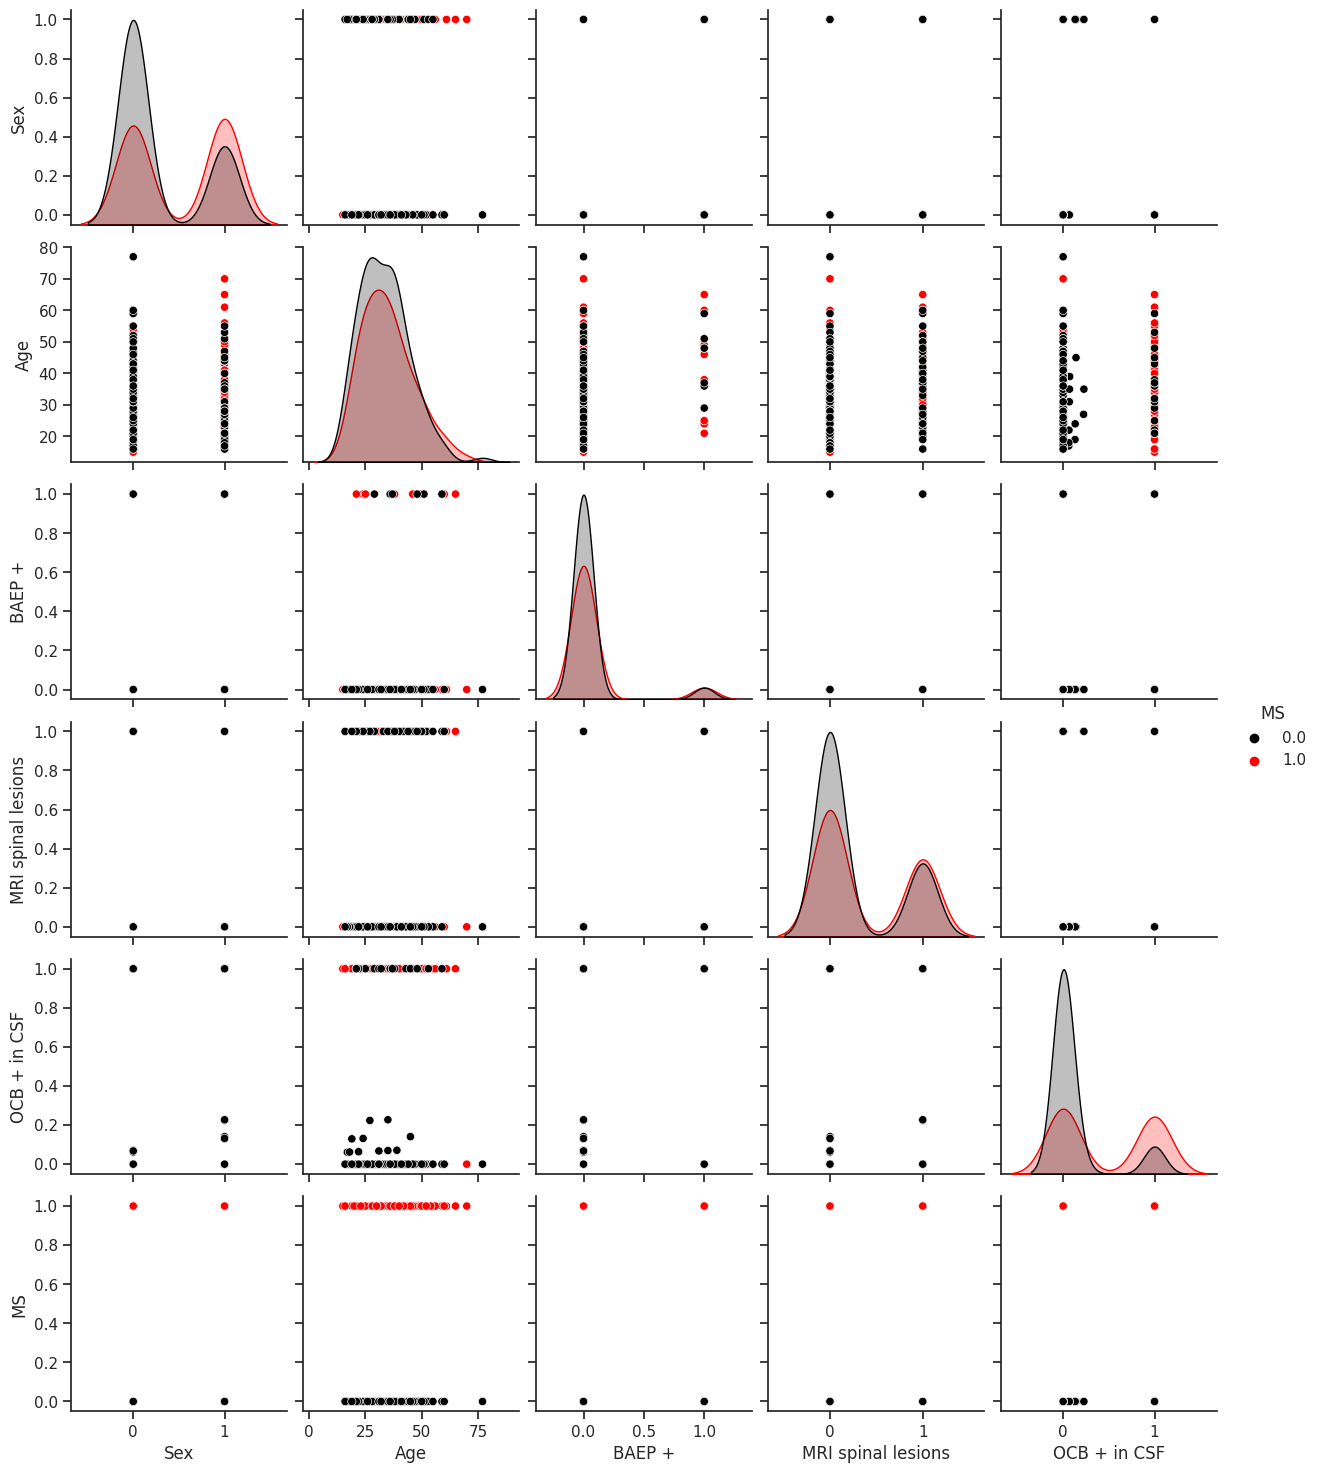

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the features and target variable
selected_features = ['Sex', 'Age', 'BAEP +', 'MRI spinal lesions', 'OCB + in CSF']
target_variable = 'MS'

# Concatenate the selected features and the target variable
data = imputed_df_train[selected_features + [target_variable]]

# Plot pairwise relationships
sns.pairplot(data, x_vars=selected_features, y_vars=selected_features + [target_variable], hue=target_variable)
plt.show()


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = imputed_df_train[selected_features].corr().abs()

for i in range(len(abs_corr_matrix.columns)):
    for j in range(i + 1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")


No Multicollinearity Observed


Checking for imbalanced classes in the dataset

0.0    54.411765
1.0    45.588235
Name: MS, dtype: float64


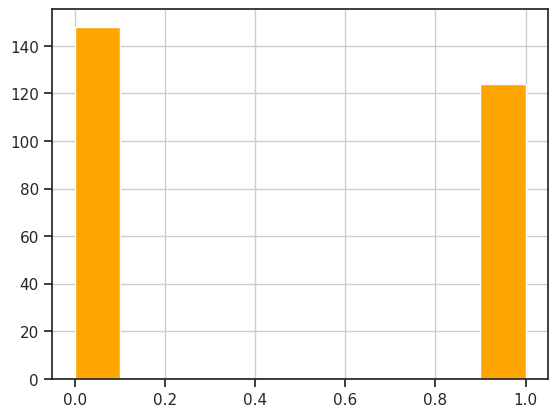

The baseline accuracy is: 0.5441176470588235


In [ ]:
# Check if dataset is imbalanced
print(imputed_df_train['MS'].value_counts() * 100.0 / len(imputed_df_train['MS']))

# Visualise dataset imbalance
import matplotlib.pyplot as plt
imputed_df_train['MS'].hist(color='orange')
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

features = imputed_df_train[selected_features]
outcome = imputed_df_train['MS']

clf = DummyClassifier(strategy='most_frequent')
clf.fit(features, outcome)
baseline_accuracy = clf.score(features, outcome)
print("The baseline accuracy is:", baseline_accuracy)


#Data splitting not done as y is a new dataset

##Cross-validation

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Create an instance of Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Perform stratified k-fold cross-validation for Random Forest Classifier
rf_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


Specify features and target variable

In [ ]:
#Specify x as train dataset (Mexican) and y as test dataset (Lithuanian)
x = imputed_df_train
y = imputed_df_test

#Print dimensions
print(x.shape)
print(y.shape)

(272, 6)
(138, 6)


Calculating average and standard deviation of classification metrics for each fold in K-Fold CV

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
test_f1_scores = []

# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Iterating over each fold
for train_index, test_index in rf_skfold.split(imputed_df_train, imputed_df_train['MS']):
    x_train_fold, x_test_fold = imputed_df_train.iloc[train_index], imputed_df_train.iloc[test_index]
    y_train_fold, y_test_fold = imputed_df_train['MS'].iloc[train_index], imputed_df_train['MS'].iloc[test_index]

    # Fitting the model and making predictions for train set
    rf.fit(x_train_fold, y_train_fold)
    y_train_pred = rf.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for test set
    y_test_pred = rf.predict(x_test_fold)

    # Calculating F1 score for the test set
    test_f1 = f1_score(y_test_fold, y_test_pred)

    # Appending test F1 score to the list
    test_f1_scores.append(test_f1)

# Calculating the average and standard deviation of F1 scores for train and test sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
std_test_f1 = np.std(test_f1_scores)

# Print the average and standard deviation for train and test F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Test F1 Score:", avg_test_f1)
print("Standard Deviation of Test F1 Score:", std_test_f1)


Average Train F1 Score: 1.0
Standard Deviation of Train F1 Score: 0.0
Average Test F1 Score: 1.0
Standard Deviation of Test F1 Score: 0.0


##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}

# Create an instance of Random Forest model
rf = RandomForestClassifier(random_state=1)

# Create an instance of GridSearchCV for Random Forest Classifier
rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)


##Model Validation

In [ ]:
# Train the model using GridSearchCV on the selected features
rf_cv.fit(imputed_df_train[selected_features], imputed_df_train['MS'])

# Print best parameters and accuracy score
print("Best Parameters:", rf_cv.best_params_)
print("Accuracy:", rf_cv.best_score_)



Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
Accuracy: 0.7026455026455027


##Model Training and Prediction:

In [ ]:
# Make predictions on imputed_df_train using the best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(imputed_df_train[selected_features])

# Make predictions on imputed_df_test using the best model
y_test_pred = best_model.predict(imputed_df_test[selected_features])

##Visualise Various Classification Metrics

In [ ]:
#Import libraries
from sklearn.metrics import classification_report

# Print Classification Report for train dataset (imputed_df_train)
print("Classification Report of Train Data:")
print(classification_report(imputed_df_train['MS'], y_train_pred))

print()

# Print Classification Report for test dataset (imputed_df_test)
print("Classification Report of Test Data:")
print(classification_report(imputed_df_test['MS'], y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       148
         1.0       0.85      0.84      0.85       124

    accuracy                           0.86       272
   macro avg       0.86      0.86      0.86       272
weighted avg       0.86      0.86      0.86       272


Classification Report of Test Data:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76        89
         1.0       0.55      0.53      0.54        49

    accuracy                           0.68       138
   macro avg       0.65      0.65      0.65       138
weighted avg       0.68      0.68      0.68       138



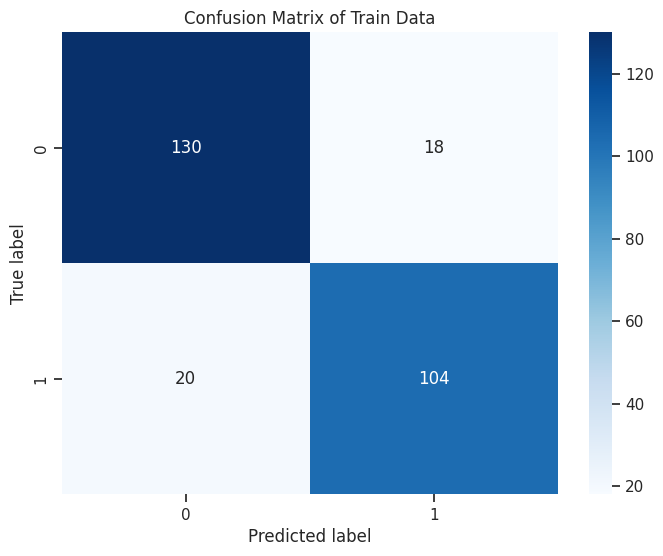

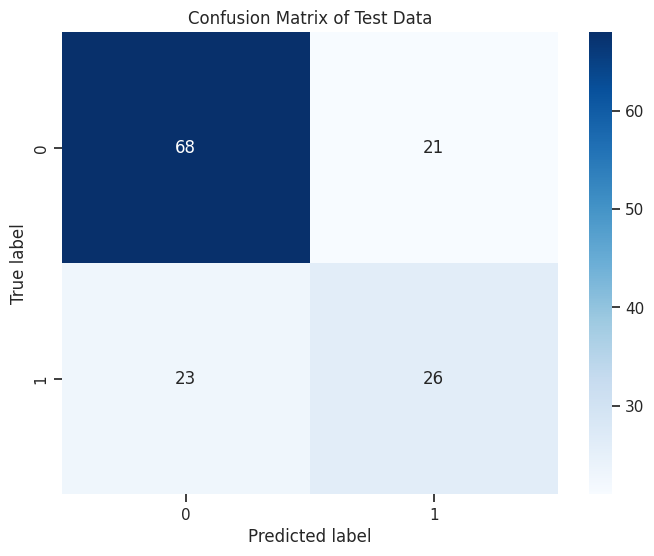

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(imputed_df_train['MS'], y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(imputed_df_test['MS'], y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



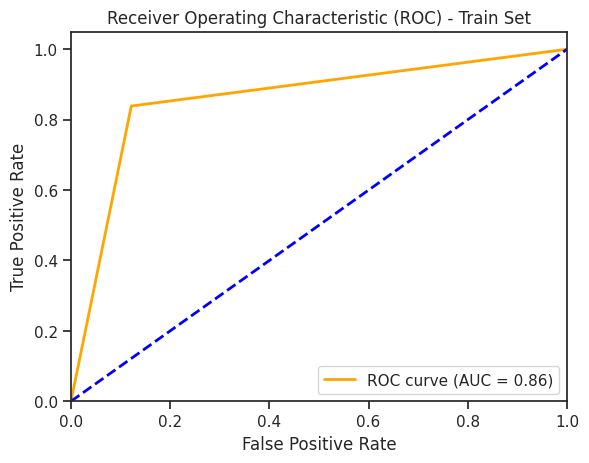

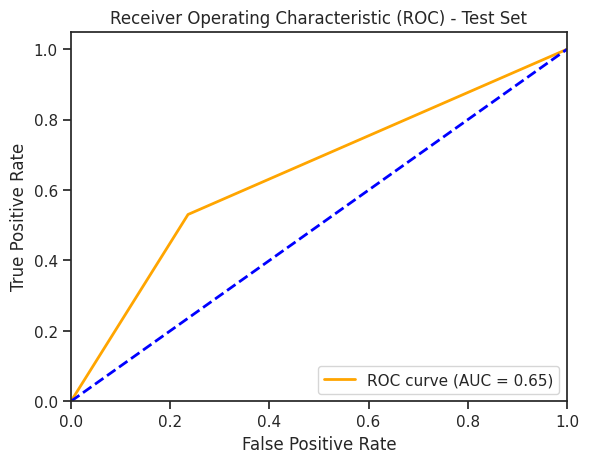

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in imputed_df_train['MS']]
y_test_mapped = [mapping[val] for val in imputed_df_test['MS']]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculating Feature Importances

Sex: 0.09732
Age: 0.58223
BAEP +: 0.03304
MRI spinal lesions: 0.04251
OCB + in CSF: 0.24490


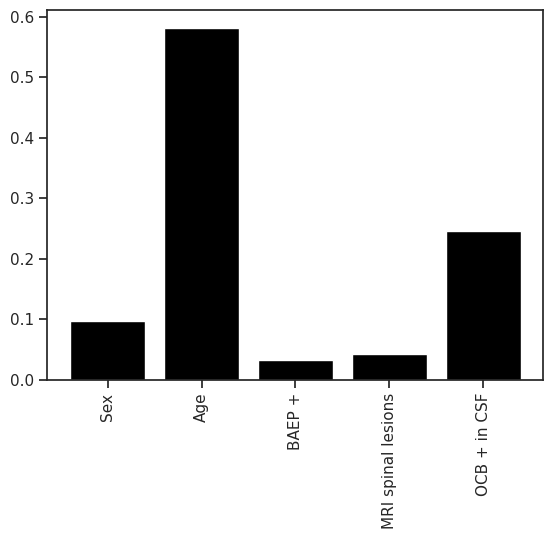

In [ ]:
importance = best_model.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (selected_features[i], v))

# Plot feature importances
plt.bar(selected_features, importance)
plt.xticks(rotation=90)
plt.show()




#8. Using Concatenated Dataset (Mexican+Lithuanian Combined)

##Data Loading

In [ ]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify file path and load it into a DataFrame
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Concatenated Dataset.xlsx')
df=pd.DataFrame(data)

##Data Pre-processing

Ensuring Reproducibility

In [ ]:
# Import libraries
import random
import numpy as np

#Set seed value
random.seed(42)
np.random.seed(42)

Visualising the dataset and its dimensions

In [ ]:
# Visualise the dataset
df.head(140)

Nr  Sex  Age OCB + in CSF  VEP +  BAEP +  Periventricular  \
0      1    1   34            0    0.0     0.0              0.0   
1      2    1   61            1    1.0     0.0              0.0   
2      3    1   22            1    0.0     0.0              0.0   
3      4    0   41            1    1.0     0.0              1.0   
4      5    0   34            0    0.0     0.0              1.0   
..   ...  ...  ...          ...    ...     ...              ...   
135  136    0   37            0    0.0     0.0              1.0   
136  137    0   52            0    0.0     0.0              0.0   
137  138    0   48            0    1.0     1.0              1.0   
138  139    0   25            1    1.0     0.0              1.0   
139  140    1   40            0    0.0     0.0              1.0   

     MRI spinal lesions  MRI infratentorial lesions  MS  
0                   1.0                         0.0   1  
1                   1.0                         0.0   1  
2                   0.0                         0.0   1  
3                   0.0                         0.0   1  
4                   0.0                         0.0   1  
..                  ...                         ...  ..  
135                 0.0                         0.0   0  
136                 1.0                         0.0   0  
137                 0.0                         0.0   0  
138                 1.0                         0.0   0  
139                 0.0                         0.0   0  

[140 rows x 10 columns]

In [ ]:
# Number of observations and features in the dataset
print(df.shape)

(410, 10)


Dropping columns not needed for the analysis

In [ ]:
# Remove unnecessary columns
df = df.drop(['Nr', 'Periventricular', 'VEP +', 'MRI infratentorial lesions'], axis=1)

Converting the data type for use by the model

In [ ]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types of columns
print(df.dtypes)

Sex                     int64
Age                     int64
OCB + in CSF          float64
BAEP +                float64
MRI spinal lesions    float64
MS                      int64
dtype: object


Impute missing data

In [ ]:
#Install library for imputation
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library for Multiple Imputation by Chained Equations (MICE)
from impyute.imputation.cs import mice

# impute missing values using MICE
imputed_data = mice(df.values)

# convert imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

Specify features and target variable

In [ ]:
#Specify x and y
x = imputed_df[['Age', 'MRI spinal lesions', 'OCB + in CSF', 'BAEP +', 'Sex']]
y = imputed_df['MS']

#Print dimensions
print(x.shape)
print(y.shape)

(410, 5)
(410,)


Visualising Relationship between Target Variable and Each Feature in X

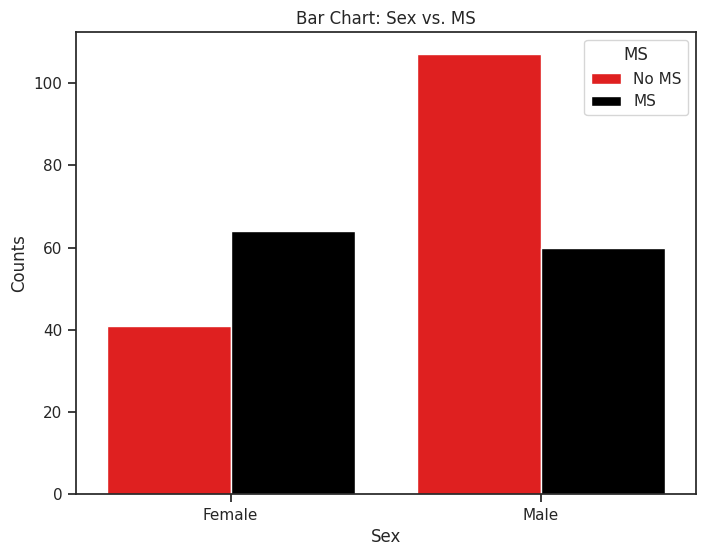

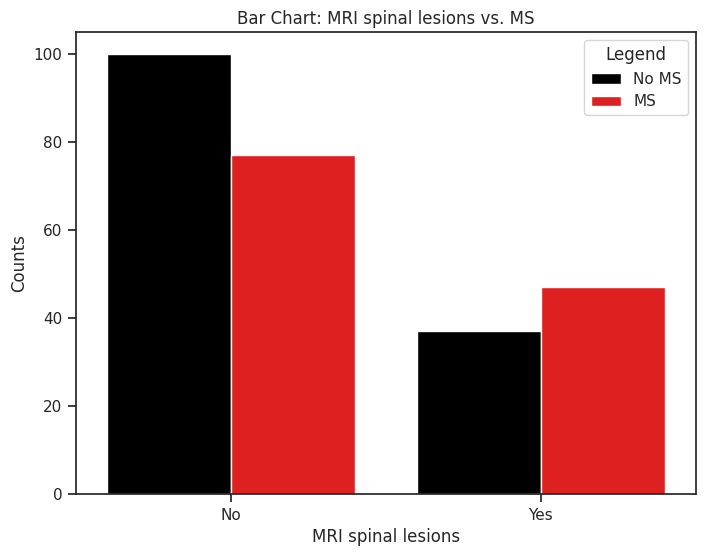

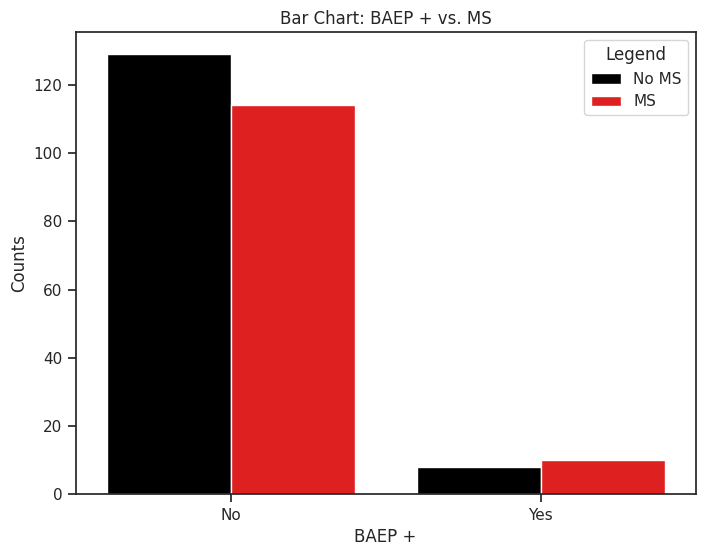

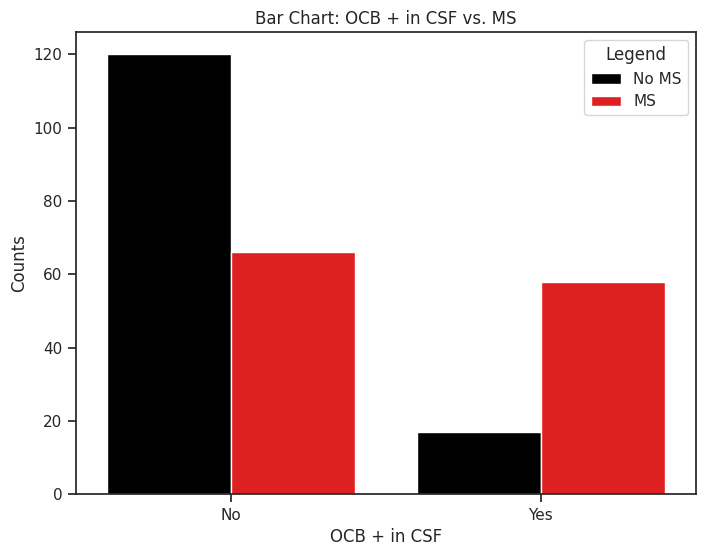

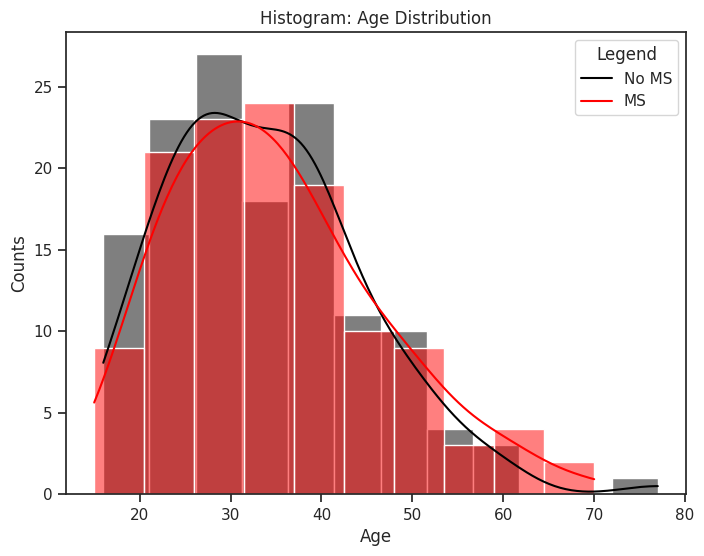

In [ ]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = imputed_df_train.copy()
filtered_df = filtered_df.dropna()

# Convert Sex values to strings
filtered_df['Sex'] = filtered_df['Sex'].replace({0.0: 'Female', 1.0: 'Male'})

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='MS', data=filtered_df, palette={"black", "red"})

plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Chart: Sex vs. MS")
plt.legend(title="MS", labels=["No MS", "MS"])

# Set x-axis tick labels
plt.xticks([0, 1], ["Female", "Male"])

plt.show()

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette(["black", "red"])

# Define a function to convert values to 0.0 or 1.0
def convert_to_binary(value):
    if value == 0.0:
        return 0.0
    elif value == 1.0:
        return 1.0
    else:
        return None

# Filter the data and convert the variables to binary values
filtered_df = imputed_df_train.copy()
filtered_df['MRI spinal lesions'] = filtered_df['MRI spinal lesions'].apply(convert_to_binary)
filtered_df['OCB + in CSF'] = filtered_df['OCB + in CSF'].apply(convert_to_binary)
filtered_df['BAEP +'] = filtered_df['BAEP +'].apply(convert_to_binary)

# Remove rows with null values
filtered_df = filtered_df.dropna()

# Plot Bar chart for each variable
variables = ['MRI spinal lesions', 'BAEP +', 'OCB + in CSF']

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=variable, hue='MS', data=filtered_df)
    ax.set_ylabel("Counts")
    ax.set_xlabel(variable)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    plt.title(f"Bar Chart: {variable} vs. MS")
    plt.legend(title="Legend", labels=["No MS", "MS"])
    plt.show()

# Create separate histograms for 'No MS' and 'MS' labels
plt.figure(figsize=(8, 6))
sns.histplot(filtered_df[filtered_df['MS'] == 0]['Age'], color='black', label='No MS', kde=True)
sns.histplot(filtered_df[filtered_df['MS'] == 1]['Age'], color='red', label='MS', kde=True)

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Histogram: Age Distribution")
plt.legend(title="Legend", labels=["No MS", "MS"])
plt.show()


Visualising correlation and multicollinearity as a correlation matrix, heatmap and Seaborn plots

In [ ]:
#Plotting a correlation matrix

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

#Calculate and print the correlation matrix
print("Correlation Matrix")
data.corr()


Correlation Matrix


Age  MRI spinal lesions  OCB + in CSF    BAEP +  \
Age                 1.000000            0.158445      0.000326  0.265891   
MRI spinal lesions  0.158445            1.000000      0.112406  0.049644   
OCB + in CSF        0.000326            0.112406      1.000000  0.224443   
BAEP +              0.265891            0.049644      0.224443  1.000000   
Sex                -0.052749            0.012133      0.088827  0.073356   
MS                 -0.010642            0.075934      0.443946  0.116165   

                         Sex        MS  
Age                -0.052749 -0.010642  
MRI spinal lesions  0.012133  0.075934  
OCB + in CSF        0.088827  0.443946  
BAEP +              0.073356  0.116165  
Sex                 1.000000  0.217936  
MS                  0.217936  1.000000

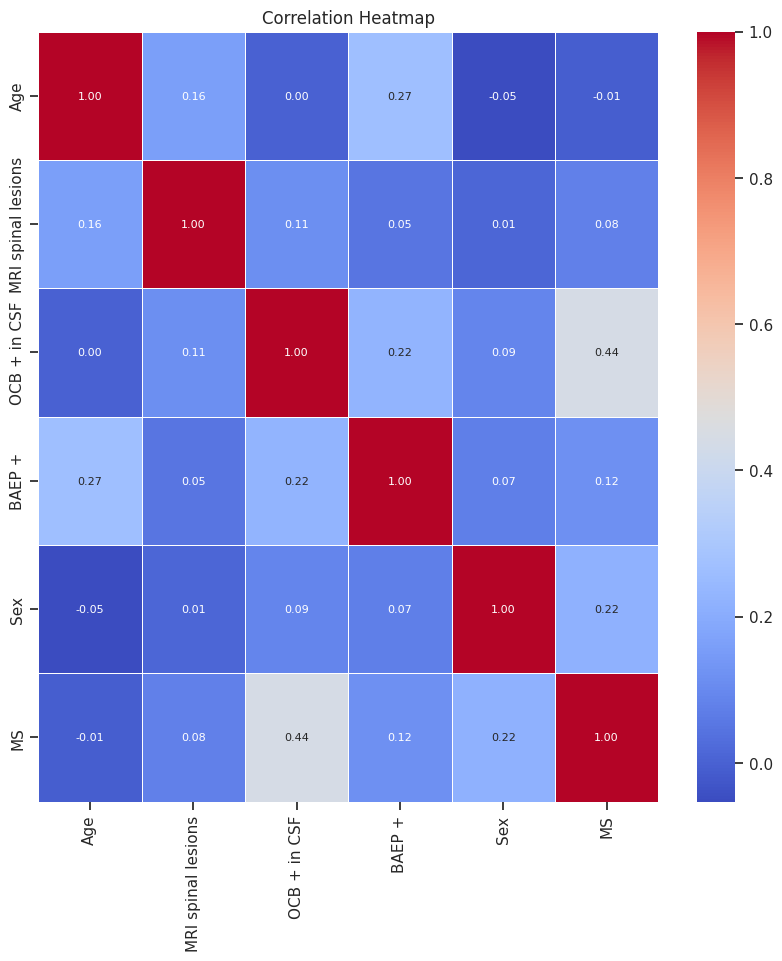

In [ ]:
#Visualise correlation and multicollinearity as a heatmap

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Computing the correlation matrix
corr_matrix = data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

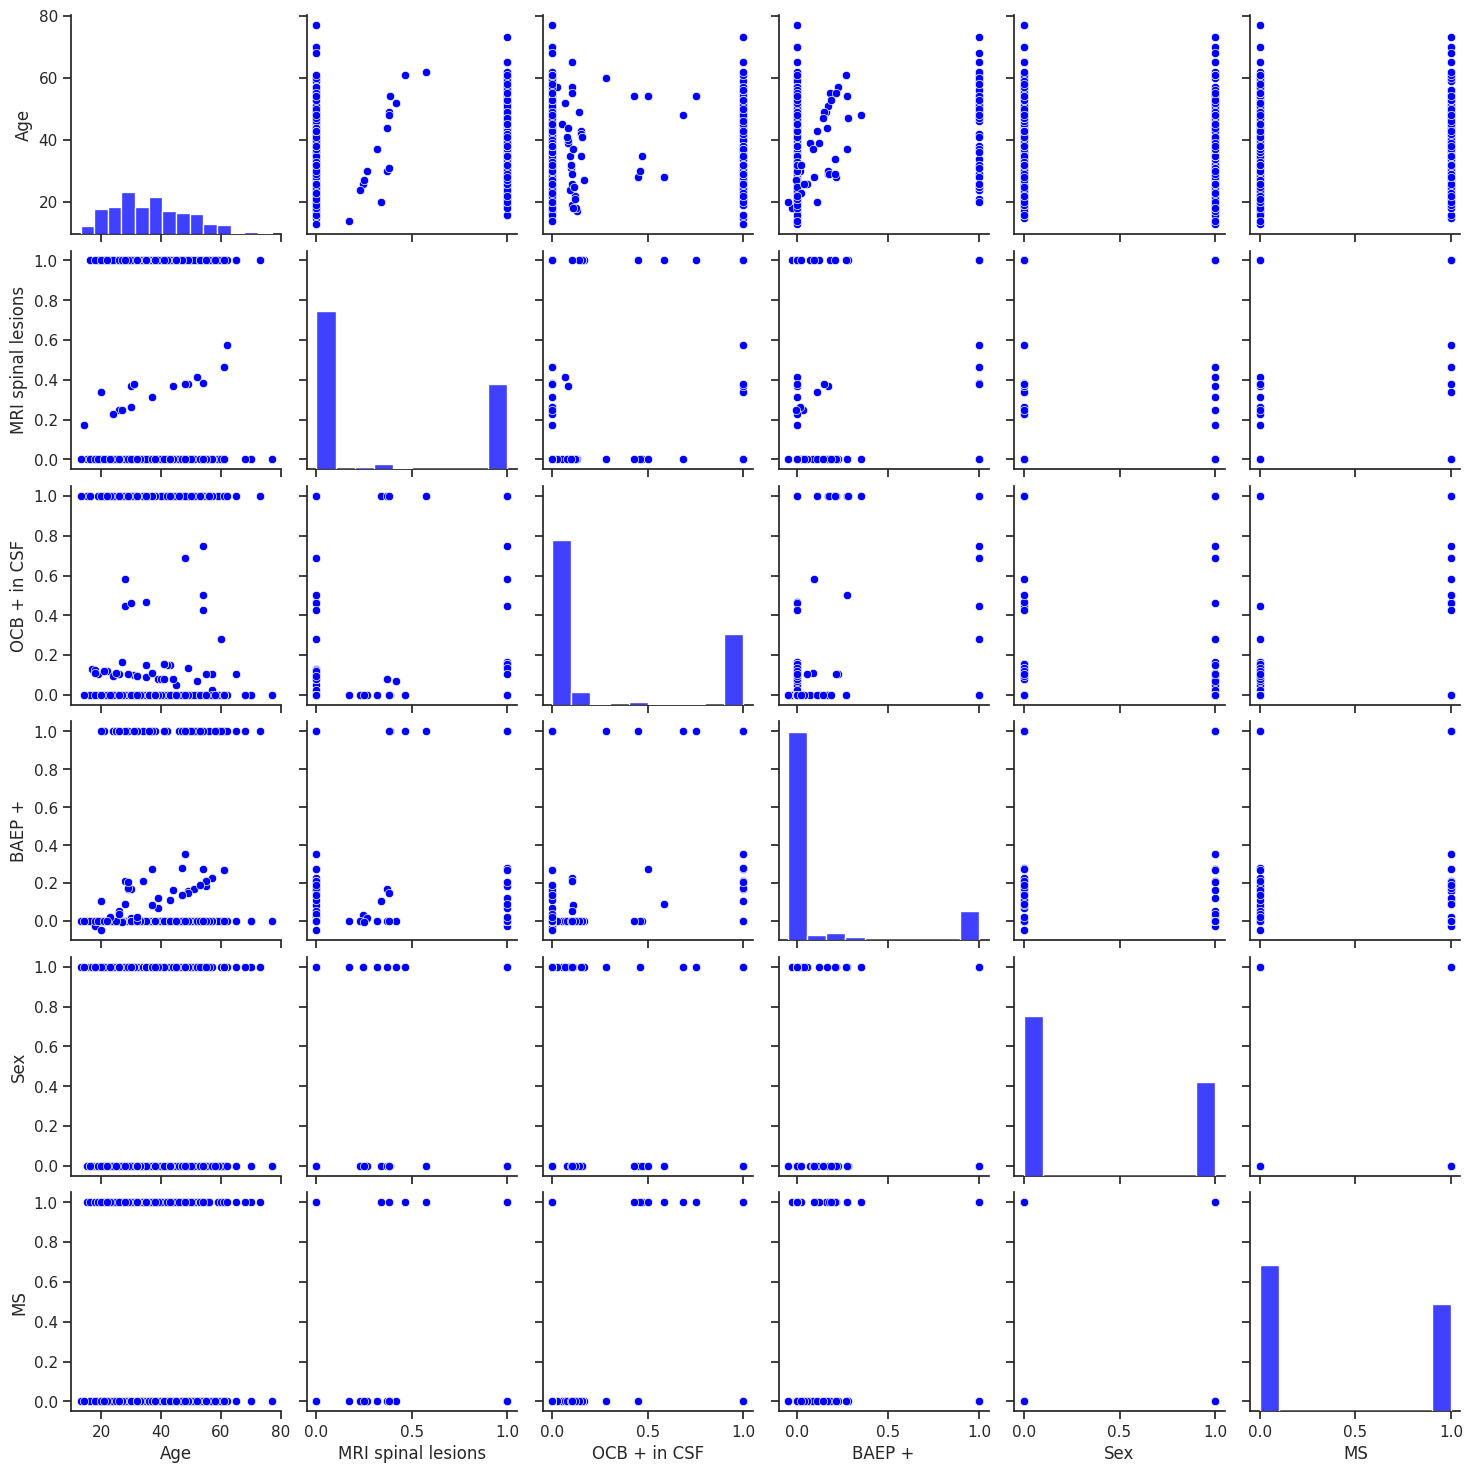

In [ ]:
# Import library
import seaborn as sns

# Concatenate x and y
data = pd.concat([x, y], axis=1)

# Set color
color = 'blue'

# Visualise plots
sns.pairplot(data, diag_kws={'color': color}, plot_kws={'color': color})


In [ ]:
# Print features with multicollinearity
highly_correlated_features = []
abs_corr_matrix = corr_matrix.abs()
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i+1, len(abs_corr_matrix.columns)):
        if abs_corr_matrix.iloc[i, j] > 0.7:
            feature_i = abs_corr_matrix.columns[i]
            feature_j = abs_corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j))

if len(highly_correlated_features) == 0:
    print("No Multicollinearity Observed")
else:
    print("Features with multicollinearity (absolute correlation coefficient > 0.7):")
    for feature_i, feature_j in highly_correlated_features:
        print(f"{feature_i} - {feature_j}")

No Multicollinearity Observed


Checking for imbalanced classes in the dataset

0.0    57.804878
1.0    42.195122
Name: MS, dtype: float64


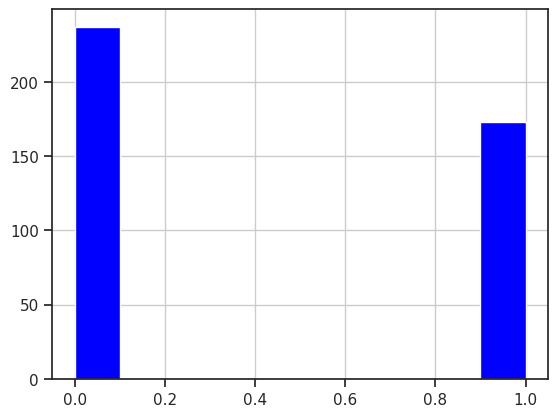

The baseline accuracy is: 0.5780487804878048


In [ ]:
# Check if dataset is imbalanced
print(y.value_counts() * 100.0 / len(y))

# Visualize dataset imbalance
import matplotlib.pyplot as plt
y.hist(color=['blue'])
plt.show()

# Find baseline accuracy
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(x, y)
baseline_accuracy = clf.score(x, y)
print("The baseline accuracy is:", baseline_accuracy)


##Data Splitting

Split data into train and test sets

In [ ]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification to resolve class imbalances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Print dimensions
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (328, 5)
x_test: (82, 5)
y_train: (328,)
y_test: (82,)


##Cross-validation

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Create an instance of Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Perform stratified k-fold cross-validation for Random Forest Classifier
rf_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


Calculating average and standard deviation of classification metrics for each fold in K-Fold CV

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Creating lists to store evaluation metrics for each fold
train_f1_scores = []
test_f1_scores = []

# Creating an instance of StratifiedKFold
rf_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Iterating over each fold
for train_index, test_index in rf_skfold.split(imputed_df_train, imputed_df_train['MS']):
    x_train_fold, x_test_fold = imputed_df_train.iloc[train_index], imputed_df_train.iloc[test_index]
    y_train_fold, y_test_fold = imputed_df_train['MS'].iloc[train_index], imputed_df_train['MS'].iloc[test_index]

    # Fitting the model and making predictions for train set
    rf.fit(x_train_fold, y_train_fold)
    y_train_pred = rf.predict(x_train_fold)

    # Calculating F1 score for the train set
    train_f1 = f1_score(y_train_fold, y_train_pred)

    # Appending train F1 score to the list
    train_f1_scores.append(train_f1)

    # Making predictions for test set
    y_test_pred = rf.predict(x_test_fold)

    # Calculating F1 score for the test set
    test_f1 = f1_score(y_test_fold, y_test_pred)

    # Appending test F1 score to the list
    test_f1_scores.append(test_f1)

# Calculating the average and standard deviation of F1 scores for train and test sets
avg_train_f1 = np.mean(train_f1_scores)
std_train_f1 = np.std(train_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
std_test_f1 = np.std(test_f1_scores)

# Print the average and standard deviation for train and test F1 scores
print("Average Train F1 Score:", avg_train_f1)
print("Standard Deviation of Train F1 Score:", std_train_f1)
print("Average Test F1 Score:", avg_test_f1)
print("Standard Deviation of Test F1 Score:", std_test_f1)


Average Train F1 Score: 1.0
Standard Deviation of Train F1 Score: 0.0
Average Test F1 Score: 1.0
Standard Deviation of Test F1 Score: 0.0


##Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to tune for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42]
}

# Create an instance of Random Forest model
rf = RandomForestClassifier(random_state=1)

# Create an instance of GridSearchCV for Random Forest Classifier
rf_cv = GridSearchCV(rf, rf_param_grid, cv=rf_skfold)


##Model Validation

In [ ]:
# Train the model using GridSearchCV on the selected features
rf_cv.fit(imputed_df_train[selected_features], imputed_df_train['MS'])

# Print best parameters and accuracy score
print("Best Parameters:", rf_cv.best_params_)
print("Accuracy:", rf_cv.best_score_)



Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
Accuracy: 0.7026455026455027


##Model Training and Prediction:

In [ ]:
# Make predictions on imputed_df_train using the best model
best_model = rf_cv.best_estimator_
y_train_pred = best_model.predict(imputed_df_train[selected_features])

# Make predictions on imputed_df_test using the best model
y_test_pred = best_model.predict(imputed_df_test[selected_features])

In [ ]:
#Import libraries
from sklearn.metrics import classification_report

# Print Classification Report for train dataset (imputed_df_train)
print("Classification Report of Train Data:")
print(classification_report(imputed_df_train['MS'], y_train_pred))

print()

# Print Classification Report for test dataset (imputed_df_test)
print("Classification Report of Test Data:")
print(classification_report(imputed_df_test['MS'], y_test_pred))


Classification Report of Train Data:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       148
         1.0       0.85      0.84      0.85       124

    accuracy                           0.86       272
   macro avg       0.86      0.86      0.86       272
weighted avg       0.86      0.86      0.86       272


Classification Report of Test Data:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76        89
         1.0       0.55      0.53      0.54        49

    accuracy                           0.68       138
   macro avg       0.65      0.65      0.65       138
weighted avg       0.68      0.68      0.68       138



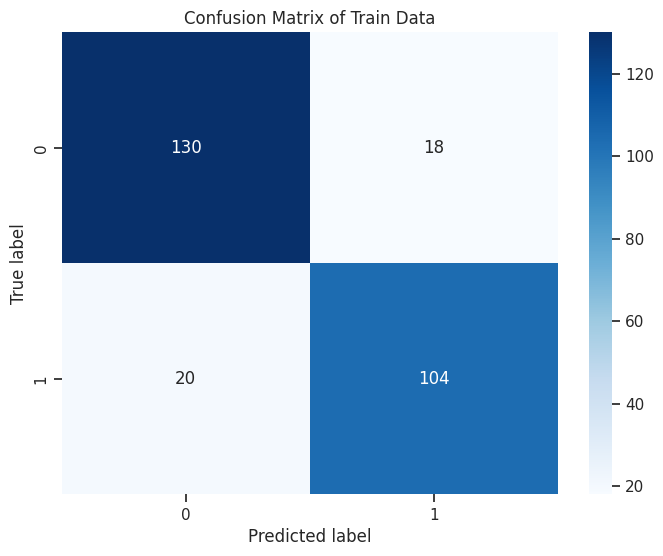

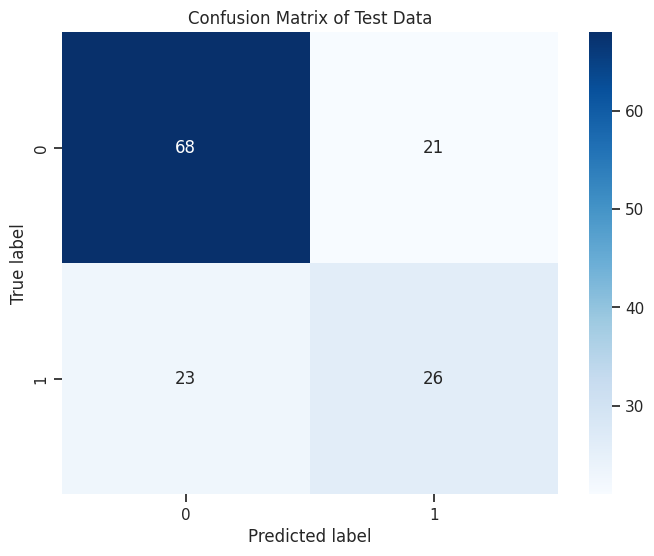

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for train dataset (imputed_df_train)
train_cm = confusion_matrix(imputed_df_train['MS'], y_train_pred)

# Confusion Matrix for test dataset (imputed_df_test)
test_cm = confusion_matrix(imputed_df_test['MS'], y_test_pred)

# Plot Confusion Matrix for train dataset
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Train Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot Confusion Matrix for test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Test Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



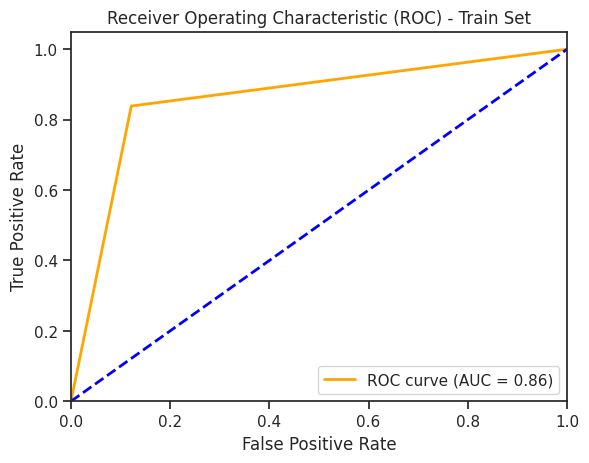

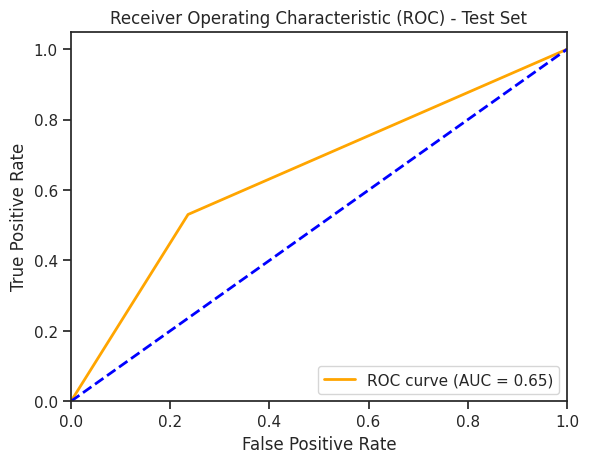

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map actual "YES" and "NO" values to 1 and 0 respectively
mapping = {1.0: 1, 0.0: 0}
y_train_mapped = [mapping[val] for val in imputed_df_train['MS']]
y_test_mapped = [mapping[val] for val in imputed_df_test['MS']]

# Map predicted "YES" and "NO" values to 1 and 0 respectively
y_train_pred_mapped = [mapping[val] for val in y_train_pred]
y_test_pred_mapped = [mapping[val] for val in y_test_pred]

# ROC curve and AUC for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_mapped, y_train_pred_mapped)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_mapped, y_test_pred_mapped)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for train data
plt.figure()
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train Set')
plt.legend(loc="lower right")

# Plot ROC curve for test data
plt.figure()
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")

plt.show()


##Calculating Feature Importances

Age: 0.09732
MRI spinal lesions: 0.58223
OCB + in CSF: 0.03304
BAEP +: 0.04251
Sex: 0.24490


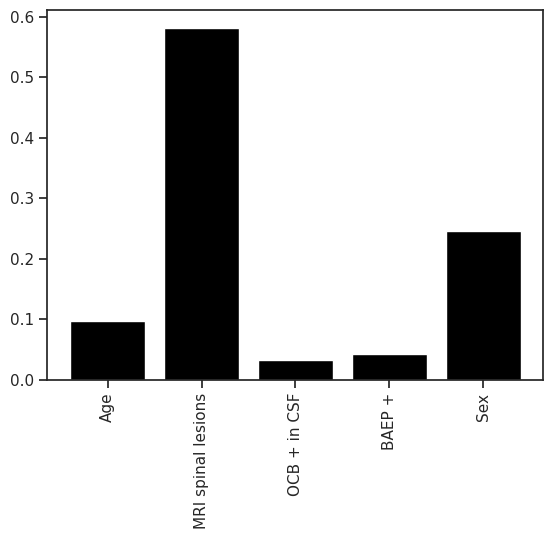

In [ ]:
importance = best_model.feature_importances_

#Summarise feature importance
for i, v in enumerate(importance):
    print('%s: %.5f' % (x_train.columns[i], v))

# Get feature names
feature_names = list(x_train.columns)

# Plot feature importances
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.show()


